## EXERCISES_RLAB01
### REZA RAJAEE (2040483)

In [65]:
library(tibble)
library(dplyr)
library(ggplot2)
library("ggrepel") 
library(scales)
options(repr.plot.width=25,repr.plot.height=12)

## Exercise 1 - vectors and data frames
### • The following table gives the volume, area, length and maximum and mean depths of some Scottish lakes. Create vectors, holding the lake’s name and all the parameters and build a dataframe called scottish.lakes from the vectors

In [2]:
lakestable <- read.csv("table-1.csv")
lakestable

Loch         Volume.km.. Volume.mi.. Area.km2. Area.mi2. Length.km.
1  Loch Ness    7.45        1.790       56.0      22.0      36.2      
2  Loch Lomond  2.60        0.620       71.0      27.0      36.0      
3  Loch Morar   2.30        0.550       26.7      10.3      18.8      
4  Loch Tay     1.60        0.380       26.4      10.2      23.0      
5  Loch Awe     1.20        0.290       39.0      15.0      41.0      
6  Loch Maree   1.09        0.260       28.6      11.0      20.0      
7  Loch Ericht  1.08        0.260       18.6       7.2      23.0      
8  Loch Lochy   1.07        0.260       16.0       6.2      16.0      
9  Loch Rannoch 0.97        0.230       19.0       7.3      15.7      
10 Loch Shiel   0.79        0.190       19.5       7.5      28.0      
11 Loch Katrine 0.77        0.180       12.4       4.8      12.9      
12 Loch Arkaig  0.75        0.180       16.0       6.2      19.3      
13 Loch Shin    0.35        0.084       22.5       8.7      27.8      
   Length.mi. Max..depth.m. Max..depth.ft. Mean.depth.m. Mean.depth.ft..6.
1  22.5       227           745            132.0         433[4]           
2  22.0       190           620             37.0         121[7]           
3  11.7       310           1,020           87.0         285[8]           
4  14.0       150           490             60.6         199[9]           
5  25.0        94           308             32.0         105[10]          
6  12.0       114           374             38.0         125[5]           
7  14.0       156           512             57.6         189[9]           
8   9.9       162           531             70.0         230[11]          
9   9.8       134           440             51.0         167[12]          
10 17.0       128           420             40.0         130[13]          
11  8.0       151           495             43.4         142[14]          
12 12.0       109           358             46.5         153[15]          
13 17.3        49           161             15.5         51[16]

In [3]:
scottish.lakes <- data.frame(
    Name <- lakestable[1],
    Volume <- lakestable[2],
    Area <- lakestable[4],
    Length <- lakestable[6],
    Maxdepth <- lakestable[8],
    Meandepth <- lakestable[10])
scottish.lakes

Loch         Volume.km.. Area.km2. Length.km. Max..depth.m. Mean.depth.m.
1  Loch Ness    7.45        56.0      36.2       227           132.0        
2  Loch Lomond  2.60        71.0      36.0       190            37.0        
3  Loch Morar   2.30        26.7      18.8       310            87.0        
4  Loch Tay     1.60        26.4      23.0       150            60.6        
5  Loch Awe     1.20        39.0      41.0        94            32.0        
6  Loch Maree   1.09        28.6      20.0       114            38.0        
7  Loch Ericht  1.08        18.6      23.0       156            57.6        
8  Loch Lochy   1.07        16.0      16.0       162            70.0        
9  Loch Rannoch 0.97        19.0      15.7       134            51.0        
10 Loch Shiel   0.79        19.5      28.0       128            40.0        
11 Loch Katrine 0.77        12.4      12.9       151            43.4        
12 Loch Arkaig  0.75        16.0      19.3       109            46.5        
13 Loch Shin    0.35        22.5      27.8        49            15.5

### 1 evaluate the highest and lowest volume and area lake

In [41]:
as.character(scottish.lakes[which(scottish.lakes$Volume.km.. == max_v),1])

[1] "Loch Ness"

In [5]:
#finding max, min
max_v <- max(scottish.lakes$Volume.km..)
min_v <- min(scottish.lakes$Volume.km..)
max_a <- max(scottish.lakes$Area.km2.)
min_a <- min(scottish.lakes$Area.km2.)

#finding the loch name
max_v_n <- as.character(scottish.lakes[scottish.lakes$Volume.km.. == max_v,]$Loch)
min_v_n <- as.character(scottish.lakes[scottish.lakes$Volume.km.. == min_v,]$Loch)
max_a_n <- as.character(scottish.lakes[scottish.lakes$Area.km2. == max_a,]$Loch)
min_a_n <- as.character(scottish.lakes[scottish.lakes$Area.km2. == min_a,]$Loch)

cat("The highest volume is: ", max_v," km^3 belong to:",max_v_n,".\n\n")
cat('The lowest volume is: ',min_v,' km^3 belong to:',min_v_n,'.\n\n')
cat('The highest area is: ',max_a,' km^2 belong to:',max_a_n,'.\n\n')
cat('The lowest area is: ',min_a,' km^2 belong to:',min_a_n,'.')       


The highest volume is:  7.45  km^3 belong to: Loch Ness .

The lowest volume is:  0.35  km^3 belong to: Loch Shin .

The highest area is:  71  km^2 belong to: Loch Lomond .

The lowest area is:  12.4  km^2 belong to: Loch Katrine .

### 2 order the frame with respect to the area and determine the two largest area lakes

In [40]:
scottish.lakes[order(scottish.lakes$Area.km2.,decreasing = TRUE),][1:2,]

Loch        Volume.km.. Area.km2. Length.km. Max..depth.m. Mean.depth.m.
2 Loch Lomond 2.60        71        36.0       190            37          
1 Loch Ness   7.45        56        36.2       227           132

### 3 by summing up the areas occpupied by the lakes, determine the area of Scotland covered by water

In [49]:
df<-scottish.lakes[,2:5] 
colSums(df)[2]
cat("The area of Scotland covered by water: ", sum(scottish.lakes$Area.km2.),' km^2' )


The area of Scotland covered by water:  371.7  km^2

Area.km2. 
    371.7

## Exercise 2 - Crude Oil Production
### • The following CSV file
### https://drive.google.com/file/d/13WkinYhJNSr_XCldb3wpZOI0fgjer7Iw/view contains data on crude oil prices from 1861 to 2020, measured in US dollars per barrel.

### 1 Write R code that is able to read the file and import it in a data frame structure.

In [50]:
crude_oil_prices <- read.csv("crude-oil-prices.csv")
class(crude_oil_prices)
head(crude_oil_prices)

[1] "data.frame"

Entity Code     Year Oil...Crude.prices.since.1861..current...
1 World  OWID_WRL 1861 0.49                                     
2 World  OWID_WRL 1862 1.05                                     
3 World  OWID_WRL 1863 3.15                                     
4 World  OWID_WRL 1864 8.06                                     
5 World  OWID_WRL 1865 6.59                                     
6 World  OWID_WRL 1866 3.74

### 2 produce a plot with the Oil price as a function of the year

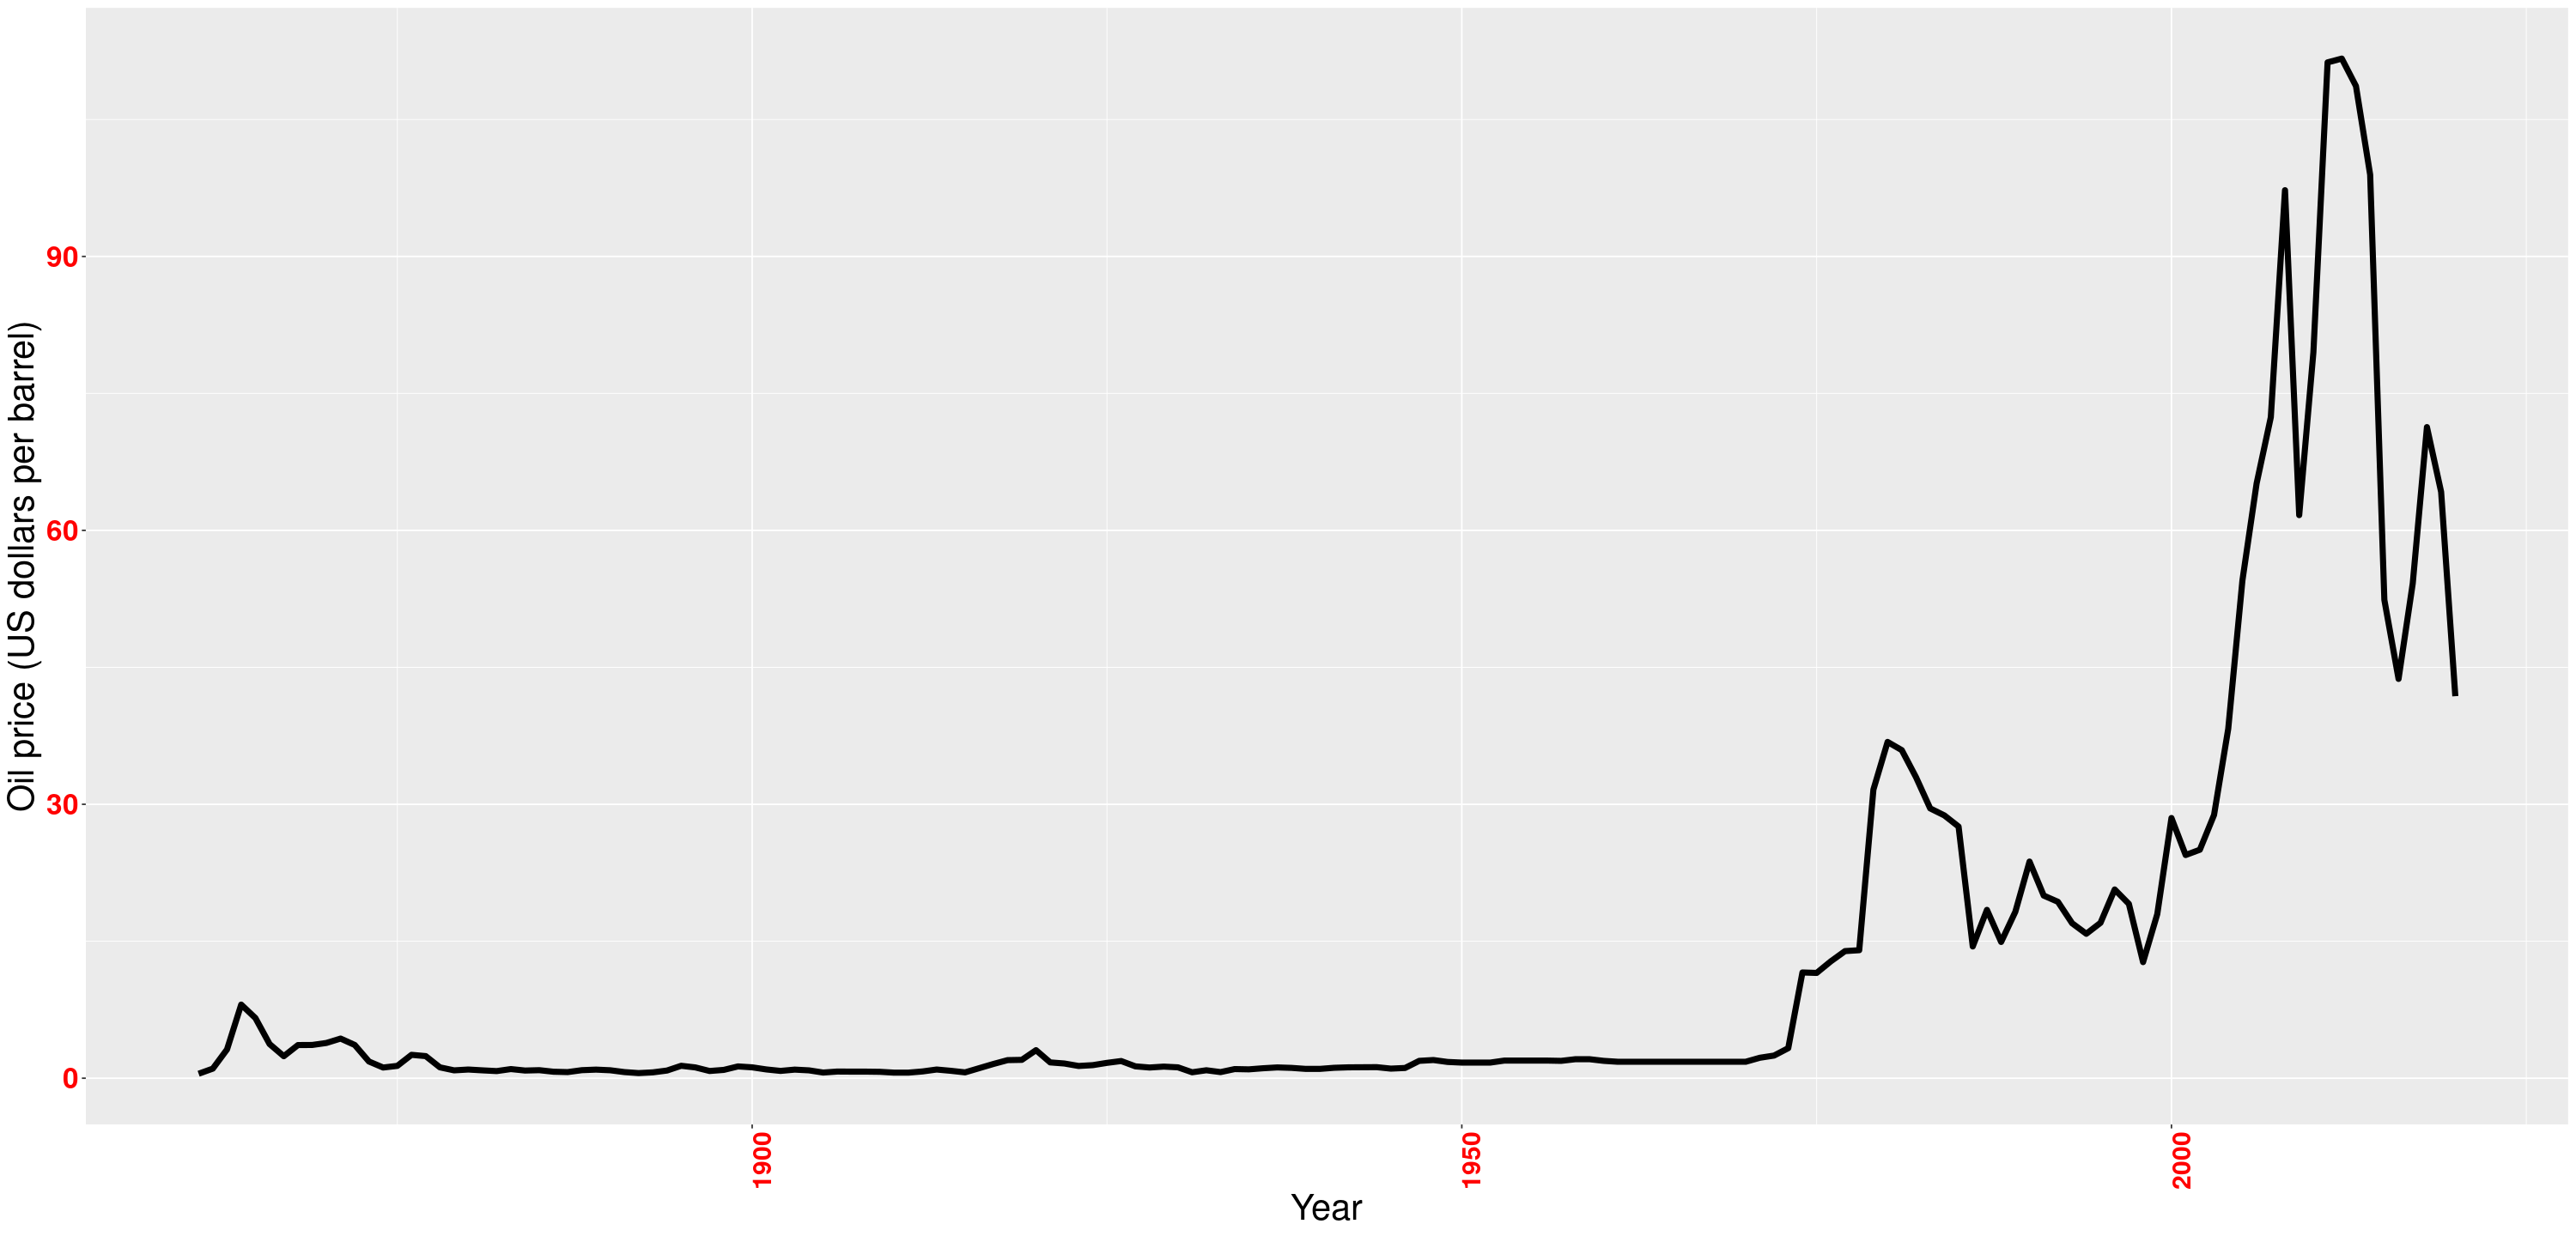

In [51]:
ggplot(crude_oil_prices, aes(x = Year, y = Oil...Crude.prices.since.1861..current...))+ geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 25),
      axis.text = element_text(face = "bold", color = "red",size = 20))+
labs(x = "Year",y = "Oil price (US dollars per barrel)")

### 3 which is the highest price in history ? When did it occur ?

In [19]:
max_price <- max(crude_oil_prices[4]) #finding max
year_max_price <- as.character(crude_oil_prices[crude_oil_prices[4] == max_price,]$Year) #finding year


cat("The highest price from 1861 to 2020 is: ",max_price, " US dollars per barrel, that happende in: ",
        year_max_price) 

The highest price from 1861 to 2020 is:  111.6697  US dollars per barrel, that happende in:  2012

### 4 plot the derivative of the curve

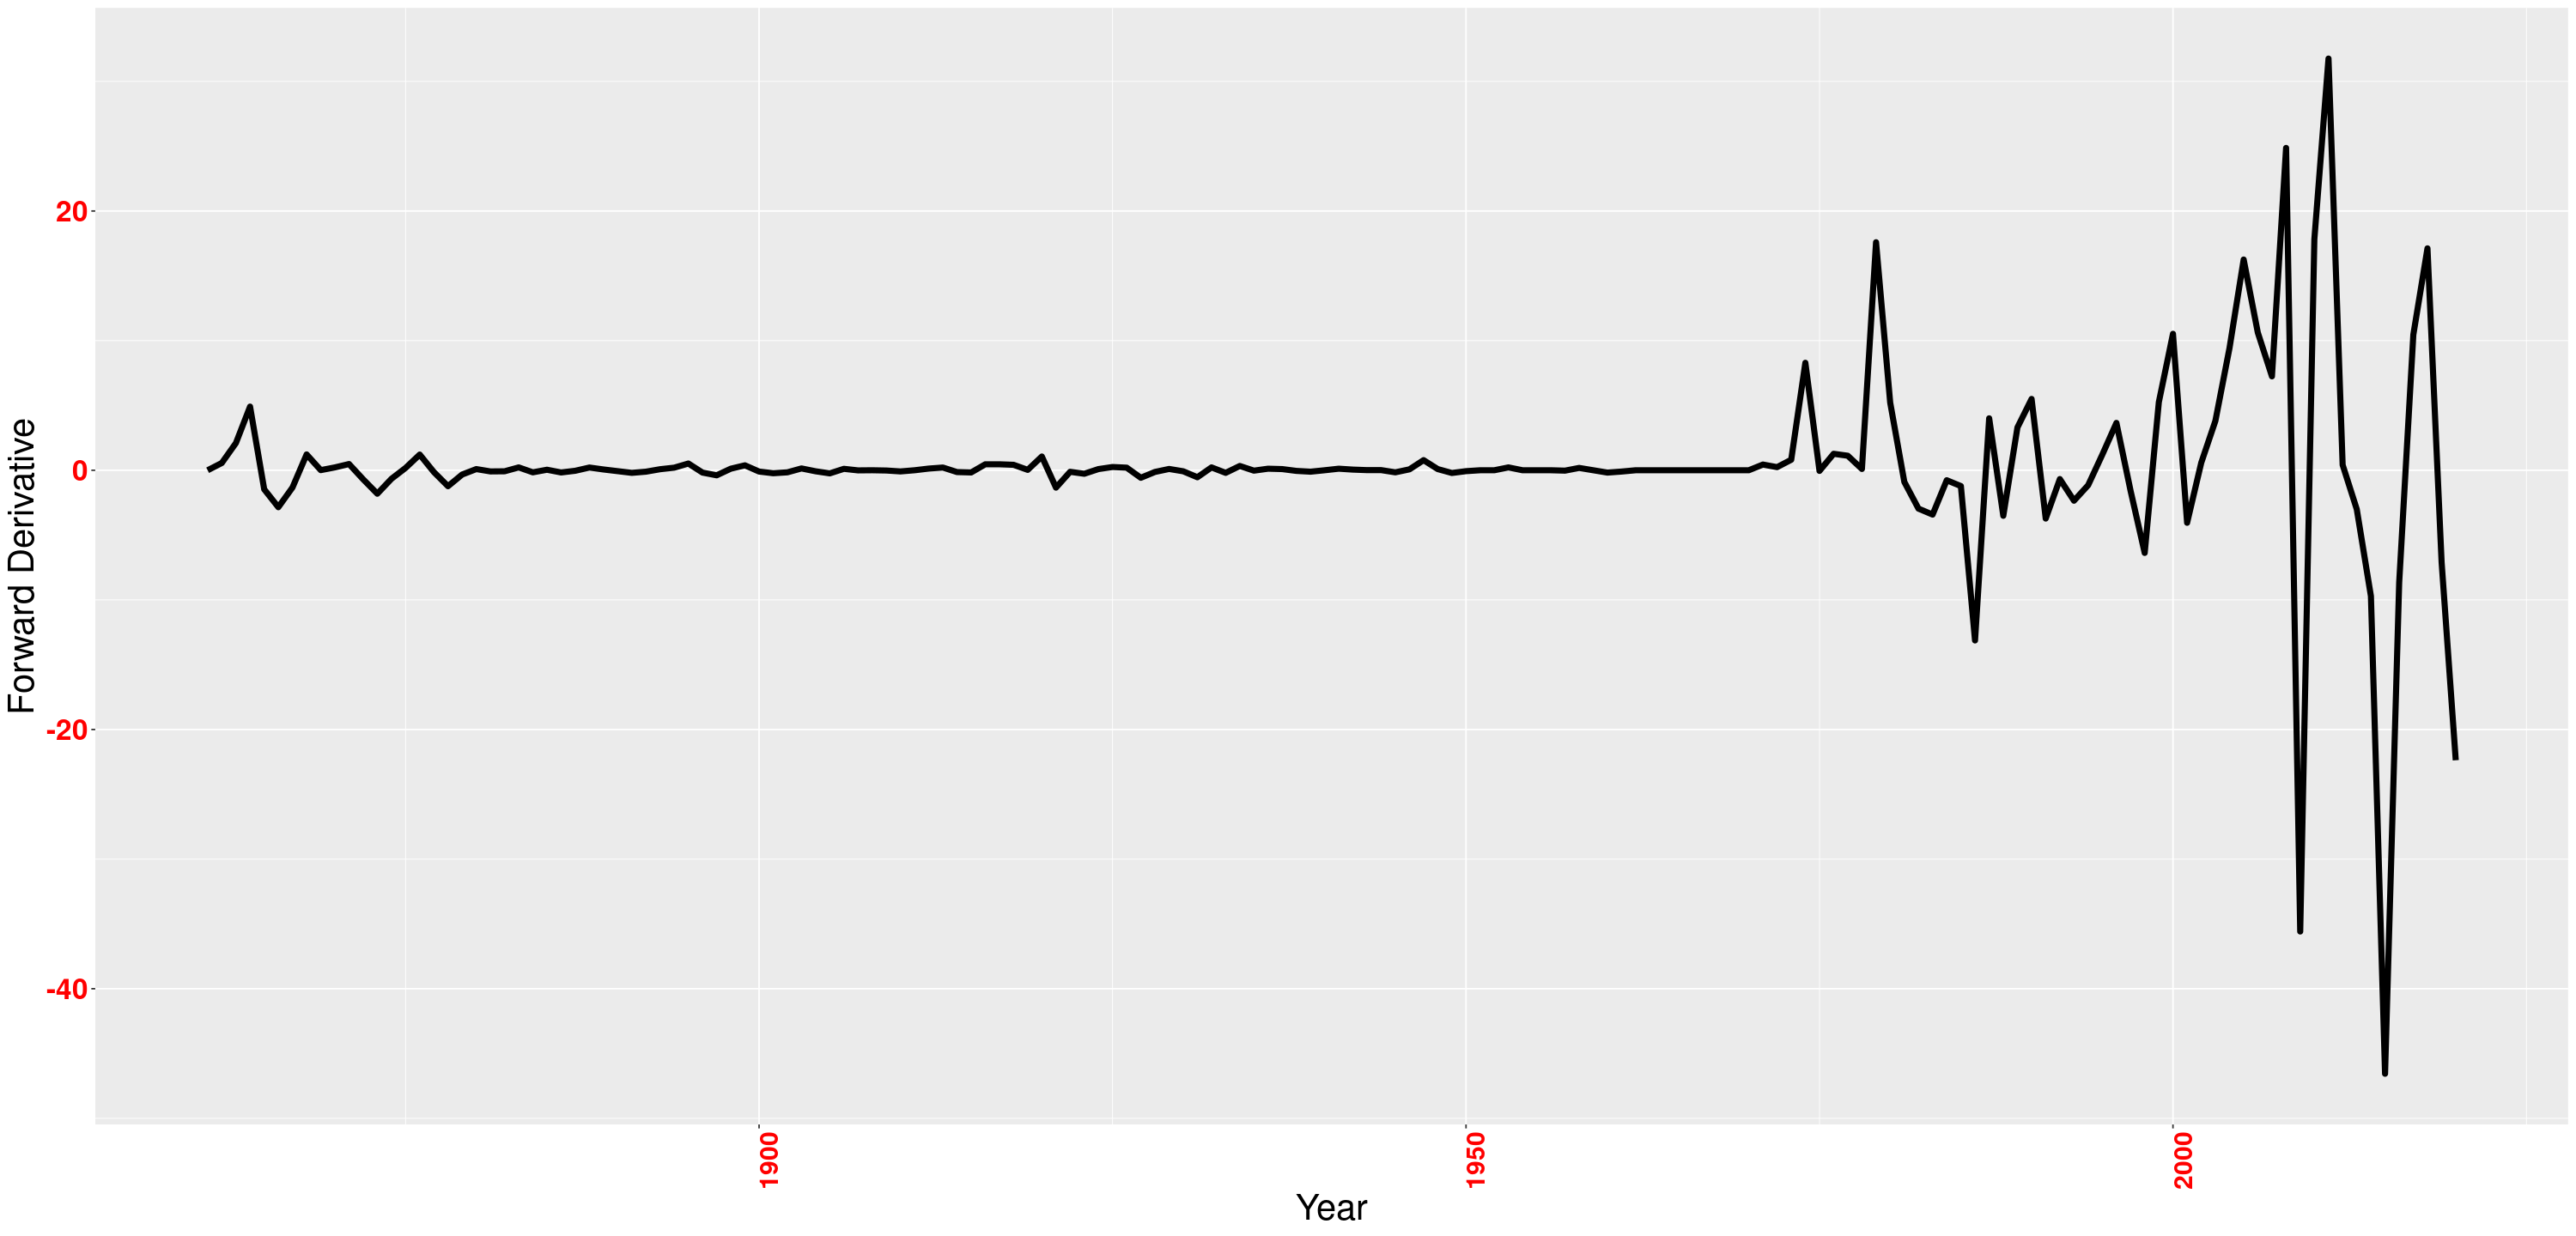

In [61]:
price <- crude_oil_prices$Oil...Crude.prices.since.1861..current...
counter <- nrow(crude_oil_prices) 

forward_derivative <- function(x) {
    delta_price <- vector()
    delta_price[1] <- 0 # cosider 0 for the first forward_derivative
    for(i in 2:counter){
        delta_price[i] <- price[i]-price[i-1]  # i start from 2 so we have (price[i]-price[i-1]) 
    }
  return(delta_price)
}
  

crude_oil_prices_n <- crude_oil_prices %>% # new dataframe for the forward_derivative
  mutate(
    forward_derivative = forward_derivative(price)
   )

ggplot(crude_oil_prices_n, aes(x = Year, y = forward_derivative))+ geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 25),
      axis.text = element_text(face = "bold", color = "red",size = 20))+
labs(x = "Year",y = "Forward Derivative")

## Exercise 3 - World Coal Production
### • The following CSV file
### https://drive.google.com/file/d/1U1hK5o_d3vl8twwGaRJNcDJ79O9I5zJ1/view?usp=sharing contains data on the coal production (in TW · hour) for several countries in the World.
#### 1 Write R code that is able to read the file and import it in a tibble structure

In [66]:
coal_production <- tibble(read.csv("coal-production-by-country.csv")) 
class(coal_production)  
head(coal_production)

[1] "tbl_df"     "tbl"        "data.frame"

Entity      Code Year Coal.production..TWh.
1 Afghanistan AFG  1900 0                    
2 Afghanistan AFG  1901 0                    
3 Afghanistan AFG  1902 0                    
4 Afghanistan AFG  1903 0                    
5 Afghanistan AFG  1904 0                    
6 Afghanistan AFG  1905 0

#### 2 count the number of countries available in the file and produce a barplot with the number of entries for each country

In [67]:
cat("The number of countries available in the file is:",nrow(coal_production %>% count(Entity, sort = TRUE)))

The number of countries available in the file is: 200

In [68]:
coal_production_n <- coal_production %>% filter(Coal.production..TWh.!= 0) #puting out the countries with 0 Production
cat("The number of countries with Production is:",
    nrow(coal_production_n %>% count(Entity, sort = TRUE))) #countries with Production

The number of countries with Production is: 104

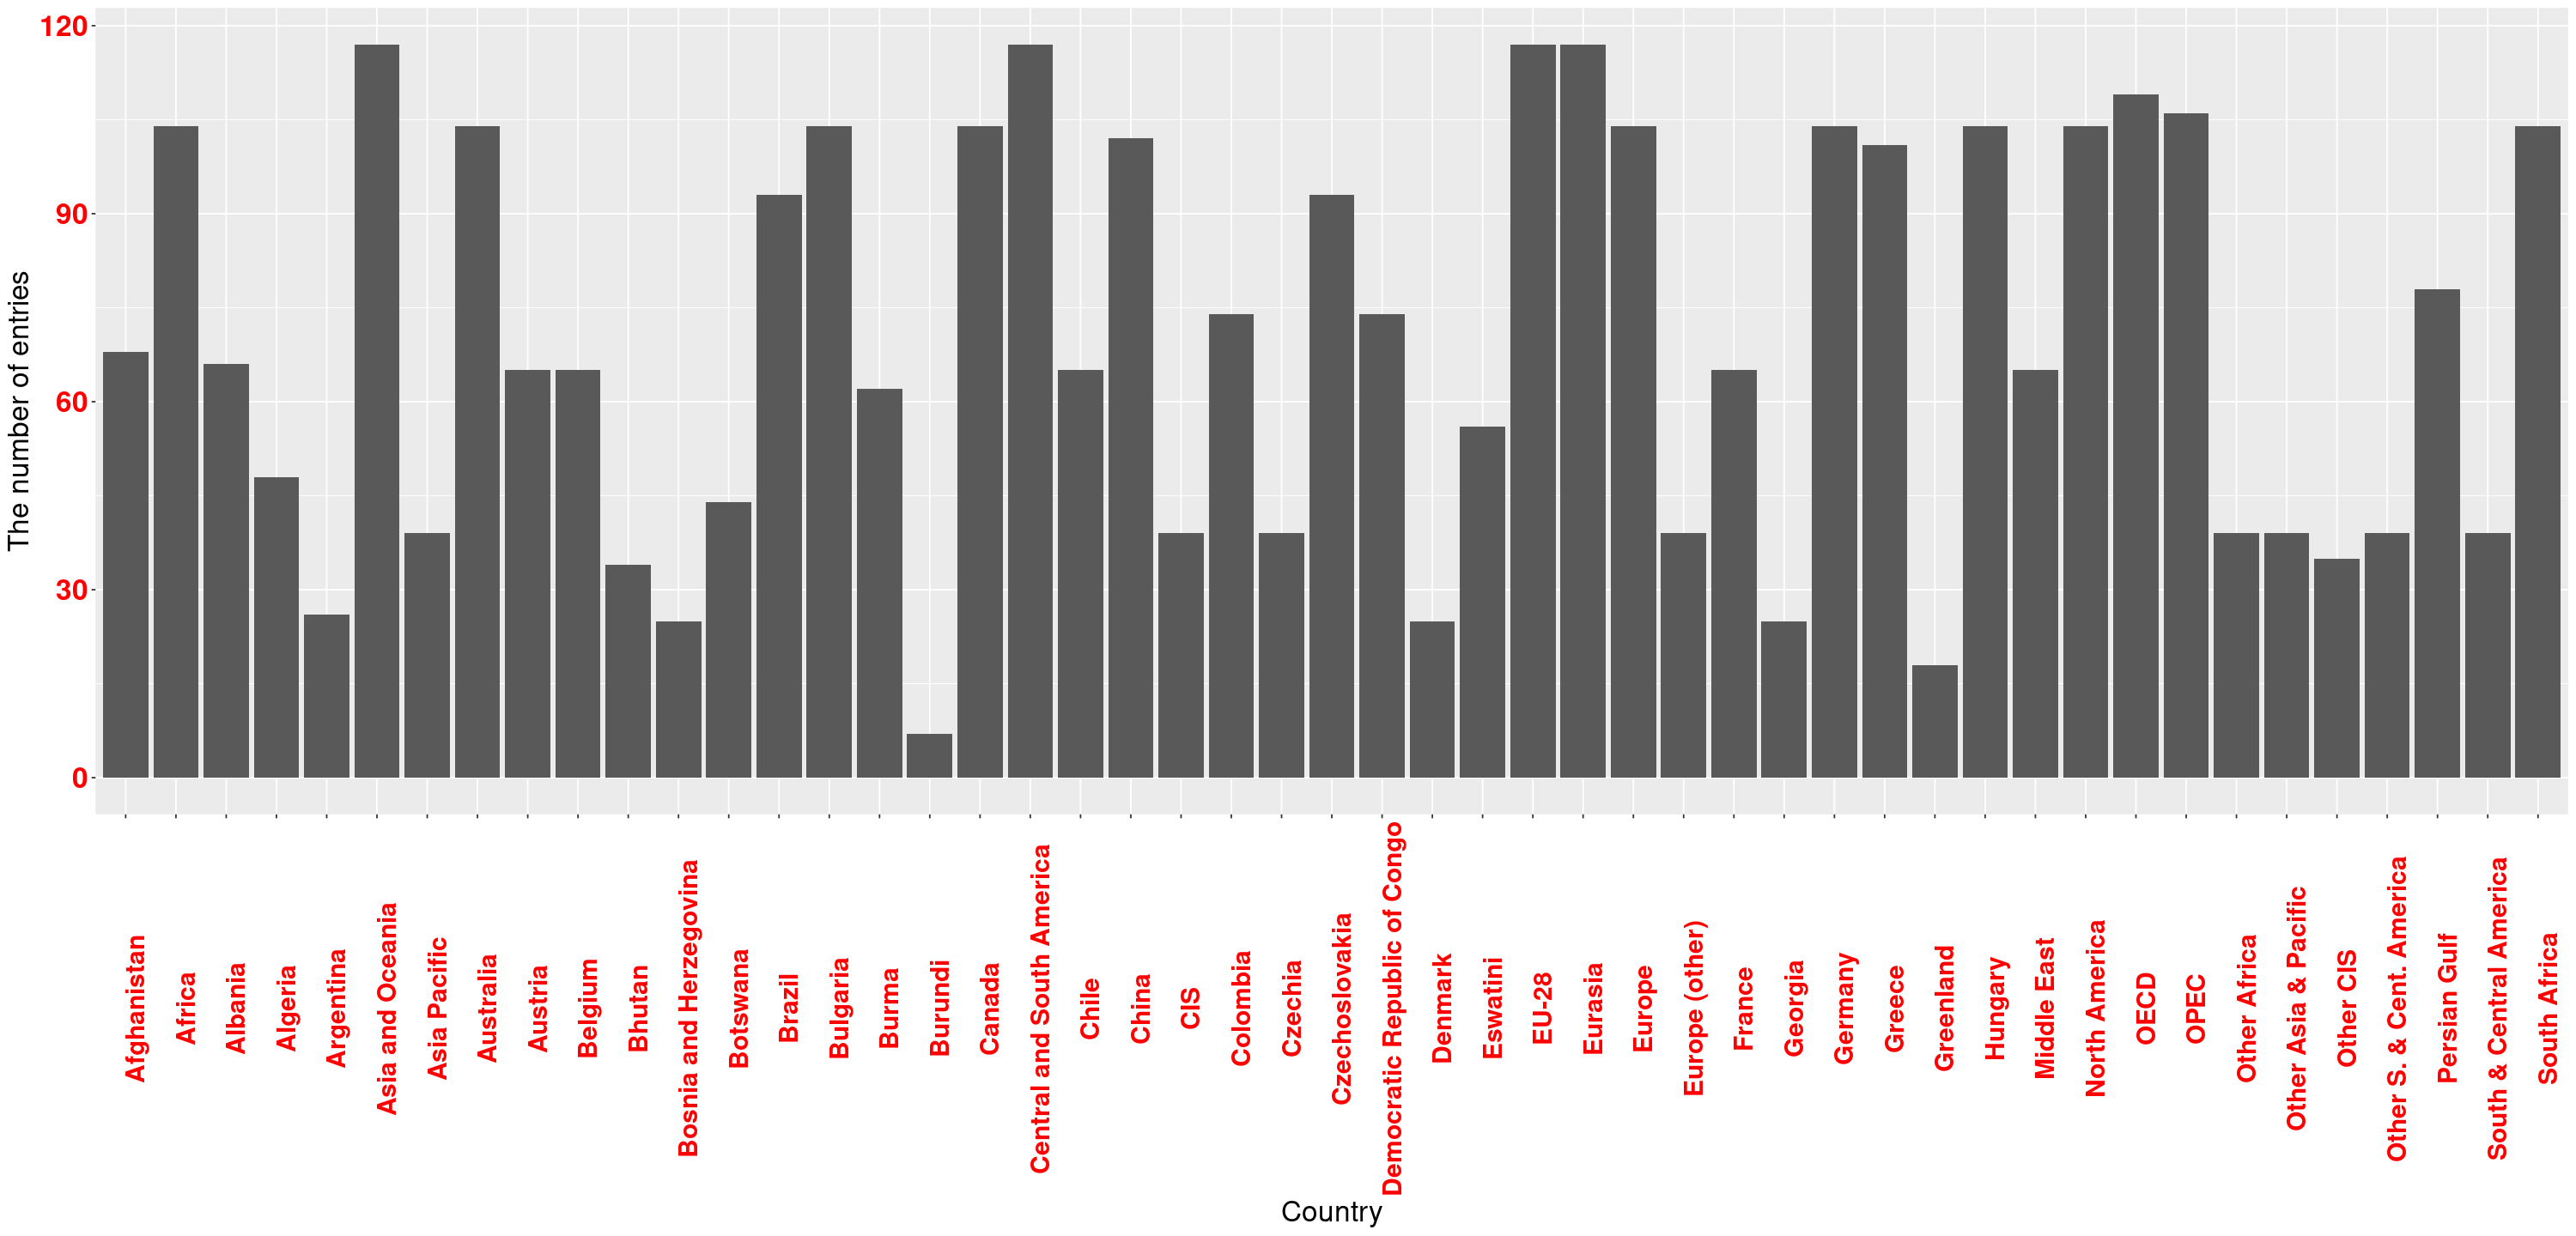

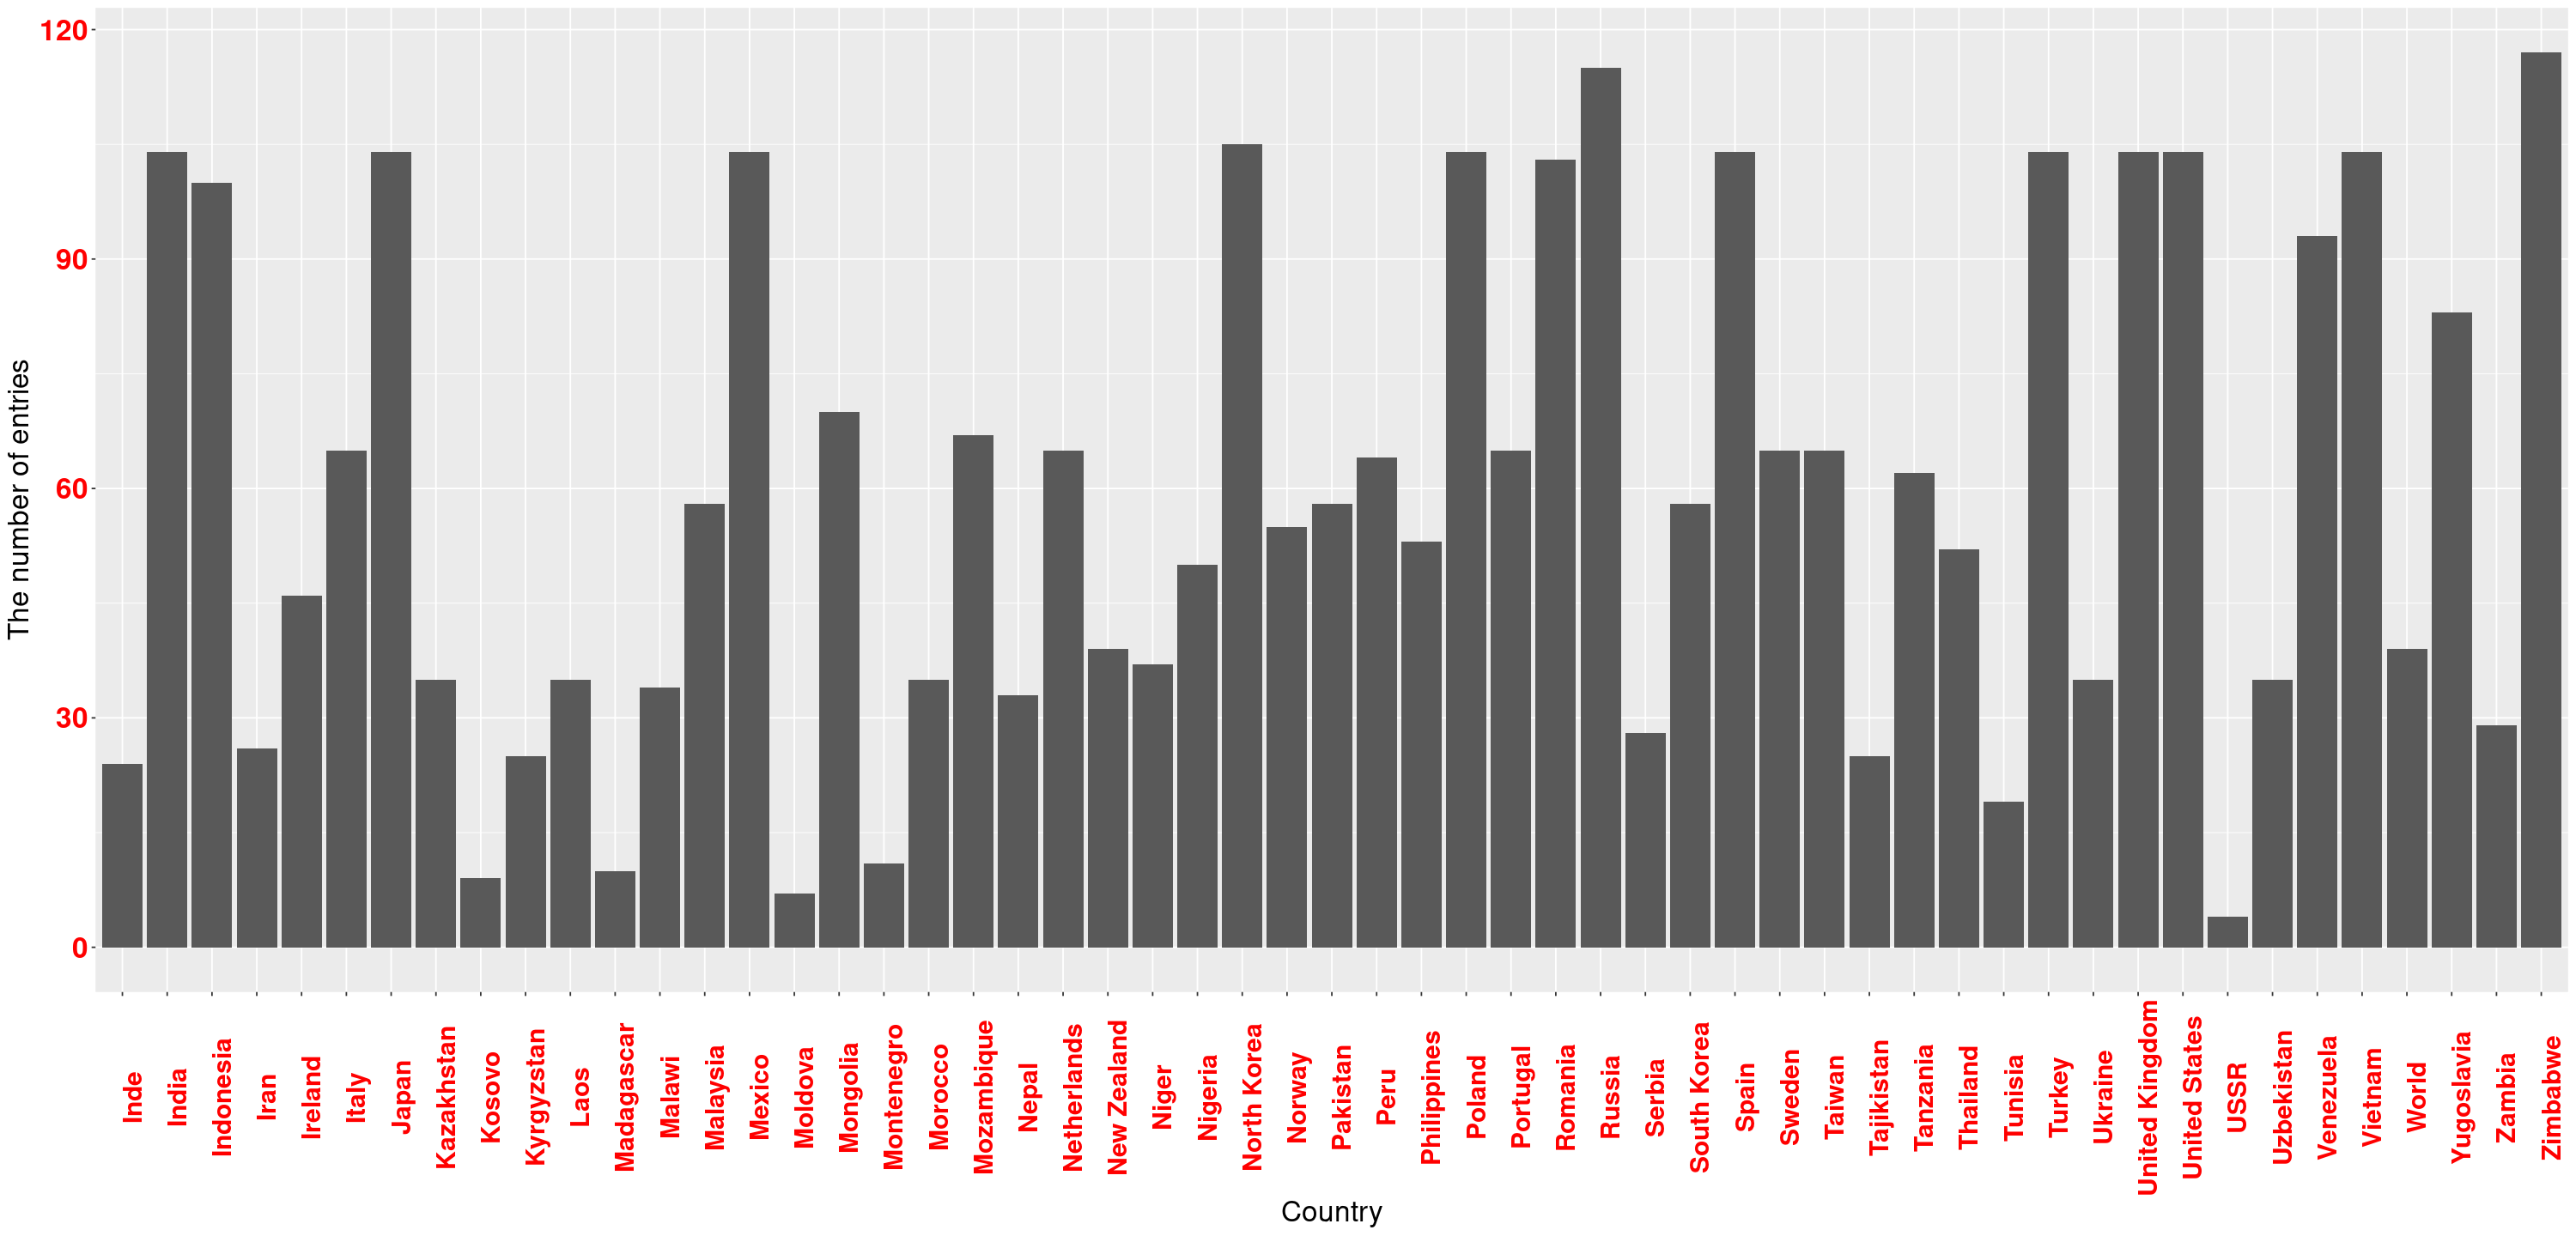

In [26]:
# seprated in two dataframe with filtering 

coal_production_n_1 <- coal_production_n %>% filter(grepl('A|B|C|D|E|F|G|H.', Entity)) # filtering with name

ggplot(coal_production_n_1, aes(x = as.factor(Entity)))+ geom_bar(stat = "count")+   
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title=element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20))+
labs(x = "Country",y = "The number of entries")


coal_production_n_2 <- coal_production_n %>% filter(!grepl('A|B|C|D|E|F|G|H.', Entity)) # filtering with name

ggplot(coal_production_n_2, aes(x = as.factor(Entity)))+ geom_bar(stat = "count")+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20))+
labs(x = "Country",y = "The number of entries")

#### for the following items select only the years ≥ 1970:

In [27]:
cp_from_70 <- coal_production_n %>% filter(Year >= 1971)
head(cp_from_70)

Entity      Code Year Coal.production..TWh.
1 Afghanistan AFG  1971 1.099                
2 Afghanistan AFG  1972 0.578                
3 Afghanistan AFG  1973 0.952                
4 Afghanistan AFG  1974 0.936                
5 Afghanistan AFG  1975 1.221                
6 Afghanistan AFG  1976 1.303

#### 3 selecting only the years after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions

In [28]:
sum <- cp_from_70 %>% group_by(Entity) %>%
  summarise(
    sum = sum(Coal.production..TWh.)
  )

sum <- sum %>% filter(!Entity %in% c('World','Asia Pacific','Asia and Oceania','North America','OECD',
                                          'Eurasia','Europe','EU-28','CIS')) # filter to have just countries
sum[order(sum$sum,decreasing = TRUE),][1:5,]

Entity        sum      
1 China         459564.65
2 United States 226068.84
3 Russia         98251.65
4 Australia      83077.07
5 India          77043.45

#### 4 for the 5 top Countries, create a plot of production as a function of time

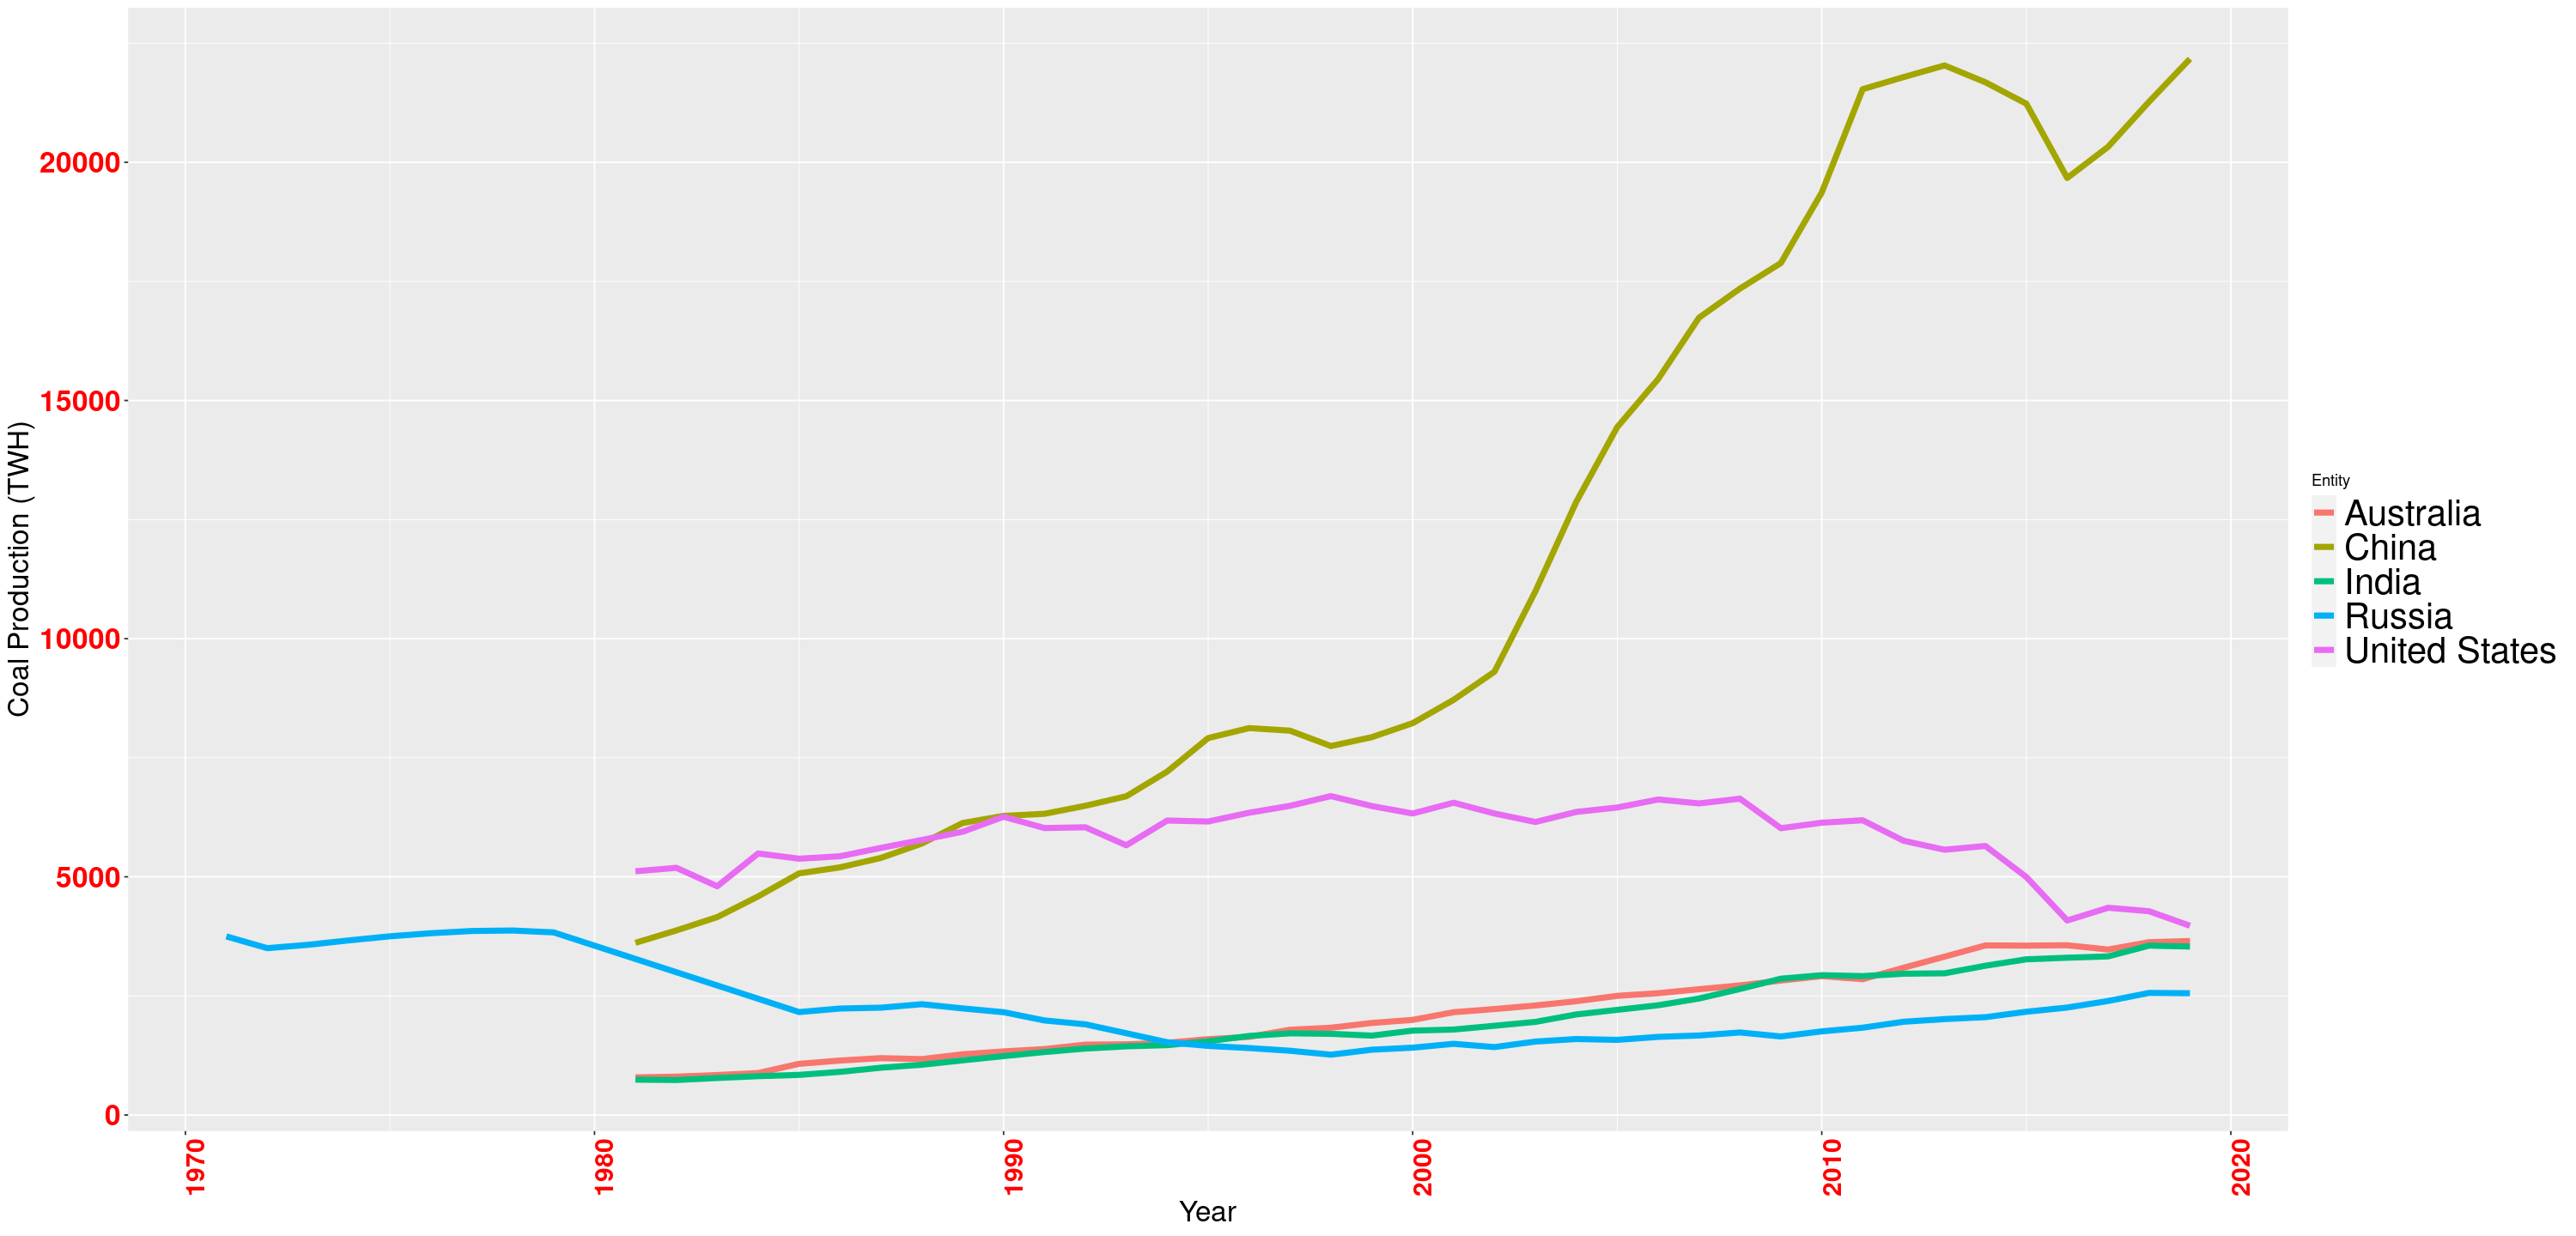

In [29]:
top_five <- cp_from_70 %>% filter(Entity %in% c('China','United States','Russia','Australia','India'))

ggplot(top_five, aes(x = Year, y = Coal.production..TWh.,group = Entity, col = Entity))+ geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
      legend.text = element_text(size=25))+
labs(x = "Year",y = "Coal Production (TWH)")

#### 5 generate a plot with the cumulative sum of the World’s coal production over the years

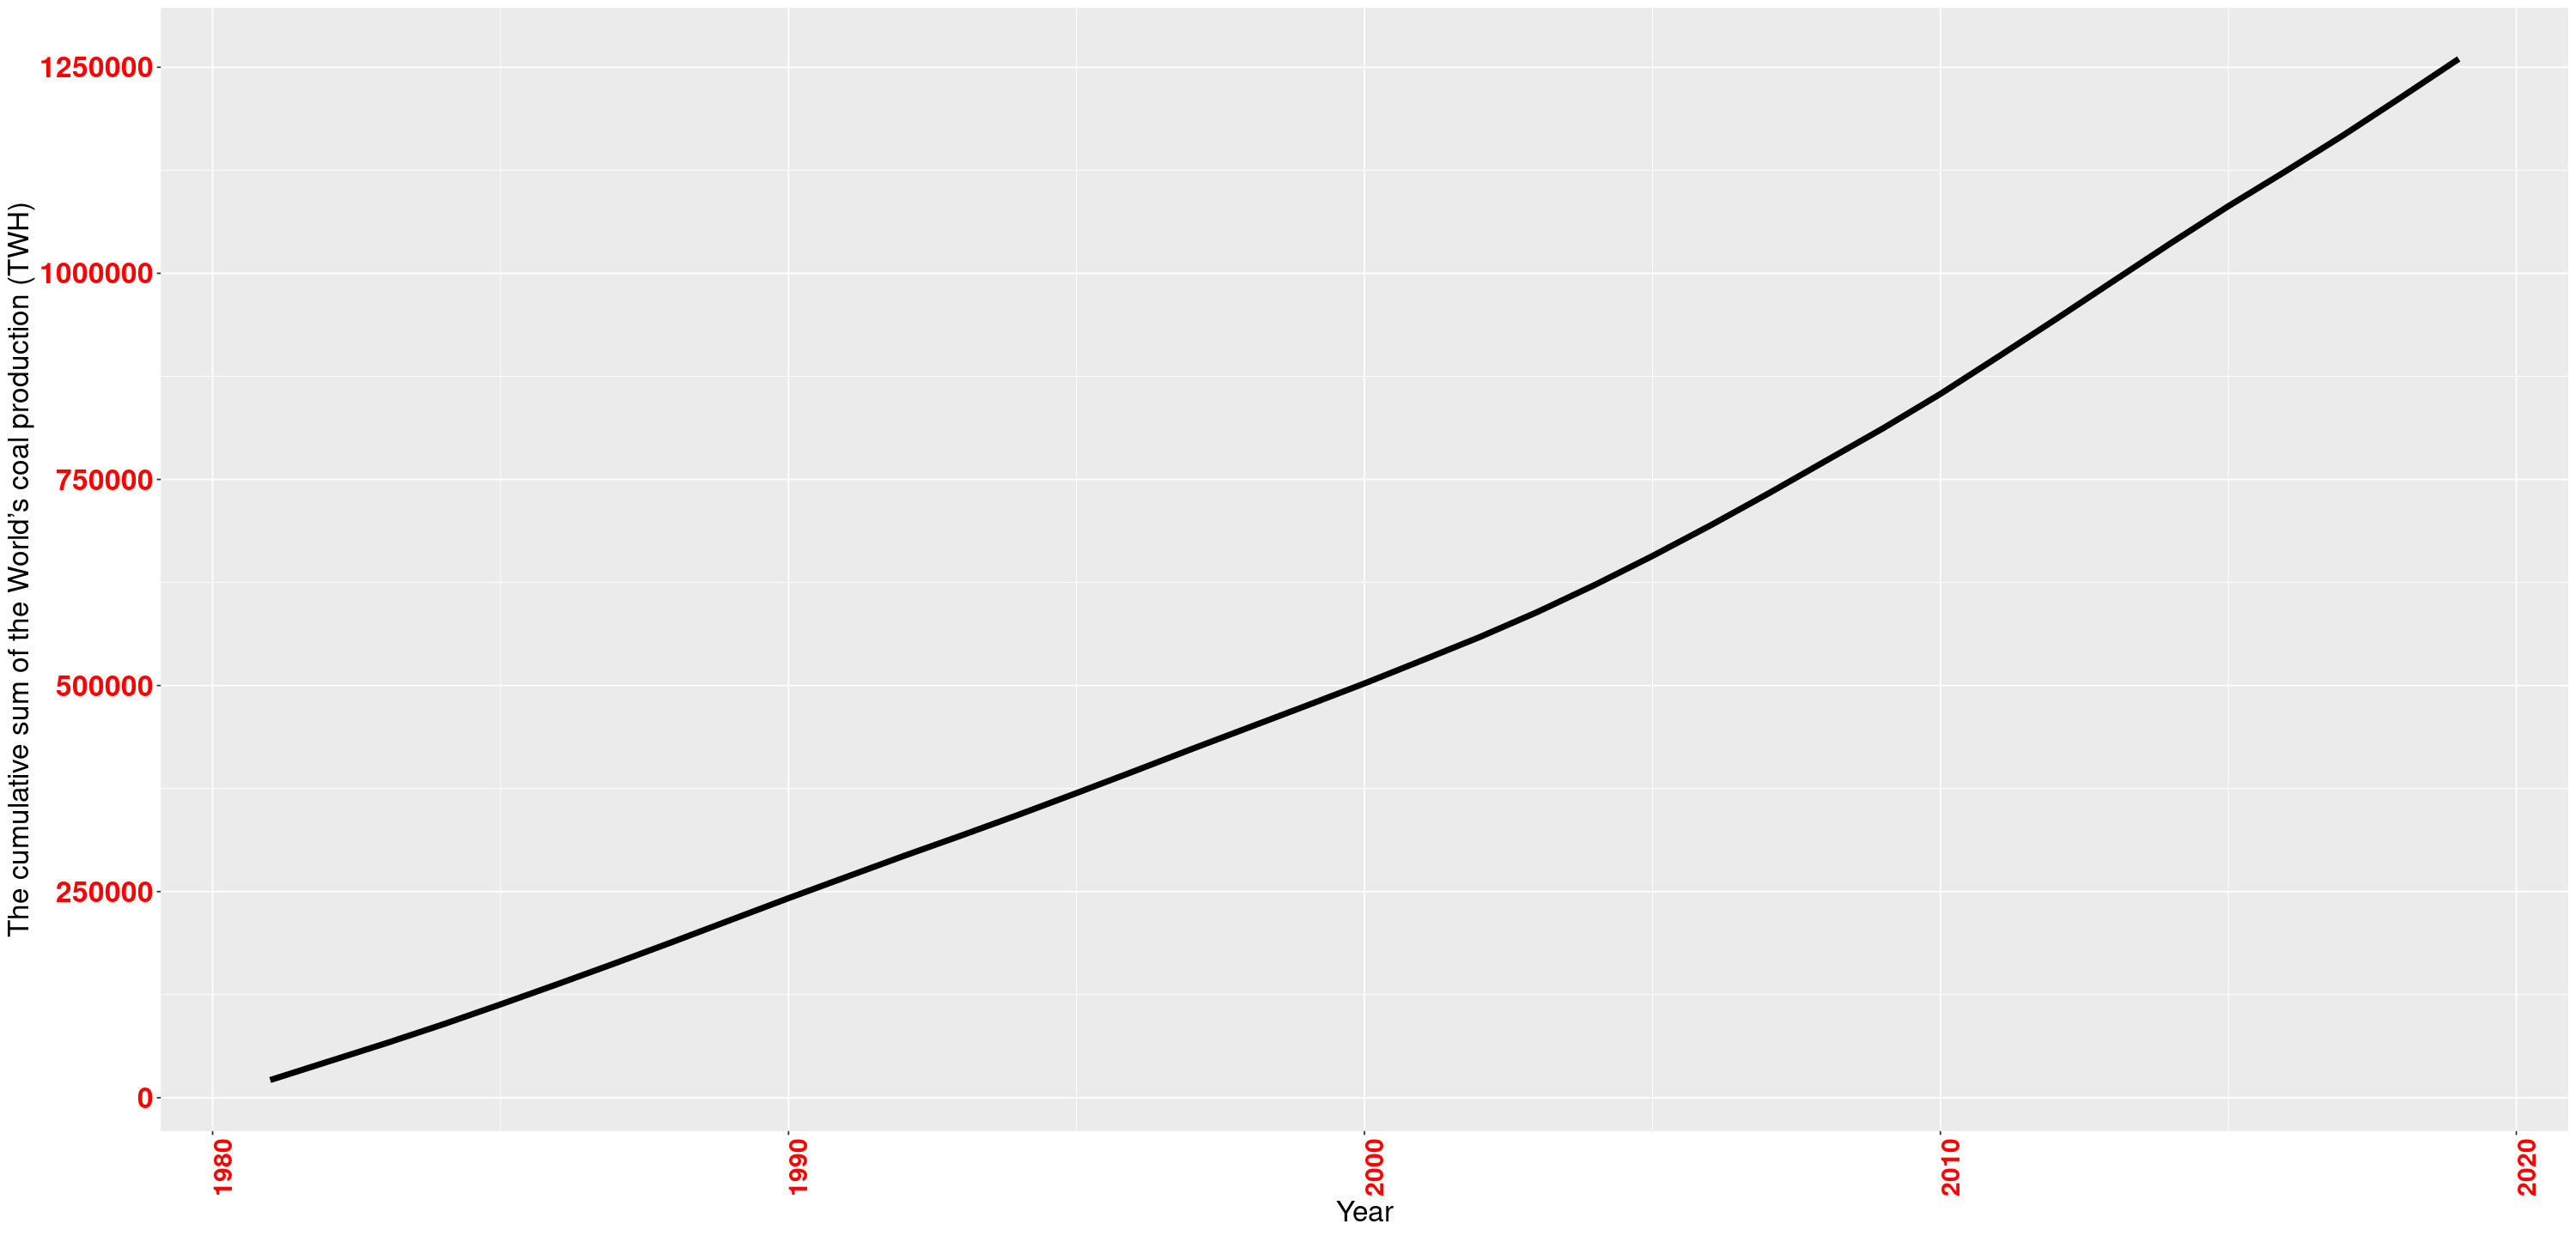

In [30]:
cp_from_70_W <- cp_from_70 %>% filter(Entity %in% c('World'))

cumsum_W <- cp_from_70_W %>%
  mutate(
    cumsum = cumsum(Coal.production..TWh.)
  )

ggplot(cumsum_W, aes(x = Year, y = cumsum))+ geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20))+
labs(x = "Year",y = "The cumulative sum of the World’s coal production (TWH)")

## Exercise 4 - Covid19 Vaccine data
### • The file vaccinationsby-manufacturer.csv, (https://github.com/owid/covid-19-data/blob/ master/public/data/vaccinations/vaccinations-by-manufacturer.csv contains a summary on the vaccination data grouped by Vaccine type and Country.

#### 1 filter() the original tibble by selecting the following countries: Italy

In [4]:
vaccinations_by_manufacturer <- tibble(read.csv("vaccinations-by-manufacturer.csv"))
vm_Italy<- vaccinations_by_manufacturer %>% filter(location %in% c('Italy'))
head(vm_Italy)

location date       vaccine         total_vaccinations
1 Italy    2020-12-27 Moderna            2              
2 Italy    2020-12-27 Pfizer/BioNTech 7347              
3 Italy    2020-12-28 Moderna            6              
4 Italy    2020-12-28 Pfizer/BioNTech 8848              
5 Italy    2020-12-29 Moderna           11              
6 Italy    2020-12-29 Pfizer/BioNTech 9942

#### 2 plot the number of vaccines given as a function of time for the different vaccine manufacturer

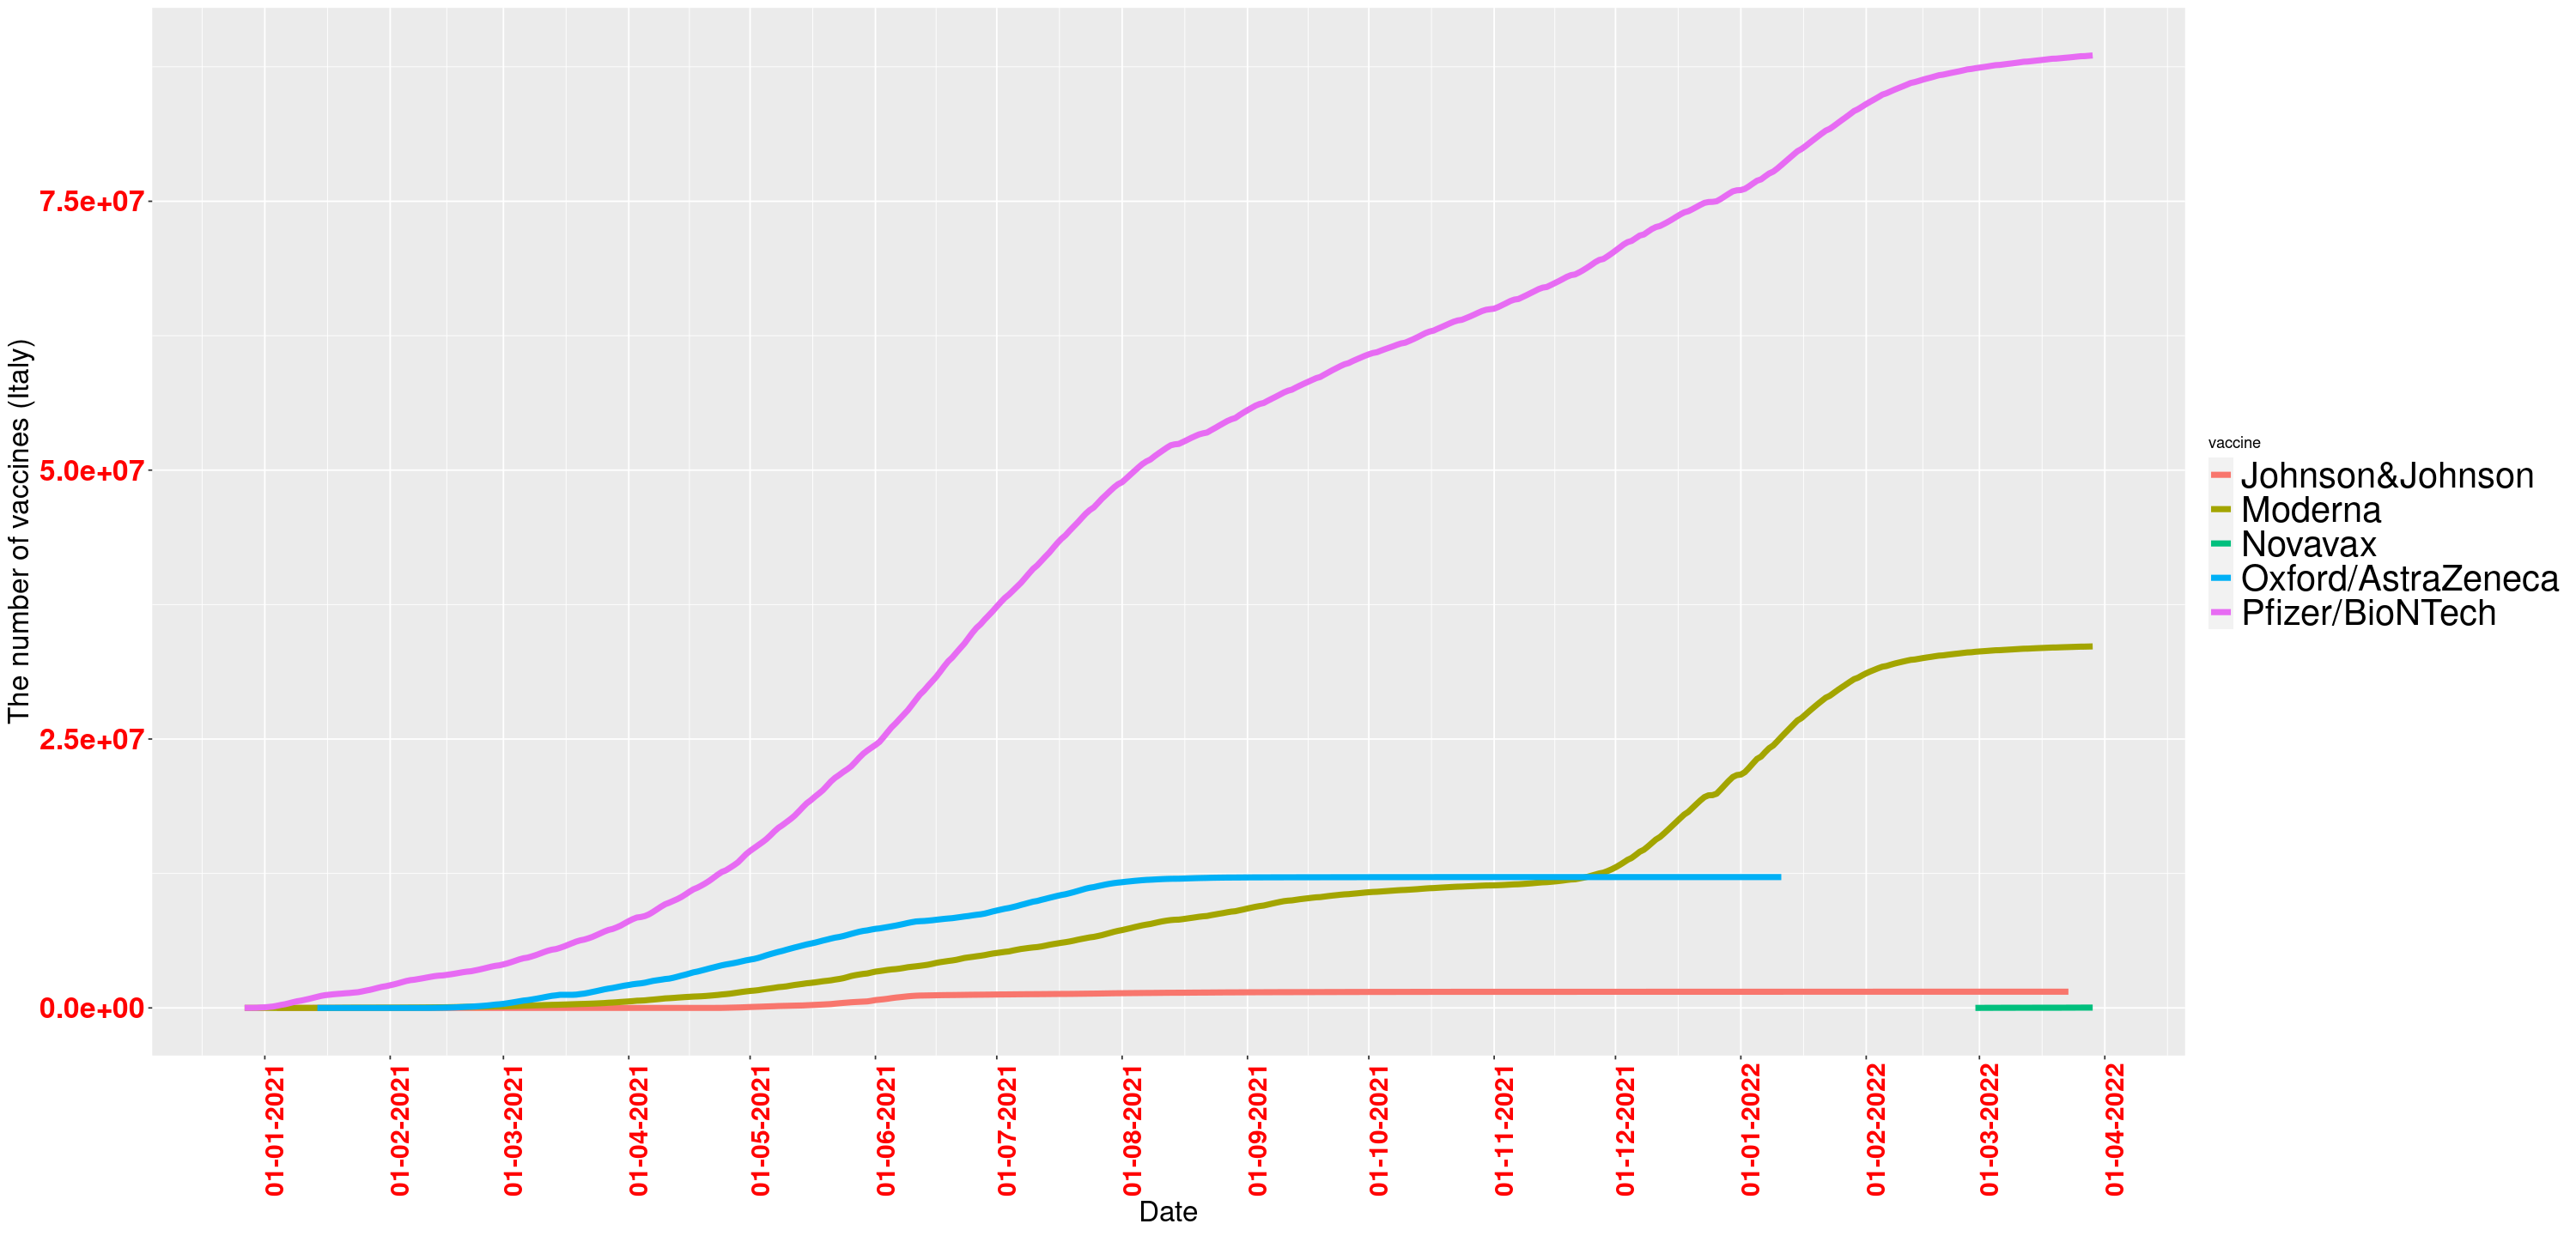

In [5]:
vm_Italy$date <- as.Date(vm_Italy$date) #convert to date to use break for better label_x

ggplot(vm_Italy, aes(x = date, y = total_vaccinations,group = vaccine, col = vaccine))+geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
      legend.text = element_text(size = 25))+
labs(x = "Date",y = "The number of vaccines (Italy)")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x

#### 3 from the same tibble plot the total number of vaccines shot per day in Italy

date       sum  
1 2020-12-27  7349
2 2020-12-28  8854
3 2020-12-29  9953
4 2020-12-30 14838
5 2020-12-31 40763
6 2021-01-01 52056

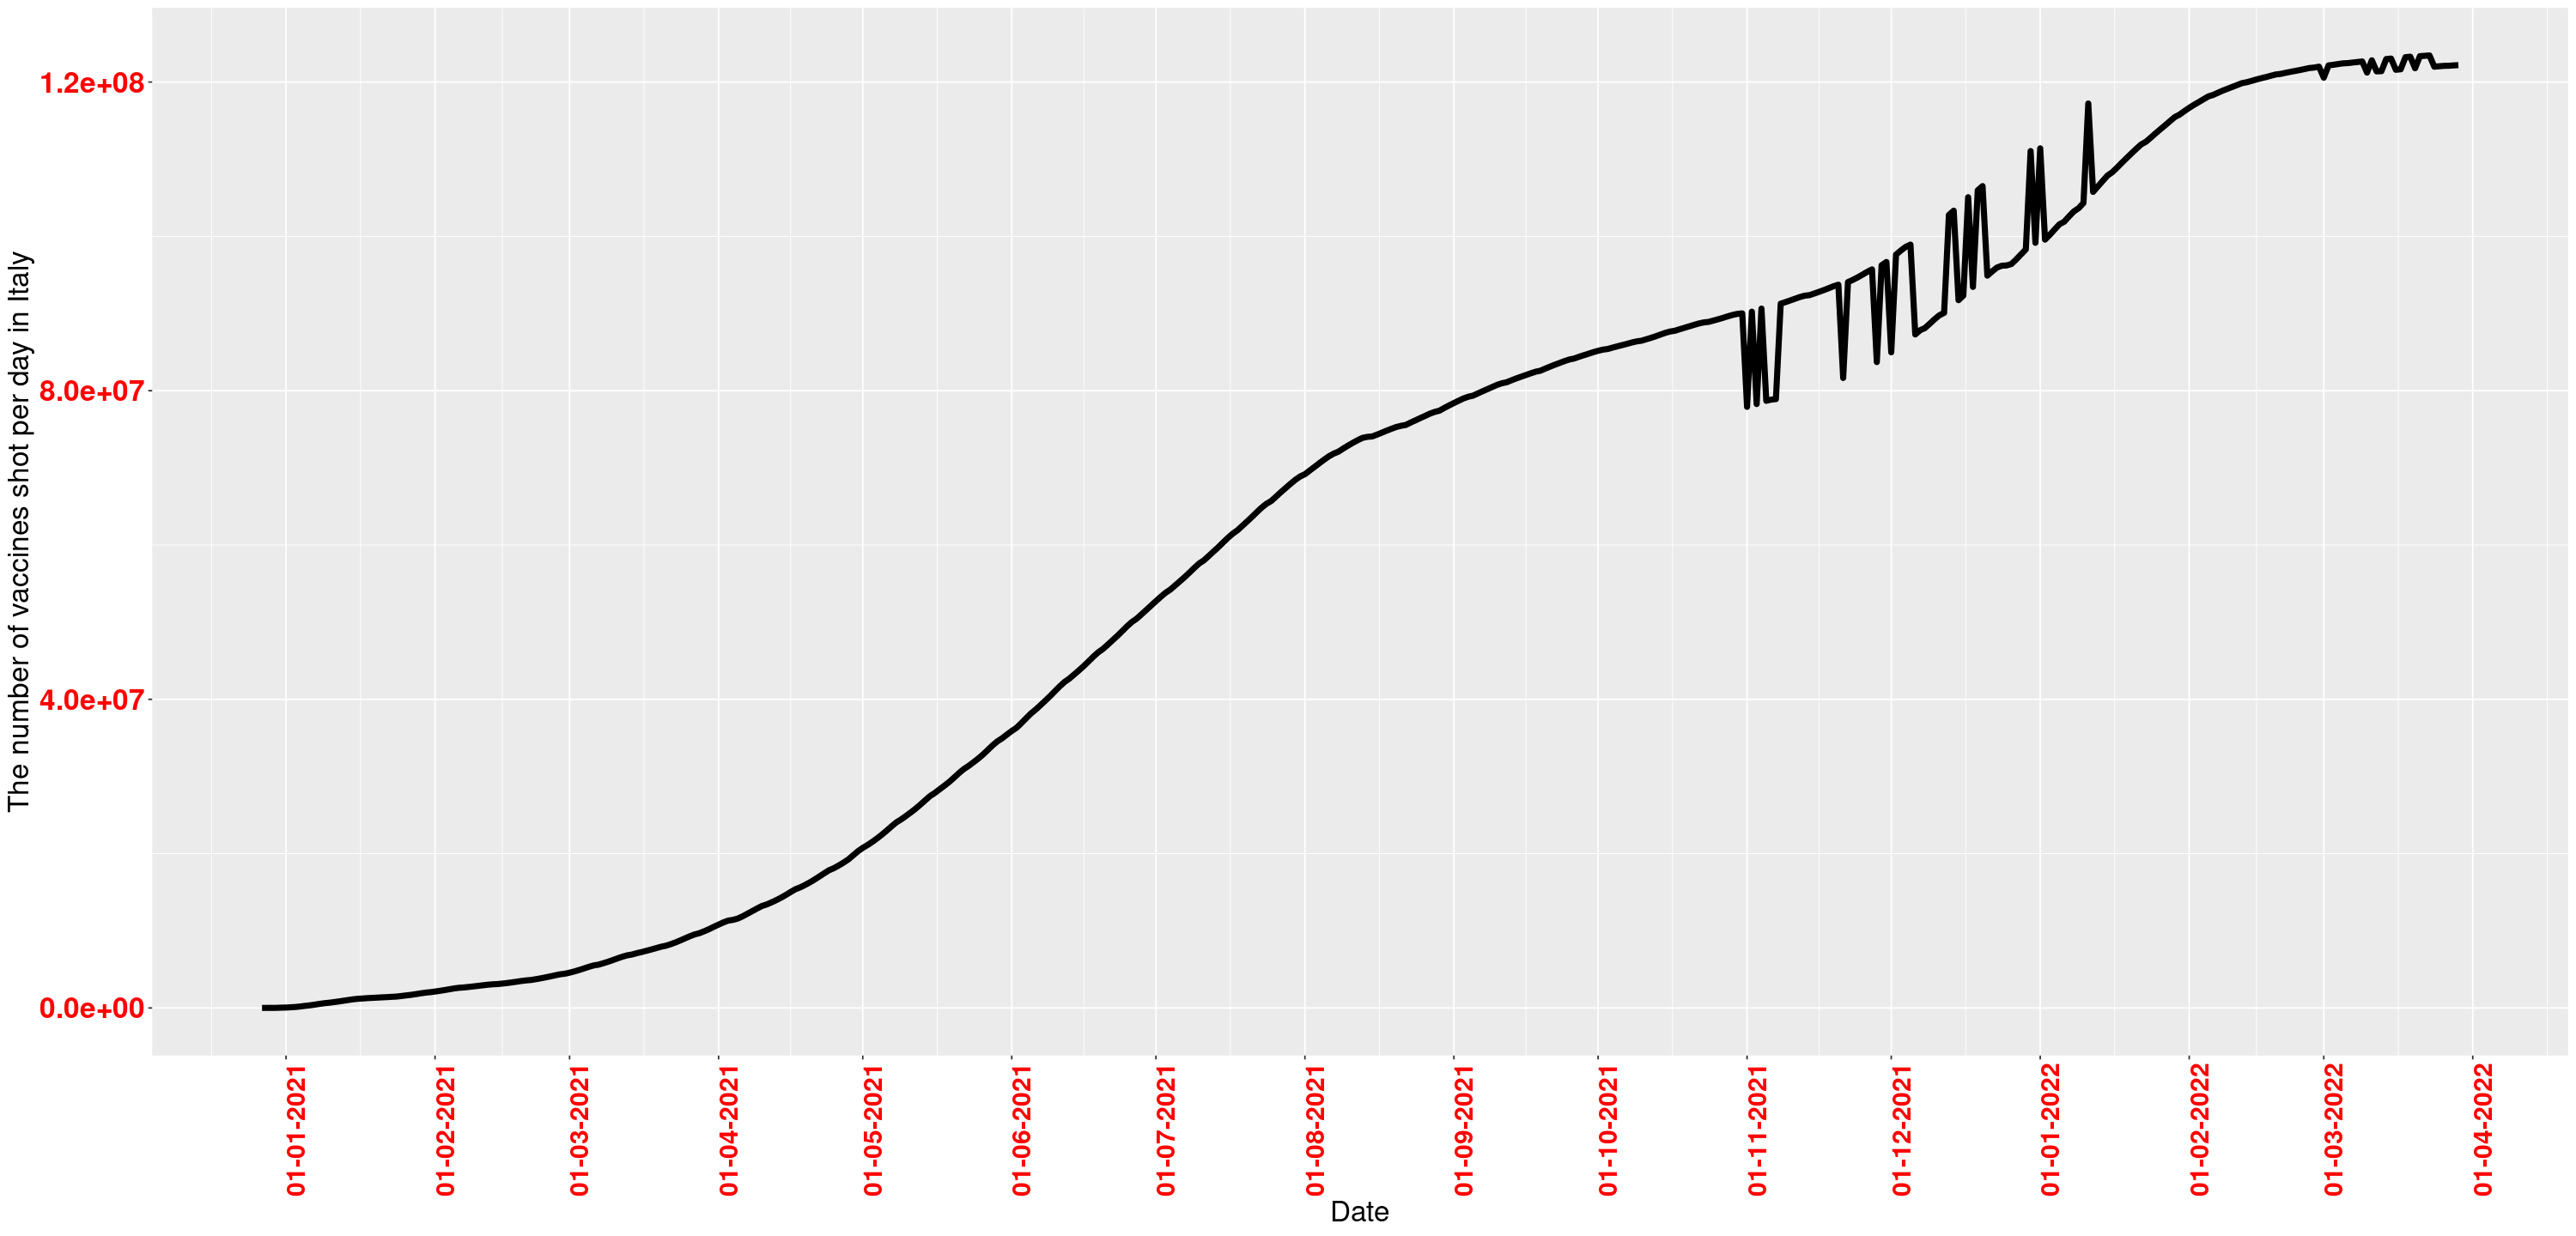

In [6]:
vm_Italy_daily<-vm_Italy %>%
  group_by(date) %>%
  summarise(
    sum = sum(total_vaccinations)
  )
head(vm_Italy_daily)

ggplot(vm_Italy_daily, aes(x = date, y = sum, group = 1))+geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20))+
labs(x = "Date",y = "The number of vaccines shot per day in Italy")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("month"))

# It does not make sense for number of vaccines shot per day, about 120 milion vaccines per day!!!!!
# It looks like cumsum but also does not make sense becuase in some date we can see it has decrease!!!!!
# So I try to find the number of vaccines shot per day in Italy in next block.

date       sum   daily
1 2020-12-27  7349  7349
2 2020-12-28  8854  1505
3 2020-12-29  9953  1099
4 2020-12-30 14838  4885
5 2020-12-31 40763 25925
6 2021-01-01 52056 11293

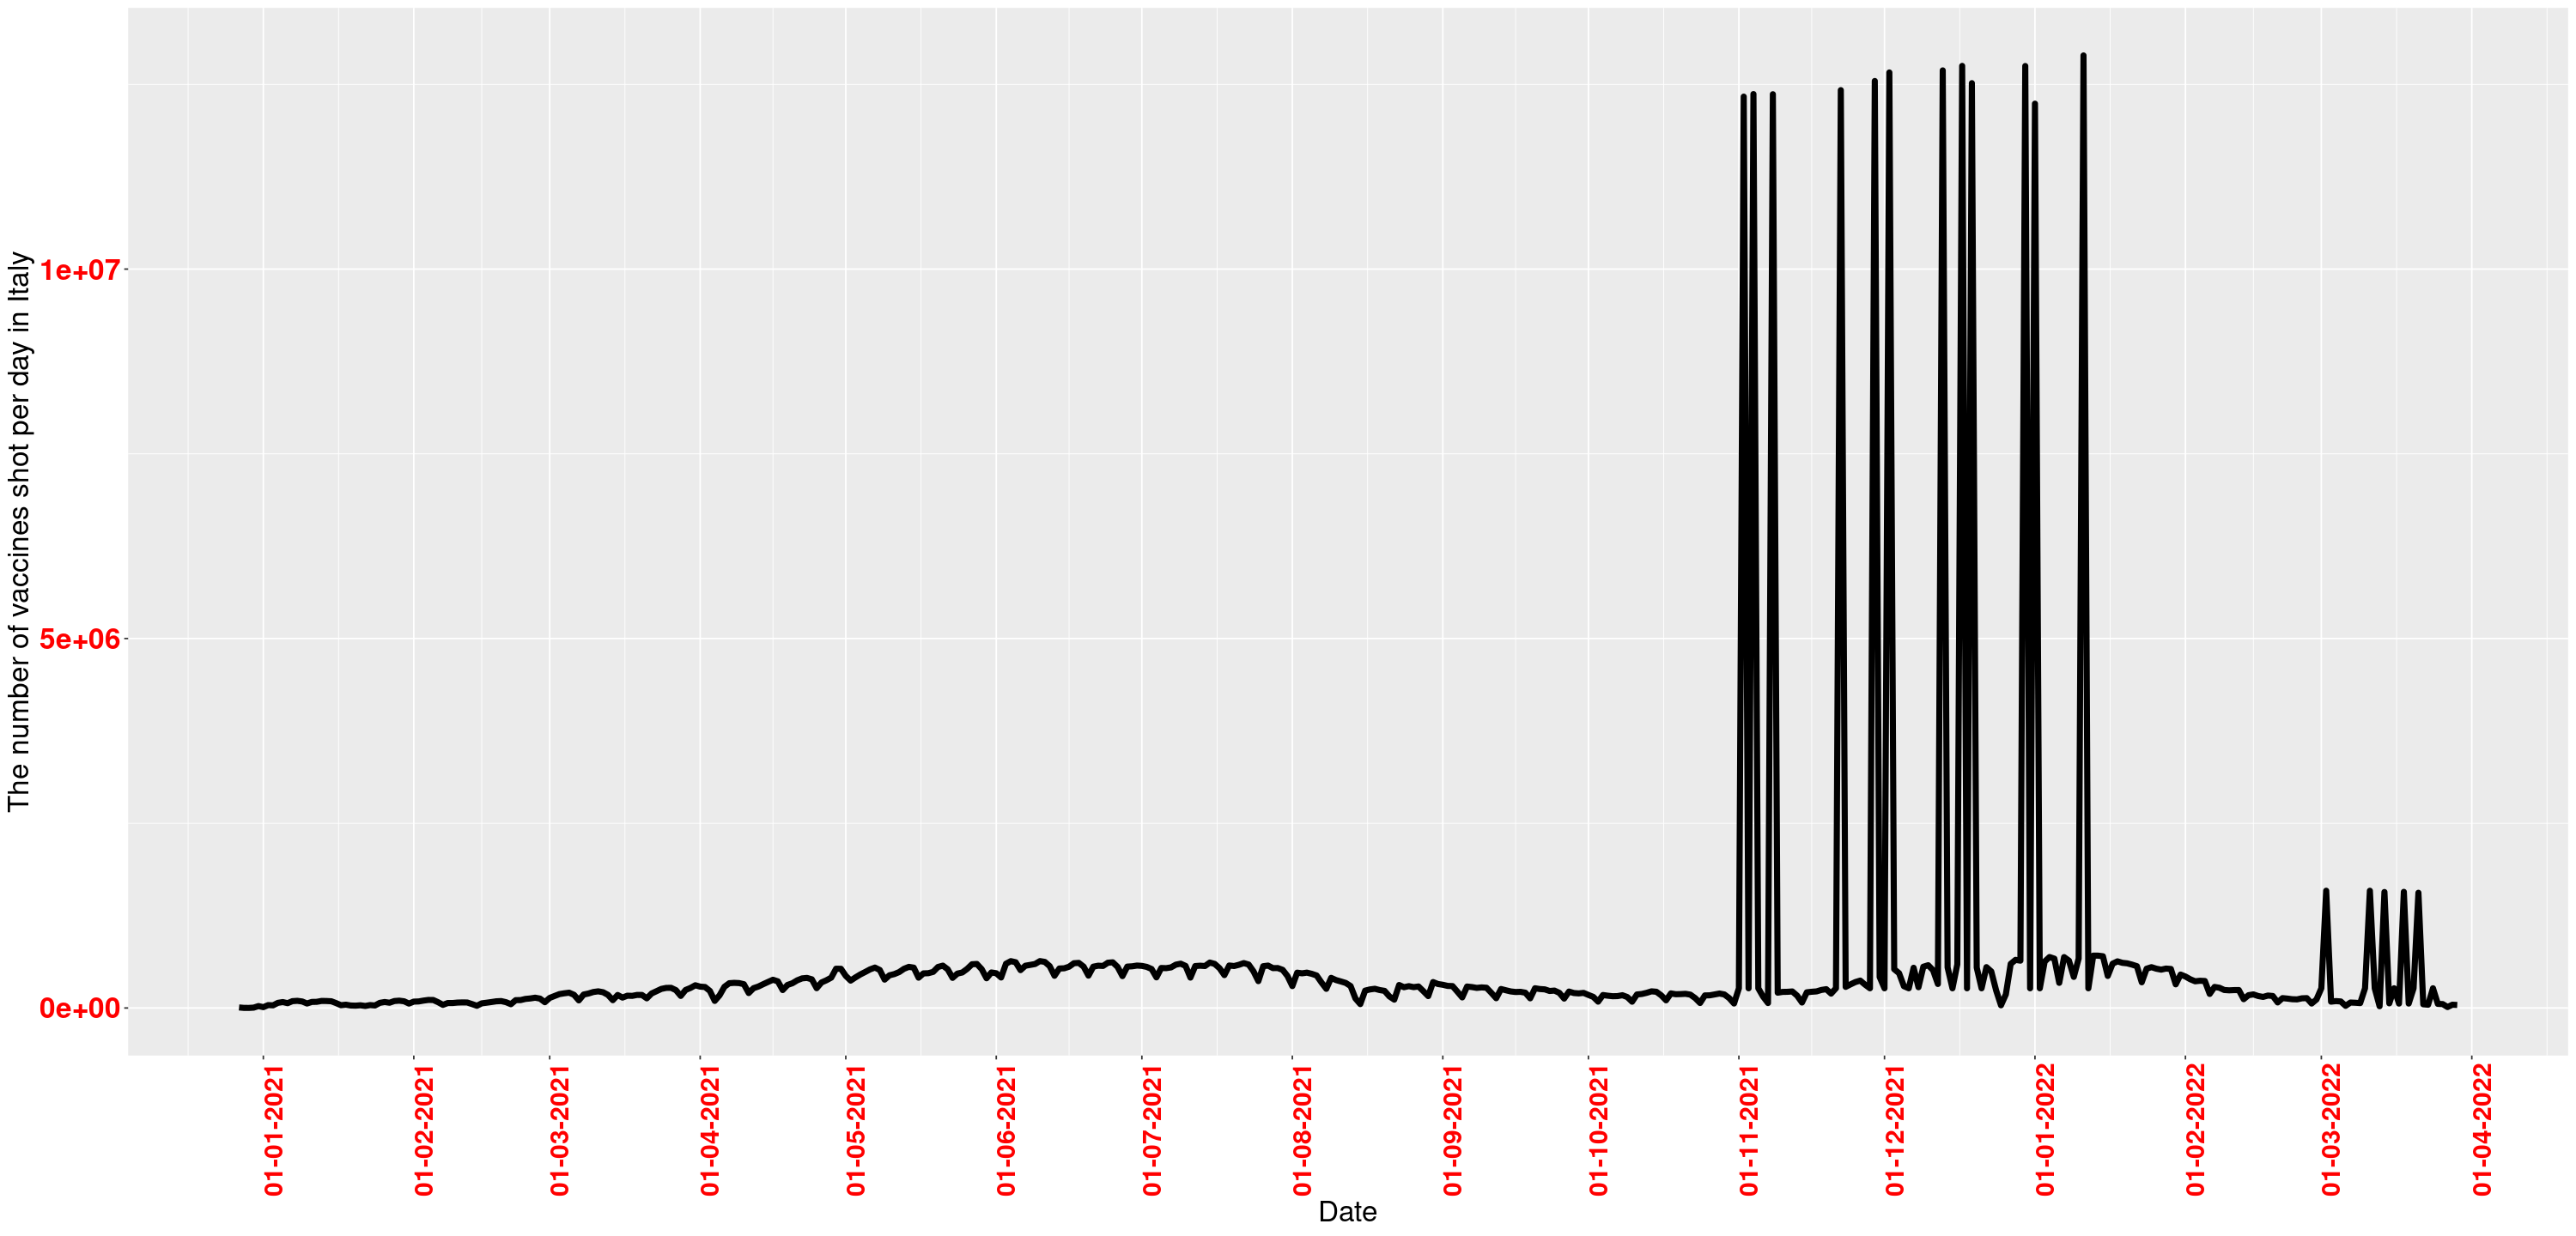

In [9]:
n <- nrow(vm_Italy_daily) # number of row

daily<-vector() # vector of daily vaccination
daily[1]<-vm_Italy_daily$sum[1] # first day

# finding the number of vaccines shot per day
for (i in 2:n){     
    daily[i] <- vm_Italy_daily$sum[i]-vm_Italy_daily$sum[i-1]
}

m <- mean(daily) # mean of daily

for (i in 1:n){ #replacing negative values with the mean
    if (daily[i] < 0){
        daily[i] <- m   
    }
}

head(vm_Italy_daily %>% add_column(daily = daily))

ggplot(vm_Italy_daily, aes(x = date, y = daily, group = 1))+geom_line(size=2)+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20))+
labs(x = "Date",y = "The number of vaccines shot per day in Italy")+
scale_x_date(labels=date_format('%d-%m-%Y'),breaks = date_breaks("month"))

# we have negetive number here and replaced them with mean value.
# I think the data is not good data at least for Italy. 

#### 4 do the same exercise for the following countries: Germany and United States of America

### Germany

In [11]:
vm_Germany <- vaccinations_by_manufacturer %>% filter(location %in% c('Germany'))
head(vm_Germany)

location date       vaccine            total_vaccinations
1 Germany  2020-12-27 Johnson&Johnson        0             
2 Germany  2020-12-27 Moderna                8             
3 Germany  2020-12-27 Novavax                0             
4 Germany  2020-12-27 Oxford/AstraZeneca     1             
5 Germany  2020-12-27 Pfizer/BioNTech    24367             
6 Germany  2020-12-28 Johnson&Johnson        0

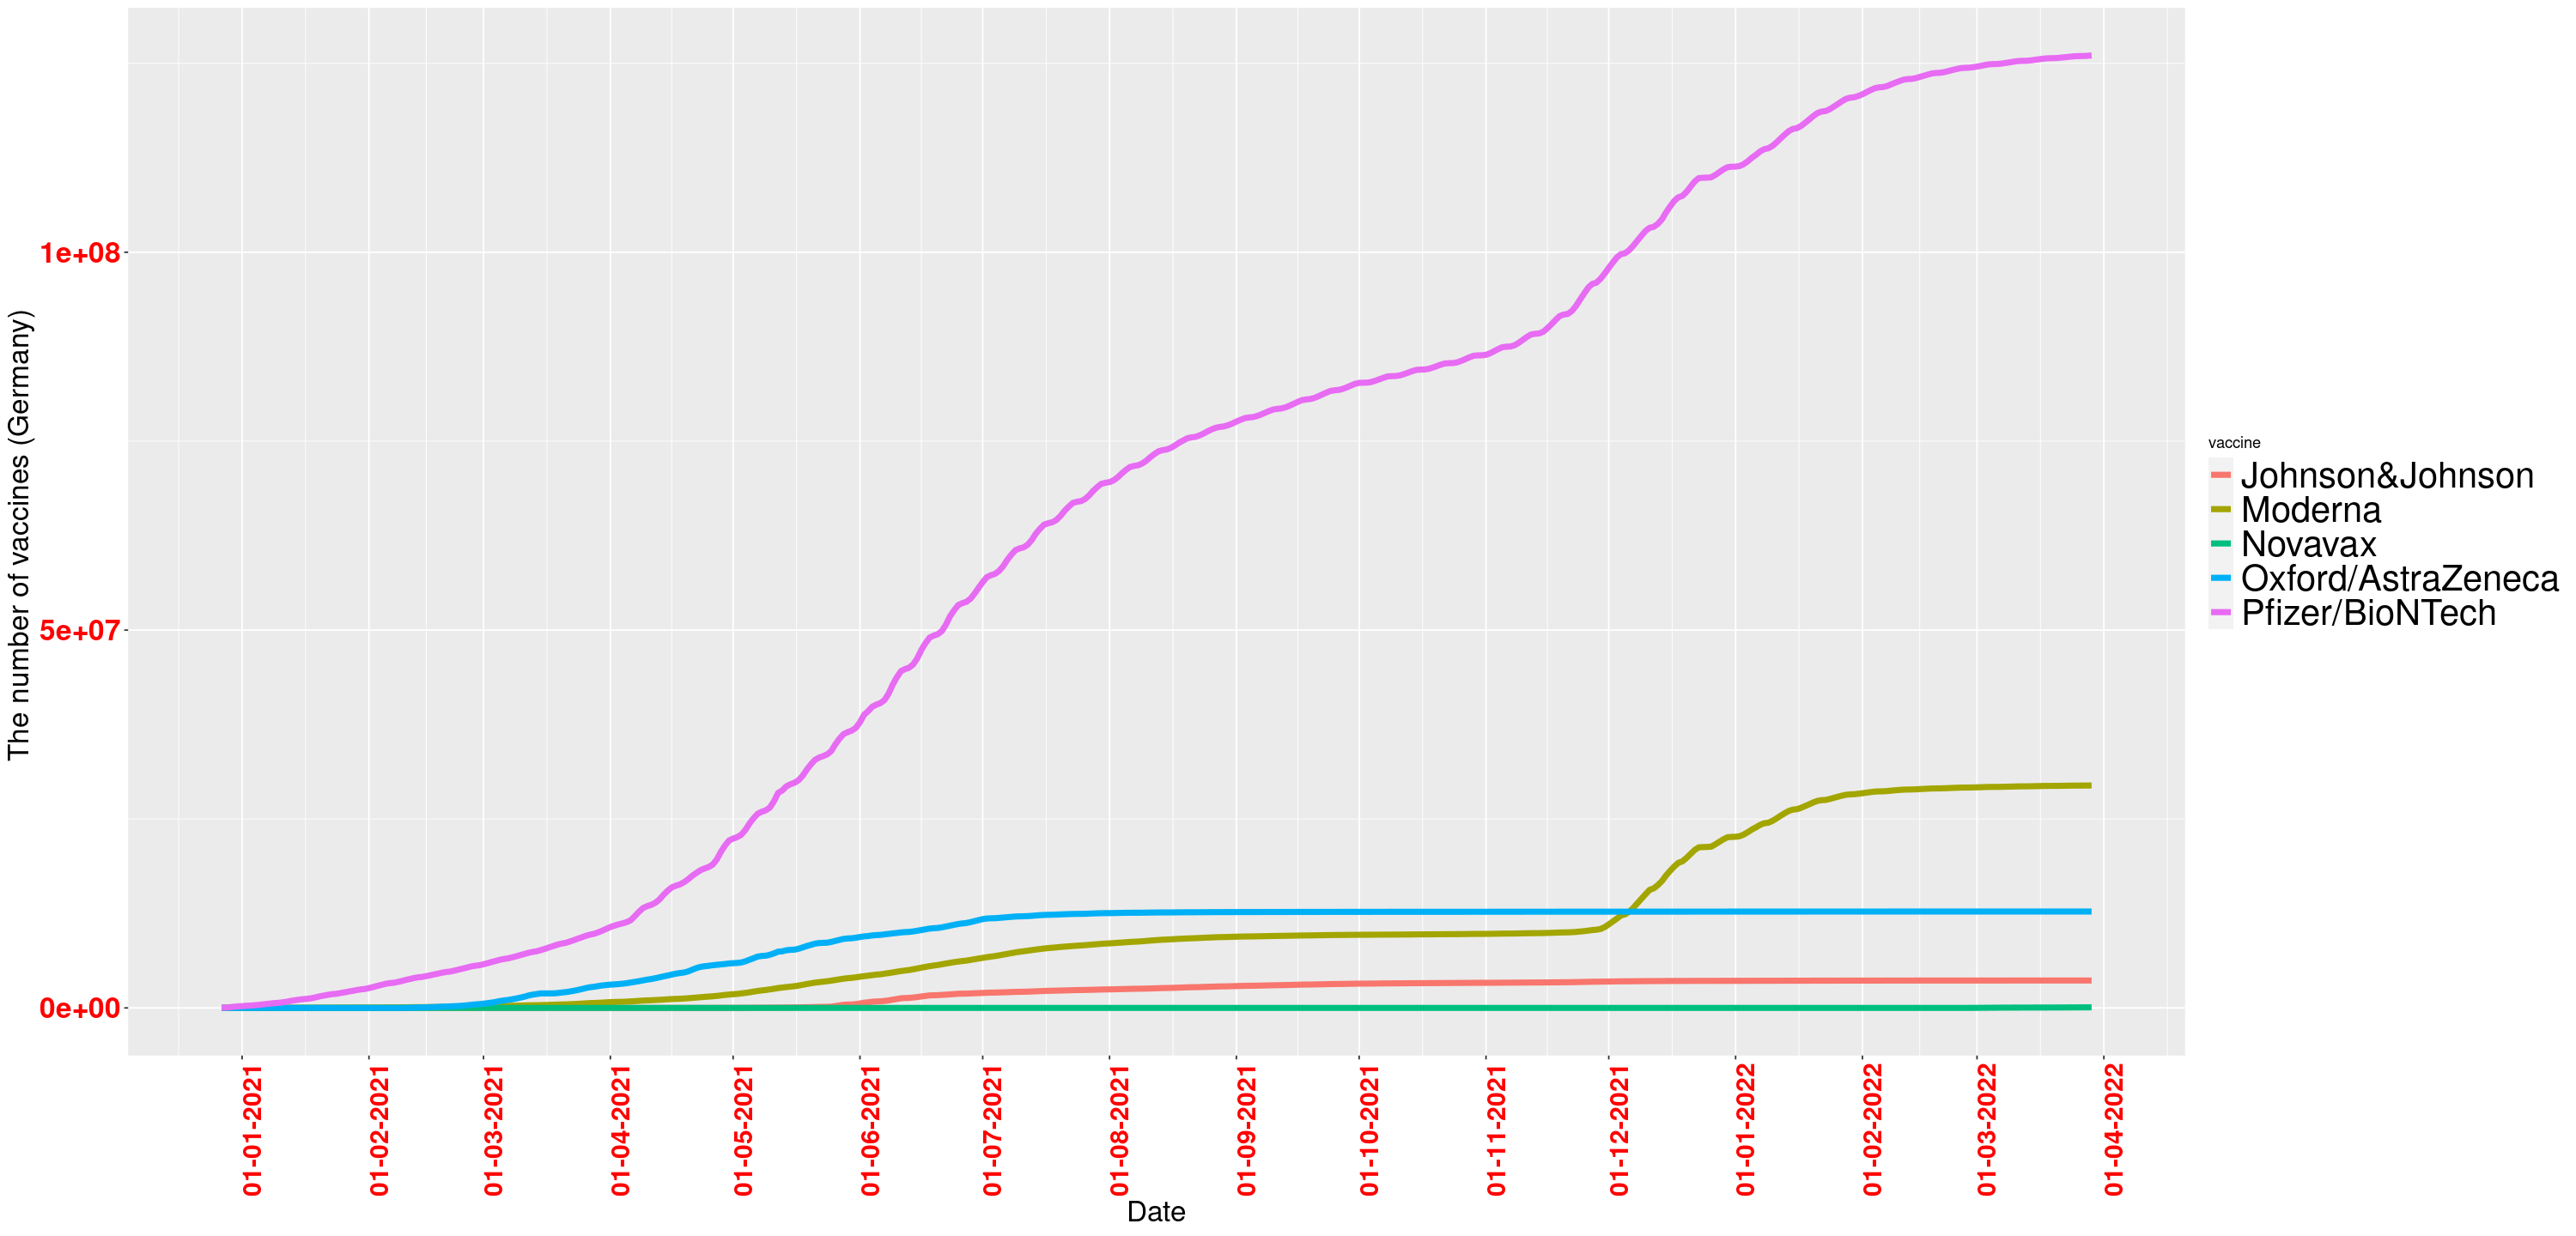

In [12]:
vm_Germany$date <- as.Date(vm_Germany$date) #convert to date to use break for better label_x

ggplot(vm_Germany, aes(x = date, y = total_vaccinations,group = vaccine, col = vaccine))+geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
      legend.text = element_text(size = 25))+
labs(x = "Date",y = "The number of vaccines (Germany) ")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x

date       sum   
1 2020-12-27  24376
2 2020-12-28  42477
3 2020-12-29  93182
4 2020-12-30 157385
5 2020-12-31 207402
6 2021-01-01 233090

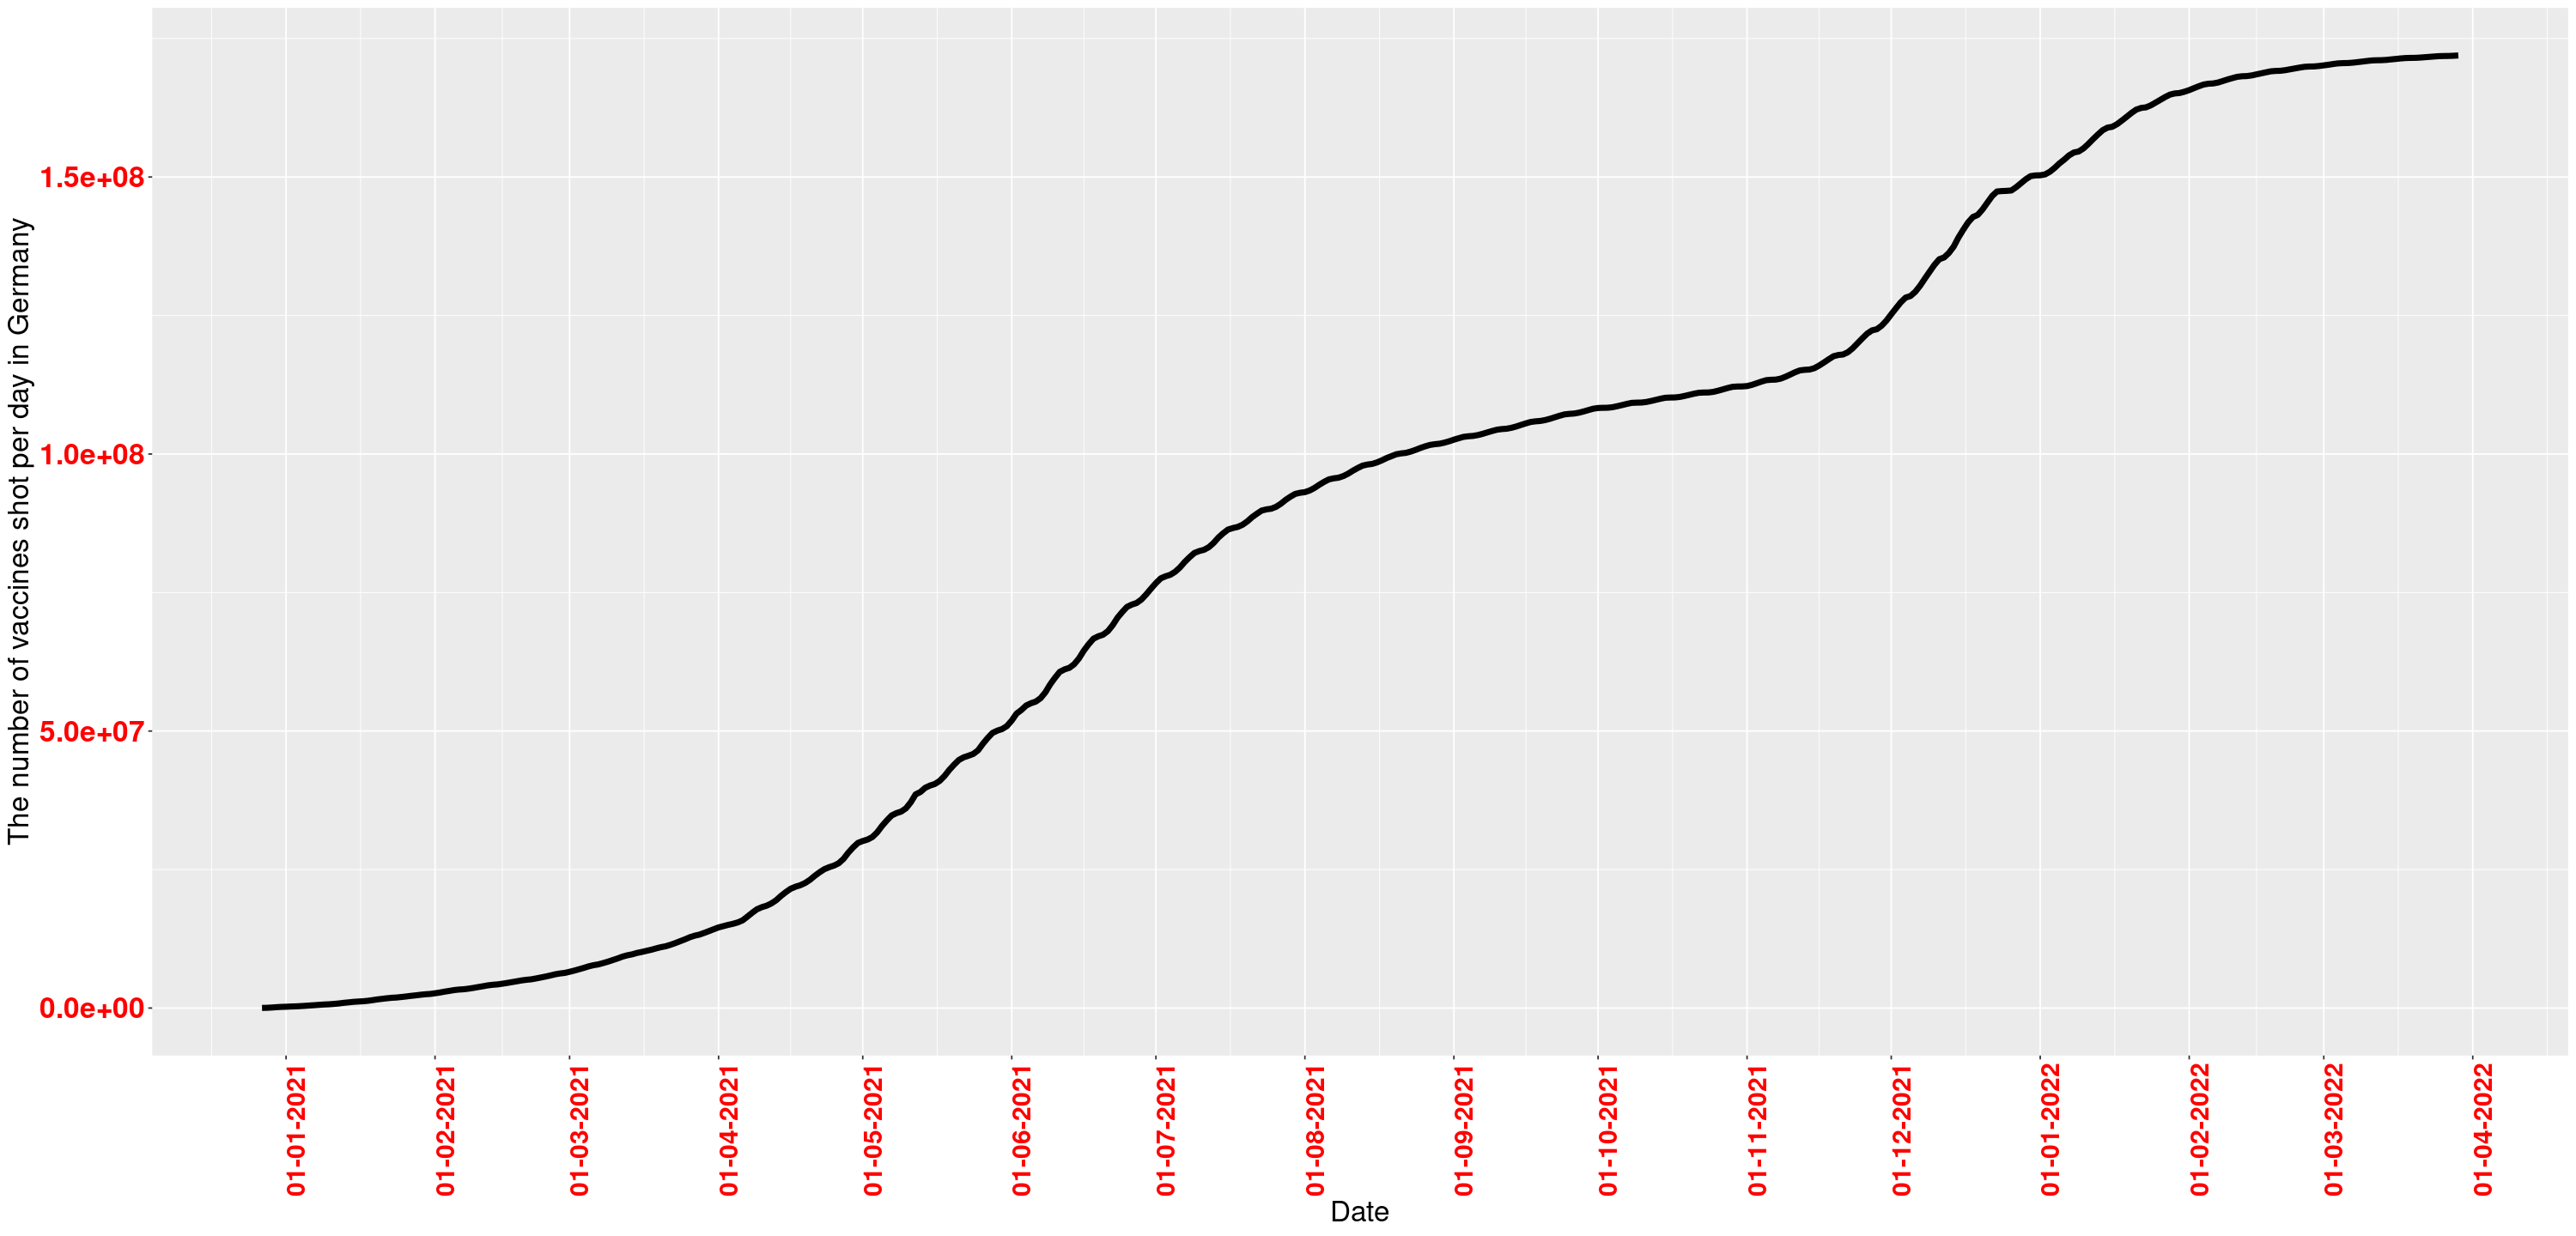

In [37]:
vm_Germany_daily<-vm_Germany %>%
  group_by(date) %>%
  summarise(
    sum = sum(total_vaccinations)
  )
head(vm_Germany_daily)

ggplot(vm_Germany_daily, aes(x = date, y = sum, group = 1))+geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20))+
labs(x = "Date",y = "The number of vaccines shot per day in Germany")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("month"))


### United States of America

In [39]:
vm_USA <- vaccinations_by_manufacturer %>% filter(location %in% c('United States'))
head(vm_USA)

location      date       vaccine         total_vaccinations
1 United States 2021-01-12 Moderna         3835859           
2 United States 2021-01-12 Pfizer/BioNTech 5488697           
3 United States 2021-01-13 Moderna         4249795           
4 United States 2021-01-13 Pfizer/BioNTech 6025872           
5 United States 2021-01-15 Moderna         5122662           
6 United States 2021-01-15 Pfizer/BioNTech 7153268

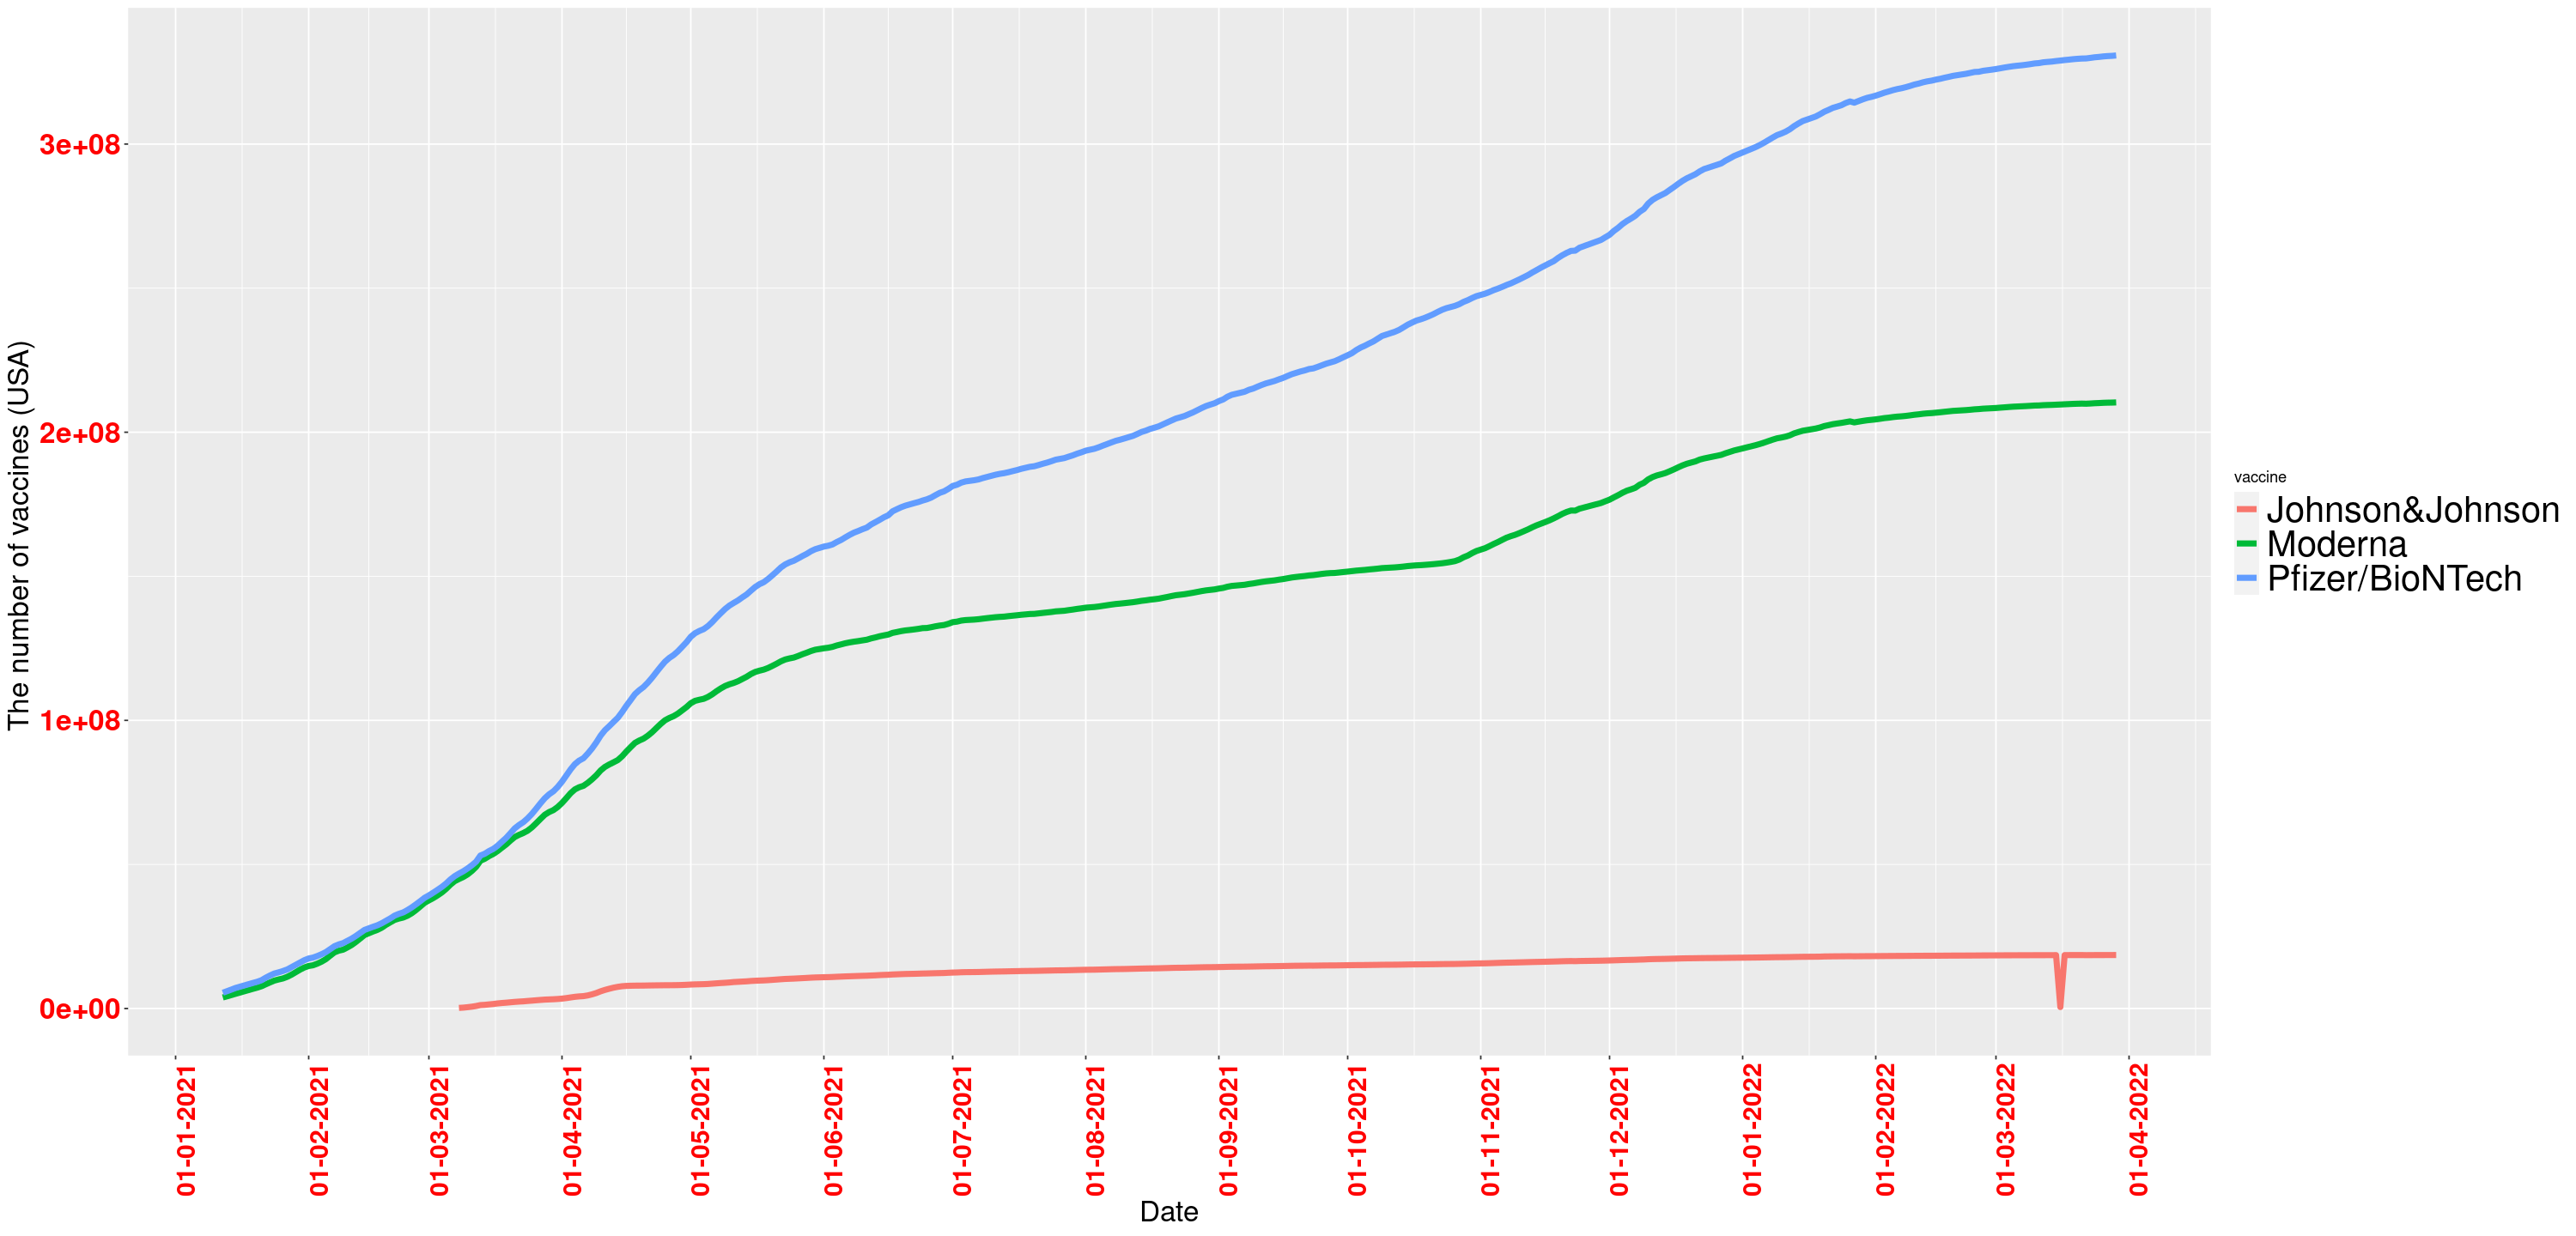

In [40]:
vm_USA$date <- as.Date(vm_USA$date) #convert to date to use break for better label_x

ggplot(vm_USA, aes(x = date, y = total_vaccinations,group = vaccine, col = vaccine))+geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
      legend.text = element_text(size = 25))+
labs(x = "Date",y = "The number of vaccines (USA) ")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x

date       sum     
1 2021-01-12  9324556
2 2021-01-13 10275667
3 2021-01-15 12275930
4 2021-01-19 15703372
5 2021-01-20 16520813
6 2021-01-21 17541710

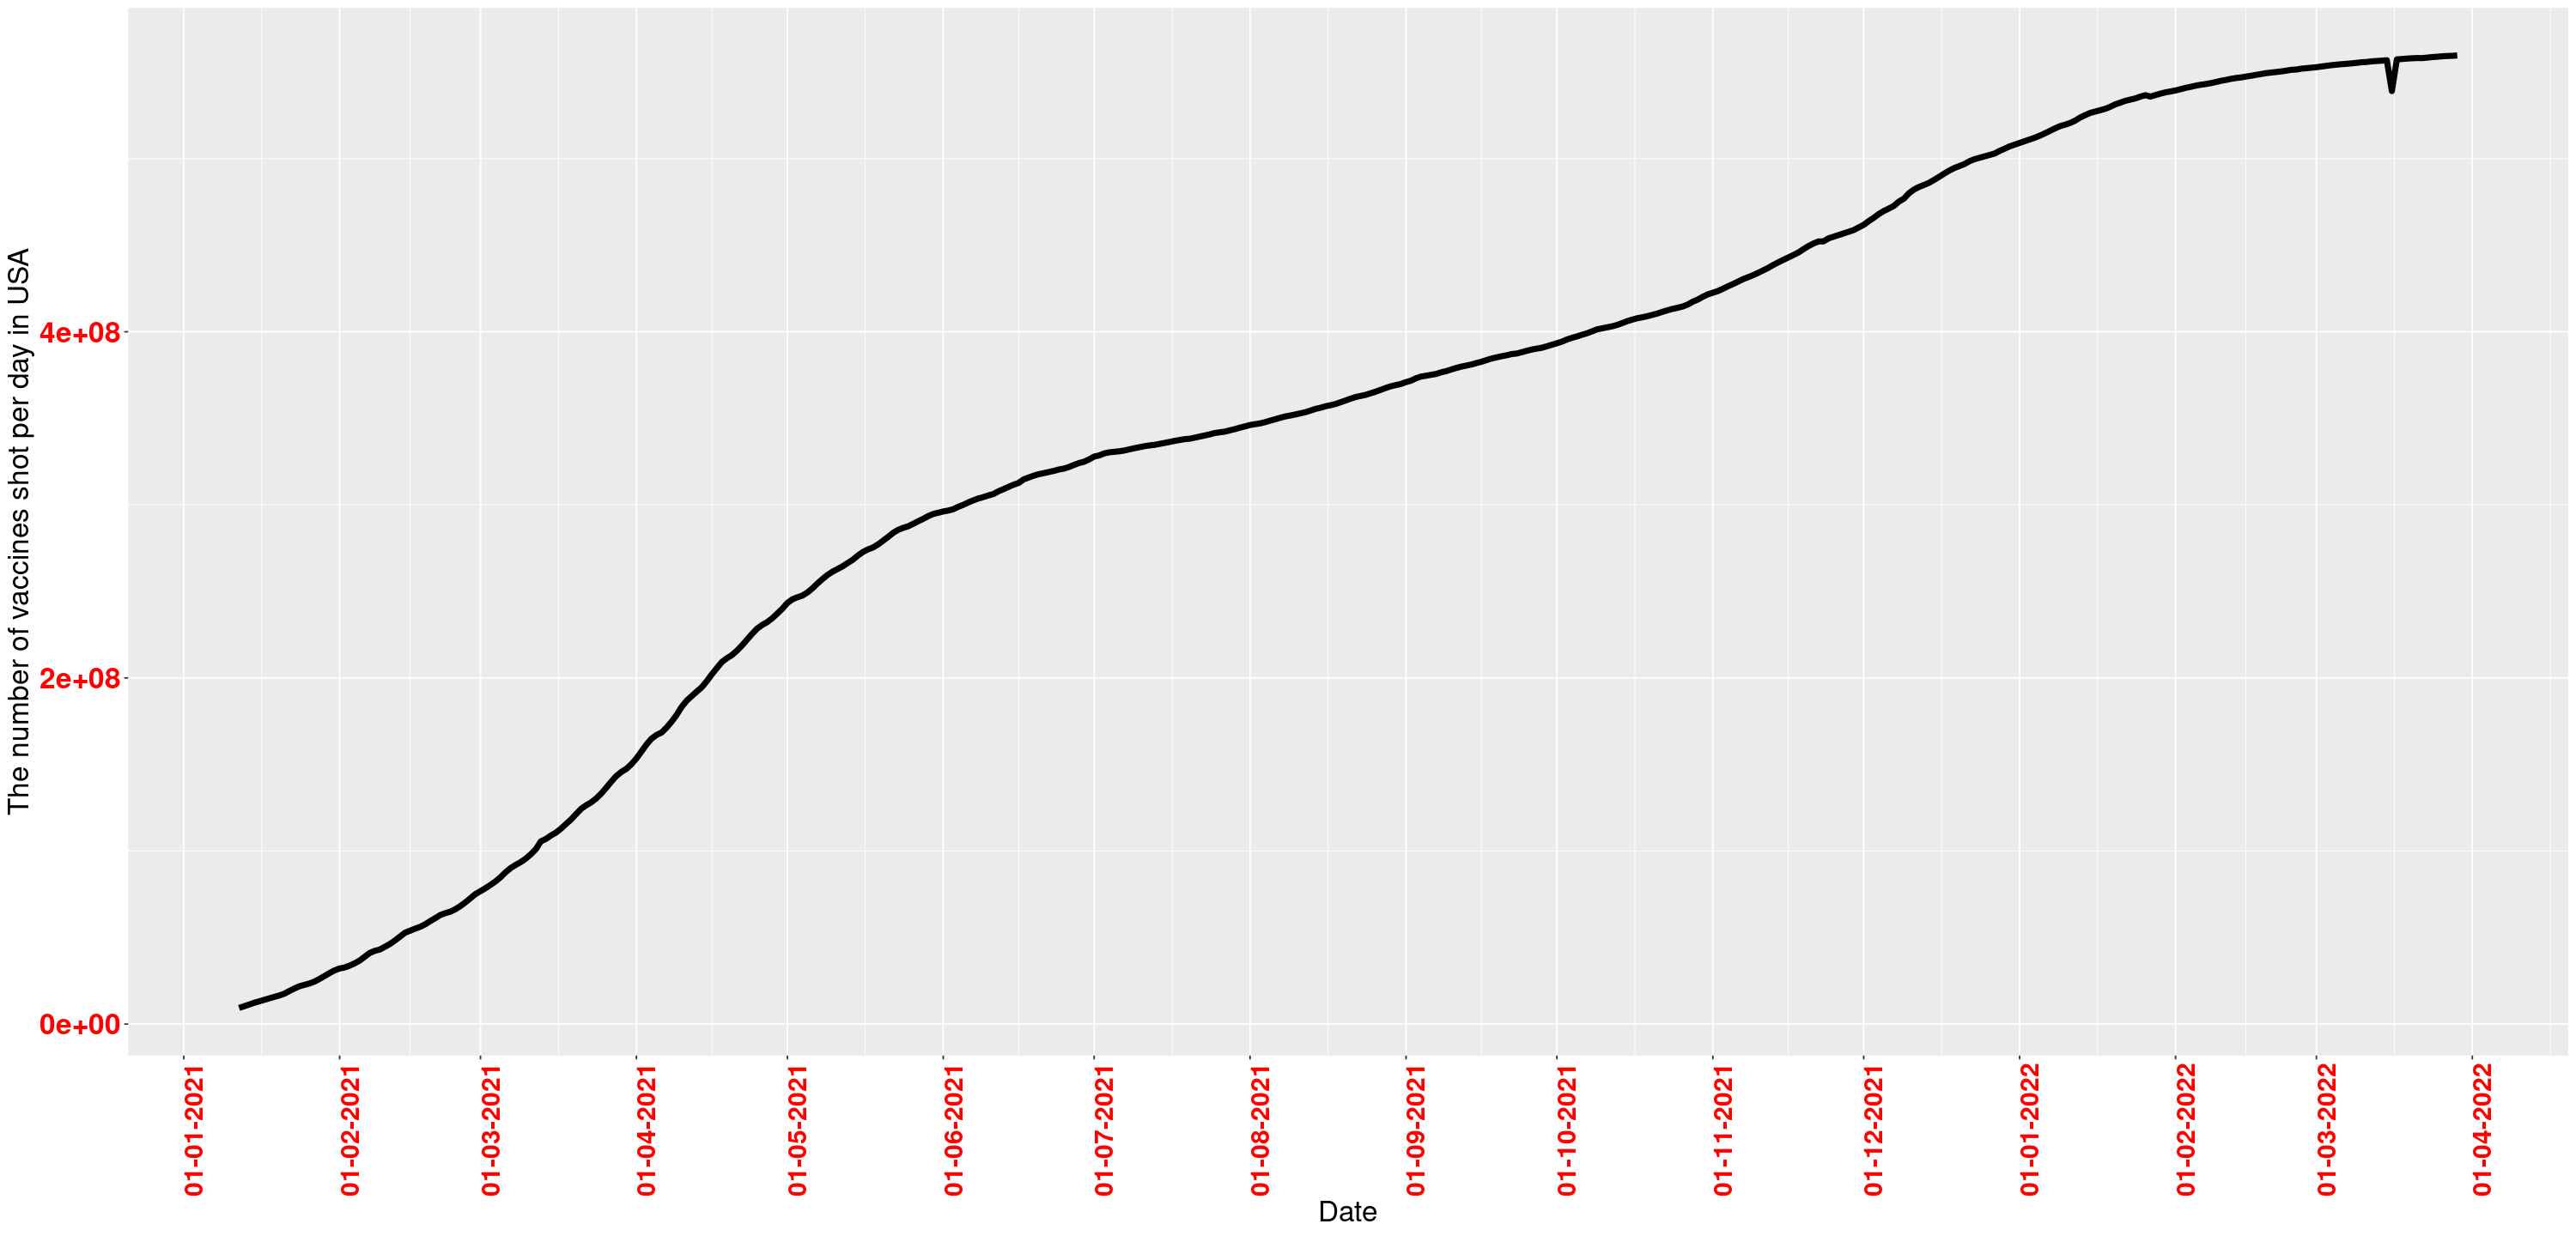

In [41]:
vm_USA_daily <- vm_USA %>%
  group_by(date) %>%
  summarise(
    sum = sum(total_vaccinations)
  )
head(vm_USA_daily)

ggplot(vm_USA_daily, aes(x = date, y = sum, group = 1))+geom_line(size=2)+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20))+
labs(x = "Date",y = "The number of vaccines shot per day in USA")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("month"))


### • The file vaccinations.csv, (https://github.com/owid/covid-19-data/blob/master/public/ data/vaccinations/vaccinations.csv) contains country-by-country data on global COVID-19 vaccinations. The dataset includes some subnational locations (England, Northern Ireland, Scot- land, Wales, . . .) and international aggregates (World, continents, European Union ldots). They can be identified by their iso code that starts with OWID


#### 1 selecting all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date

In [42]:
vaccinations <- read.csv("vaccinations.csv")
vaccinations_by_euro <- vaccinations %>% filter(iso_code %in% c('OWID_EUN'))
head(vaccinations_by_euro)

location       iso_code date       total_vaccinations people_vaccinated
1 European Union OWID_EUN 2020-12-04 1                  1                
2 European Union OWID_EUN 2020-12-05 1                  1                
3 European Union OWID_EUN 2020-12-06 1                  1                
4 European Union OWID_EUN 2020-12-07 2                  2                
5 European Union OWID_EUN 2020-12-08 3                  3                
6 European Union OWID_EUN 2020-12-09 4                  4                
  people_fully_vaccinated total_boosters daily_vaccinations_raw
1 NA                      NA             0                     
2 NA                      NA             0                     
3 NA                      NA             0                     
4 NA                      NA             0                     
5 NA                      NA             0                     
6 NA                      NA             0                     
  daily_vaccinations total_vaccinations_per_hundred
1 0                  0                             
2 0                  0                             
3 0                  0                             
4 0                  0                             
5 0                  0                             
6 0                  0                             
  people_vaccinated_per_hundred people_fully_vaccinated_per_hundred
1 0                             NA                                 
2 0                             NA                                 
3 0                             NA                                 
4 0                             NA                                 
5 0                             NA                                 
6 0                             NA                                 
  total_boosters_per_hundred daily_vaccinations_per_million
1 NA                         0                             
2 NA                         0                             
3 NA                         0                             
4 NA                         0                             
5 NA                         0                             
6 NA                         0                             
  daily_people_vaccinated daily_people_vaccinated_per_hundred
1 0                       0                                  
2 0                       0                                  
3 0                       0                                  
4 0                       0                                  
5 0                       0                                  
6 0                       0

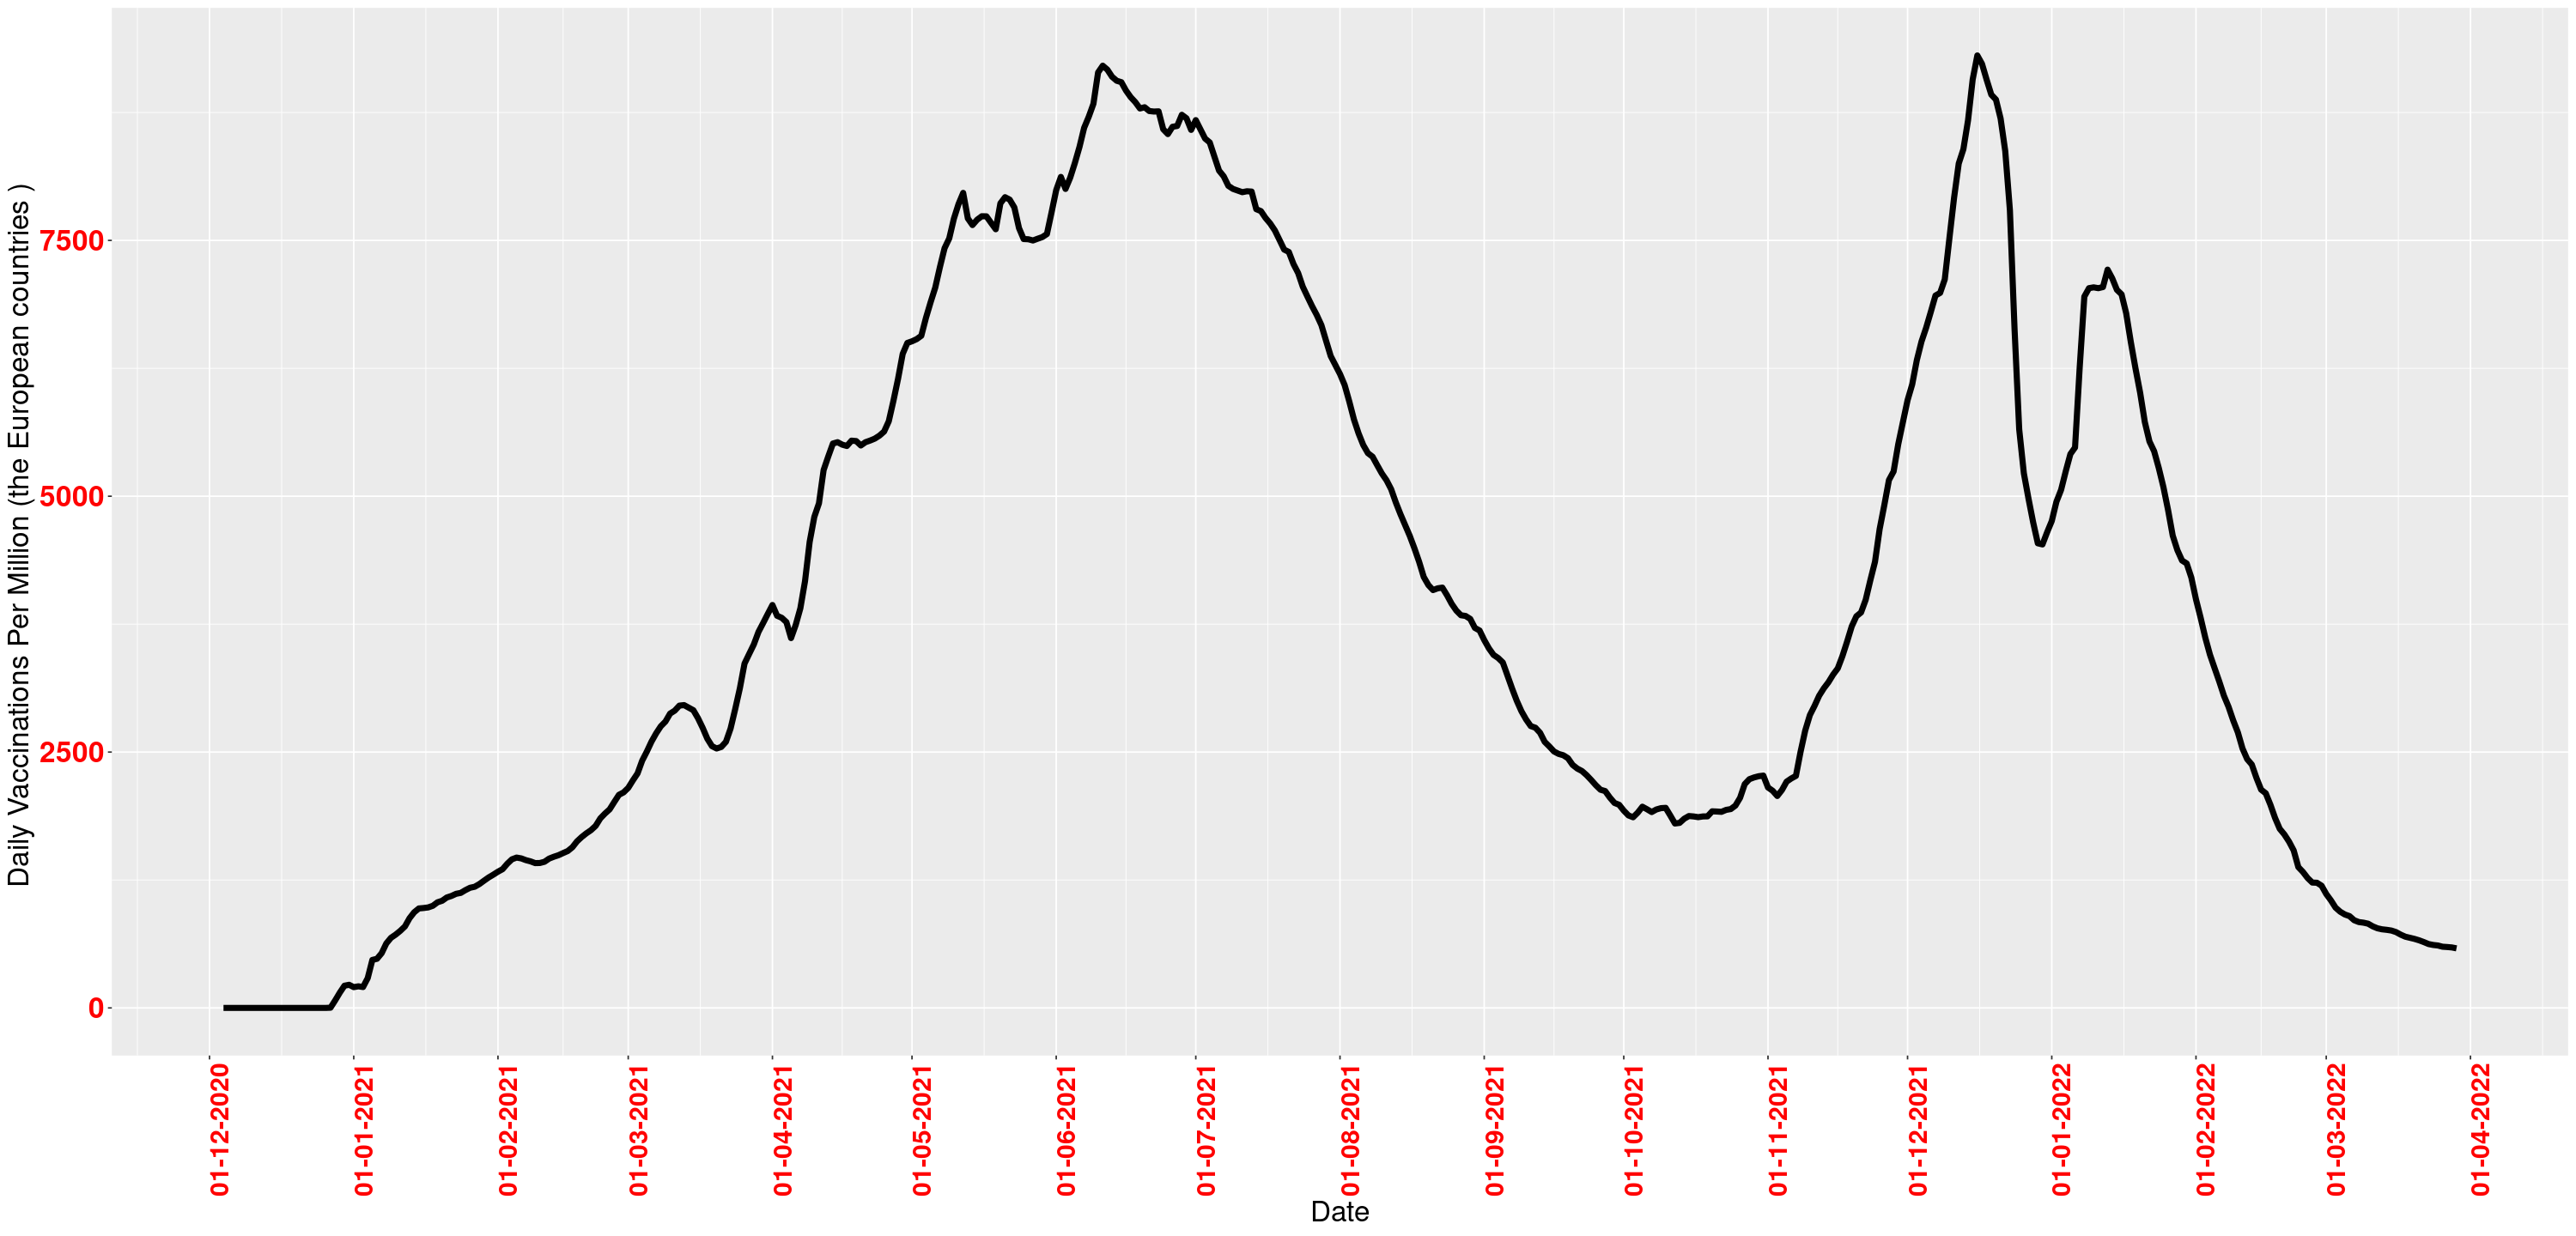

In [44]:
vaccinations_by_euro$date <- as.Date(vaccinations_by_euro$date) #convert to date to use break for better label_x

ggplot(vaccinations_by_euro, aes(x = date, y = daily_vaccinations_per_million,group = 1))+geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
      legend.text = element_text(size=25))+
labs(x = "Date",y = "Daily Vaccinations Per Million (the European countries ) ")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x

#### 2 study the data structure and produce few relevant plots of your taste

### 5 top countries -  (total_vaccinations, daily_vaccinations, people_fully_vaccinated, total_boosters)

In [43]:
cat("The number of location available in the file is:",nrow(vaccinations %>% count(location, sort = TRUE)))

The number of location available in the file is: 235

In [45]:
# finding the 5 top countries in vaccination

v_total <- vaccinations %>%
  group_by(location) %>%
  summarise(
    sum = sum(total_vaccinations) 
  )
v_total <- v_total %>% filter(!location %in% c('World','Asia','Upper middle income','Lower middle income','High income',
                                          'North America','European Union','Africa','South America','Europe')) # filter to have just countries

v_total[order(v_total$sum,decreasing = TRUE),c(1)][1:5,]

location     
1 United States
2 Germany      
3 France       
4 England      
5 Italy

Warning message:
“Removed 5 row(s) containing missing values (geom_path).”


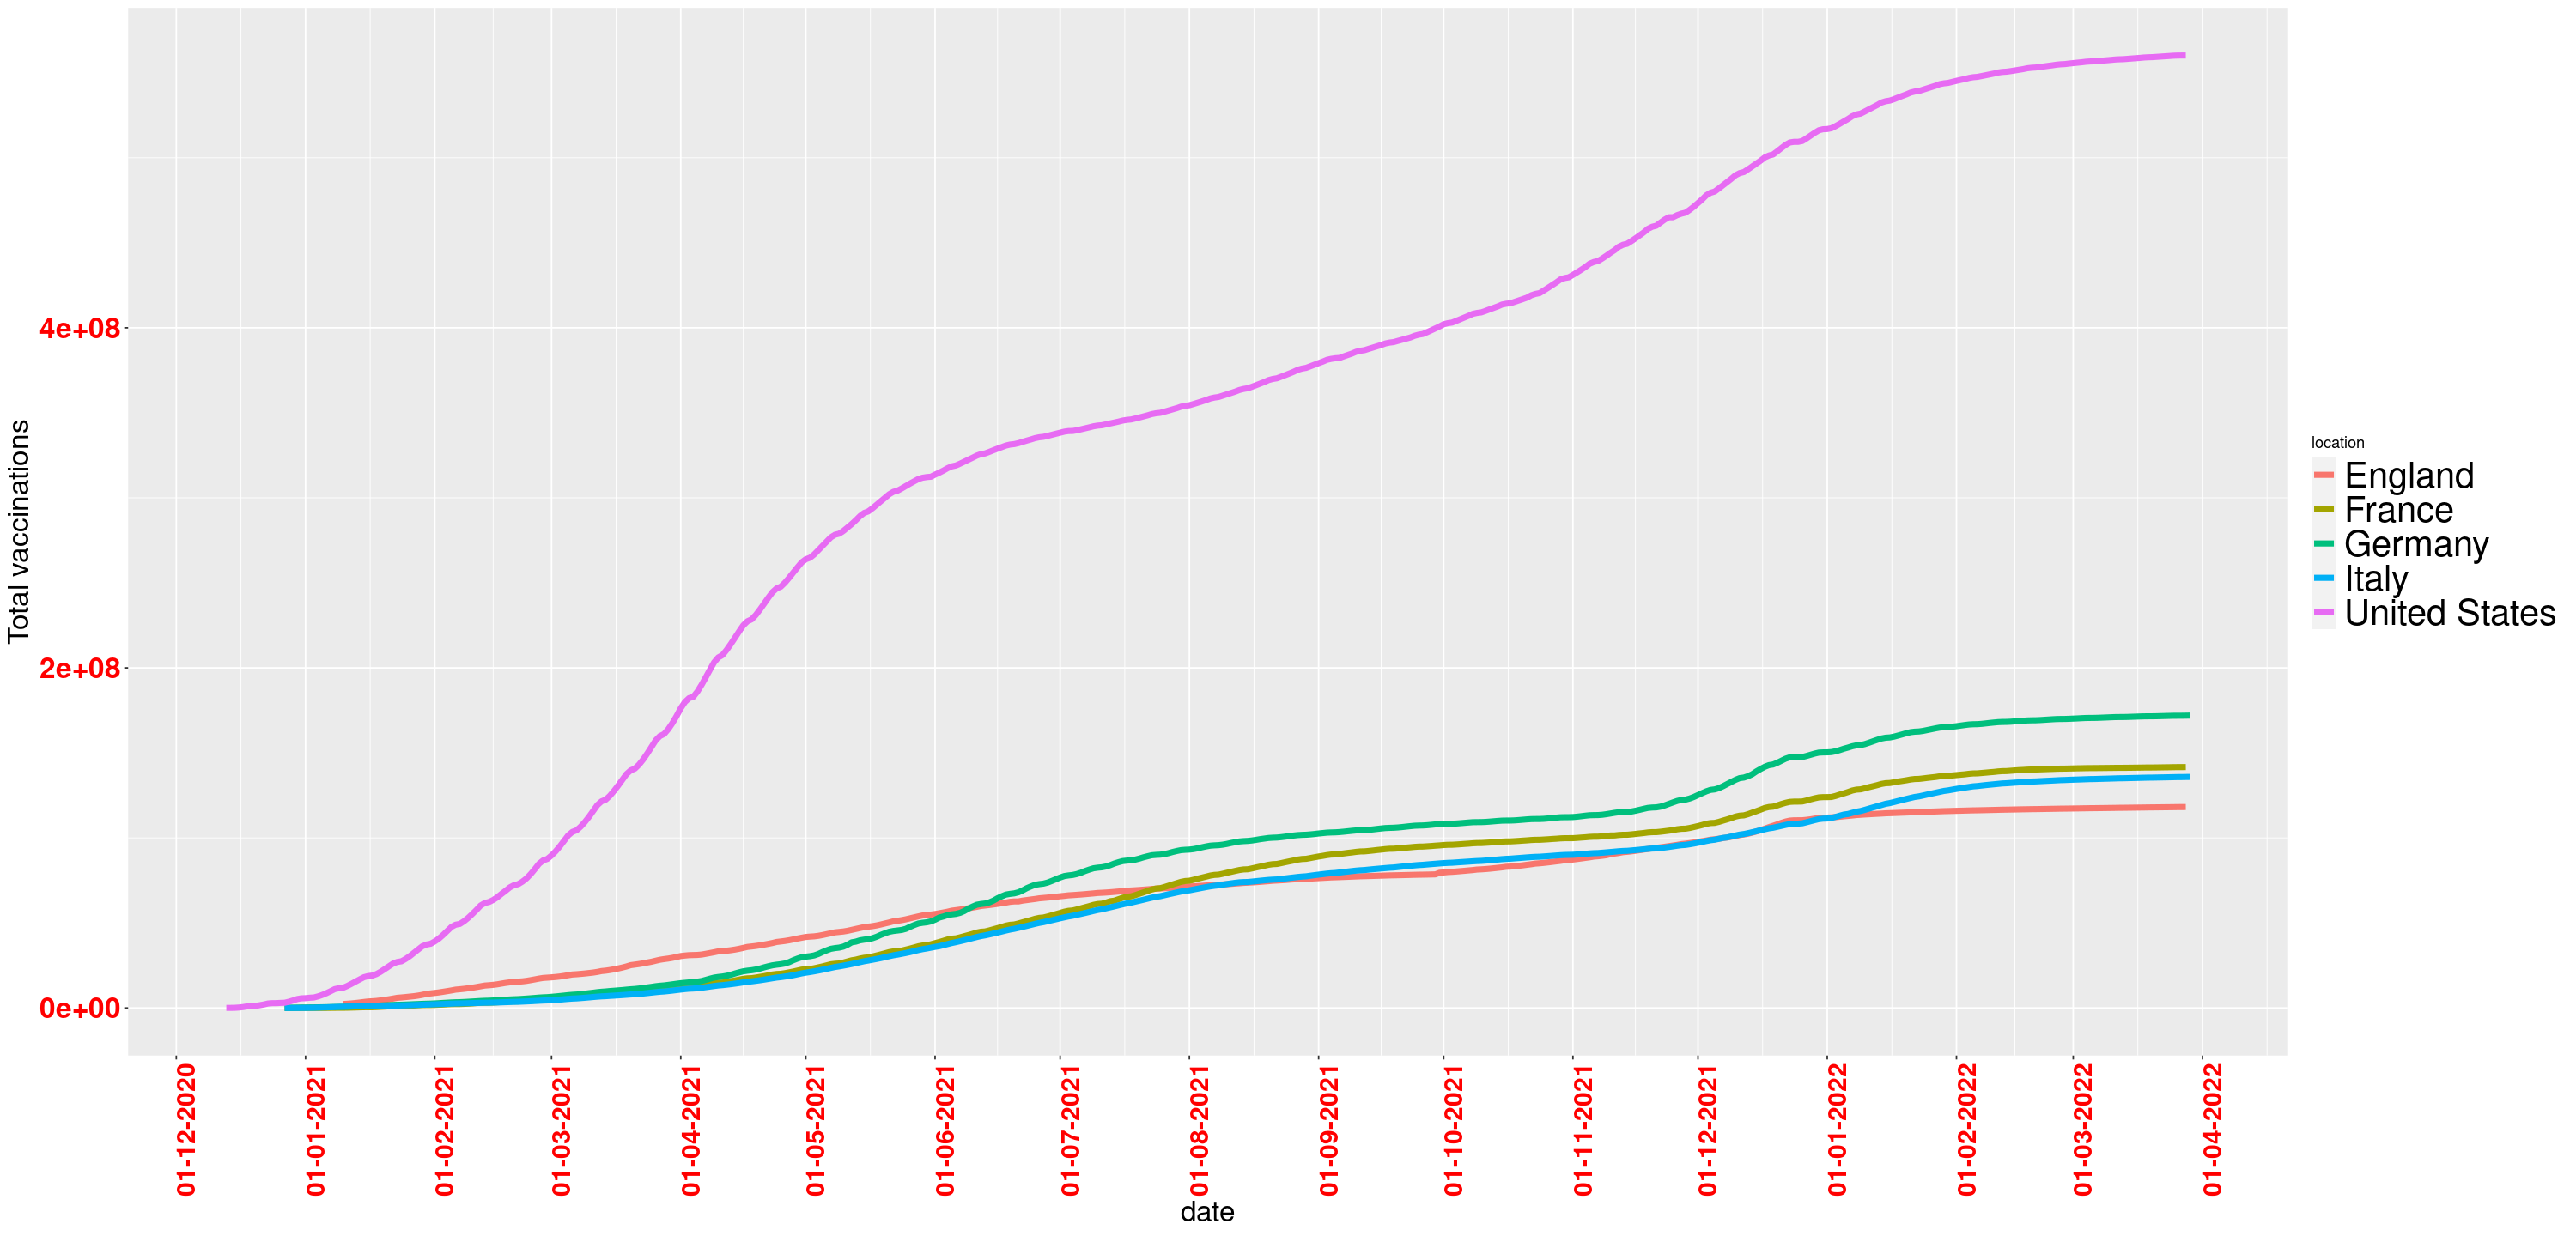

Warning message:
“Removed 14 row(s) containing missing values (geom_path).”


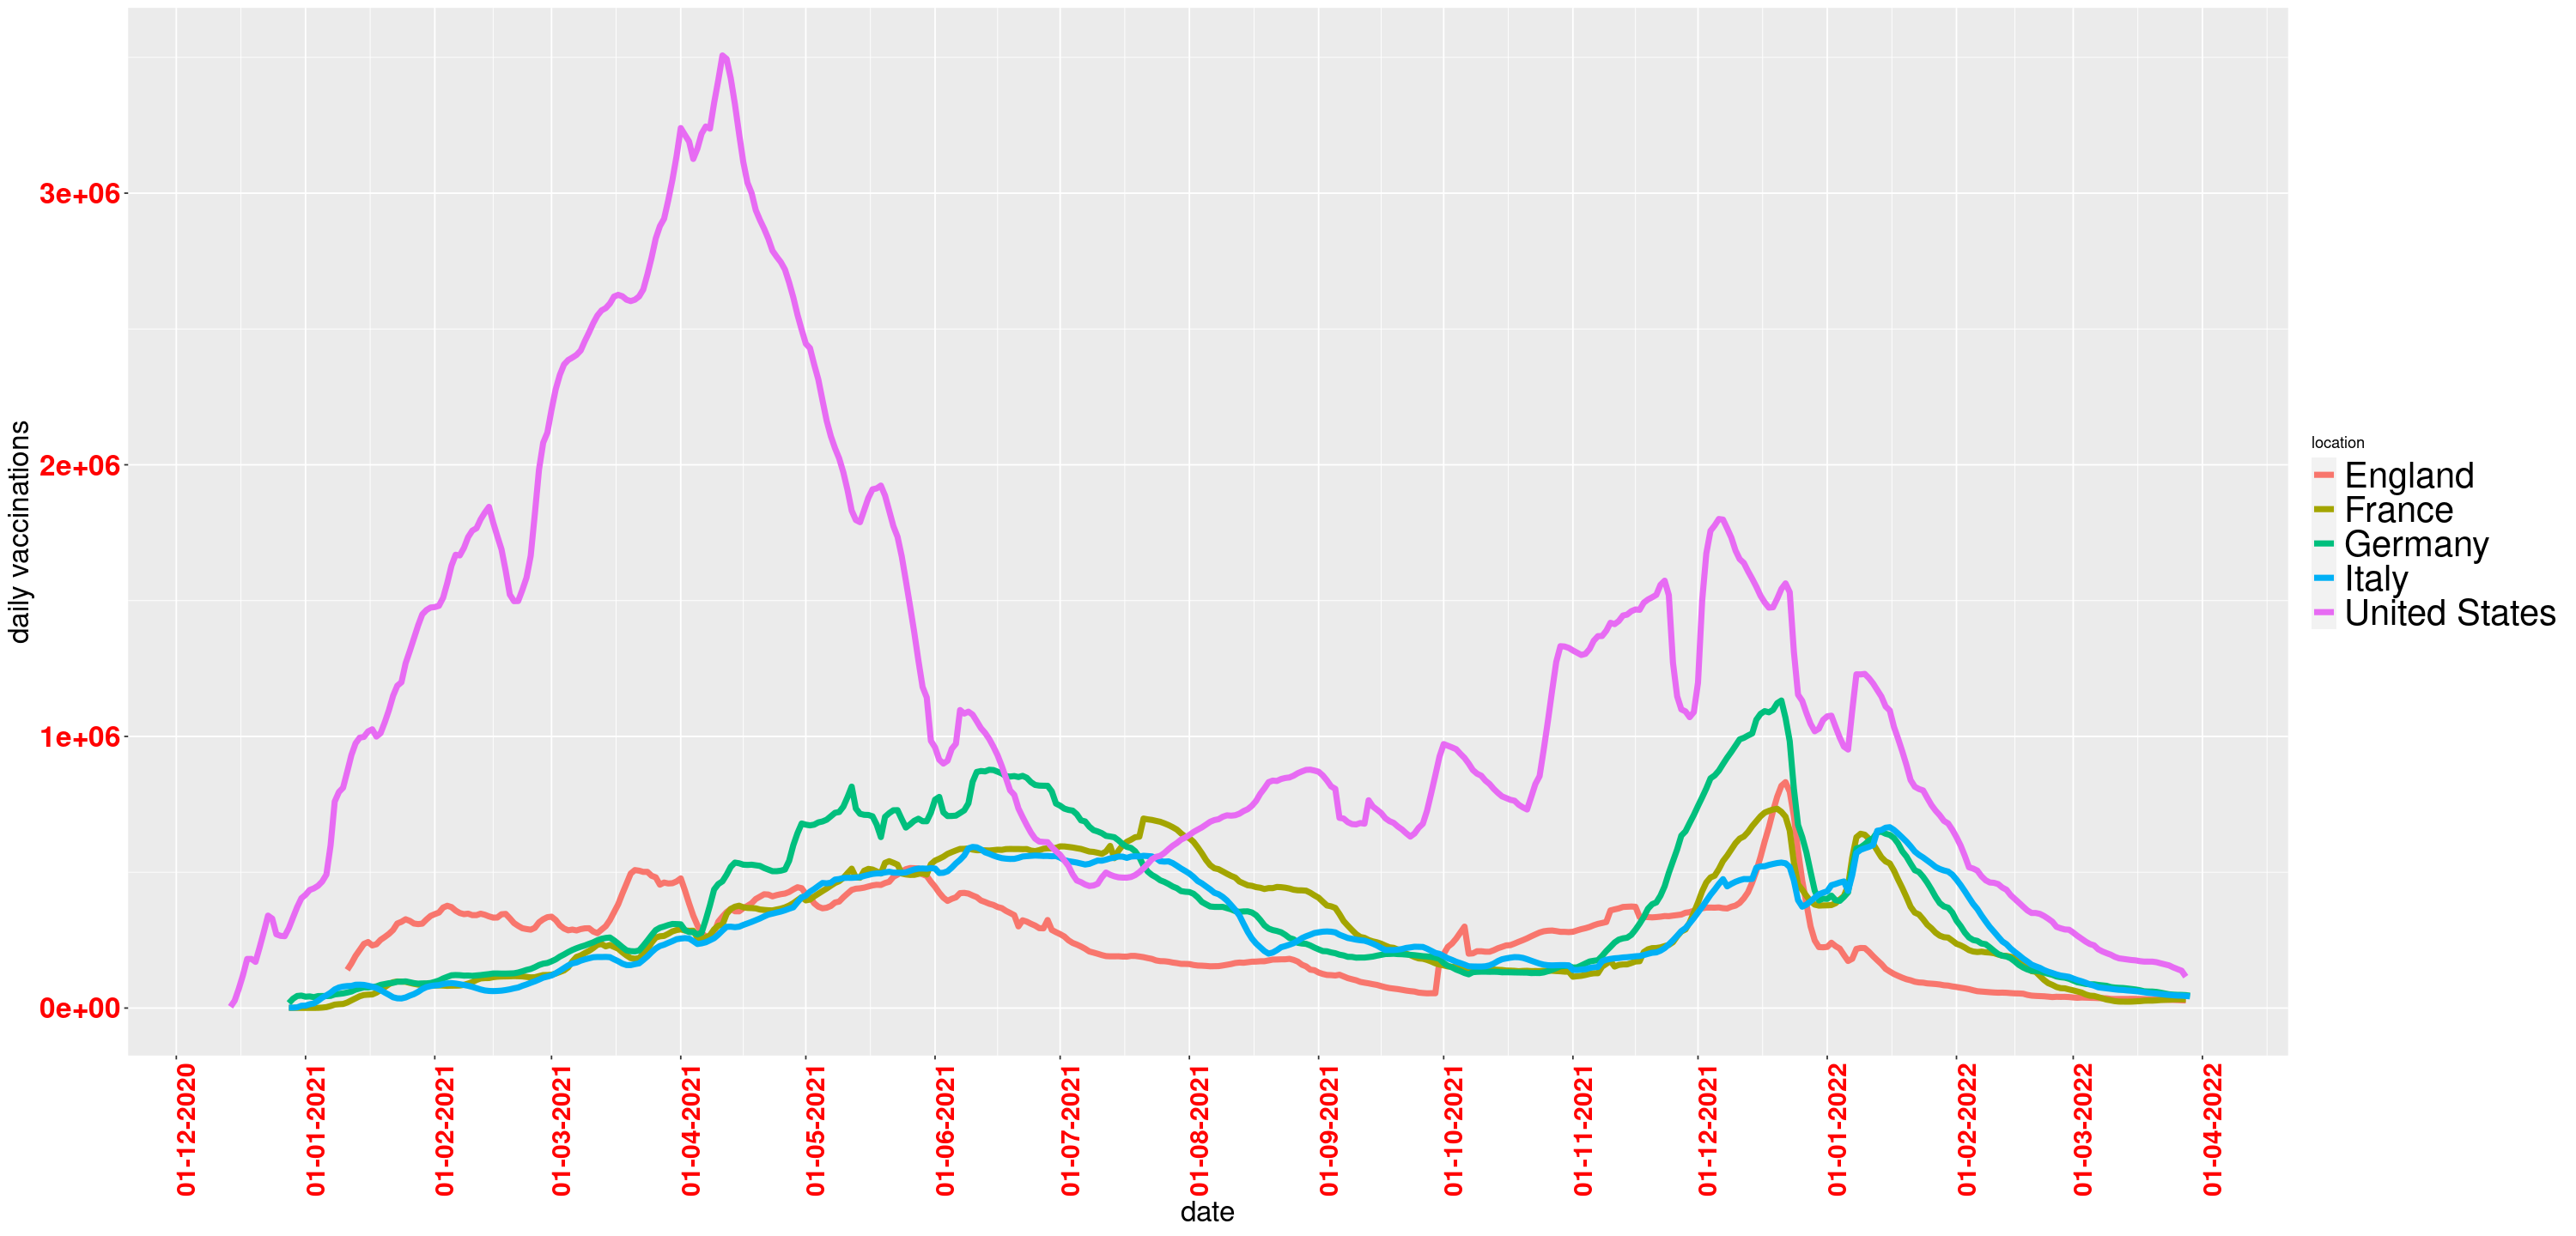

Warning message:
“Removed 798 row(s) containing missing values (geom_path).”


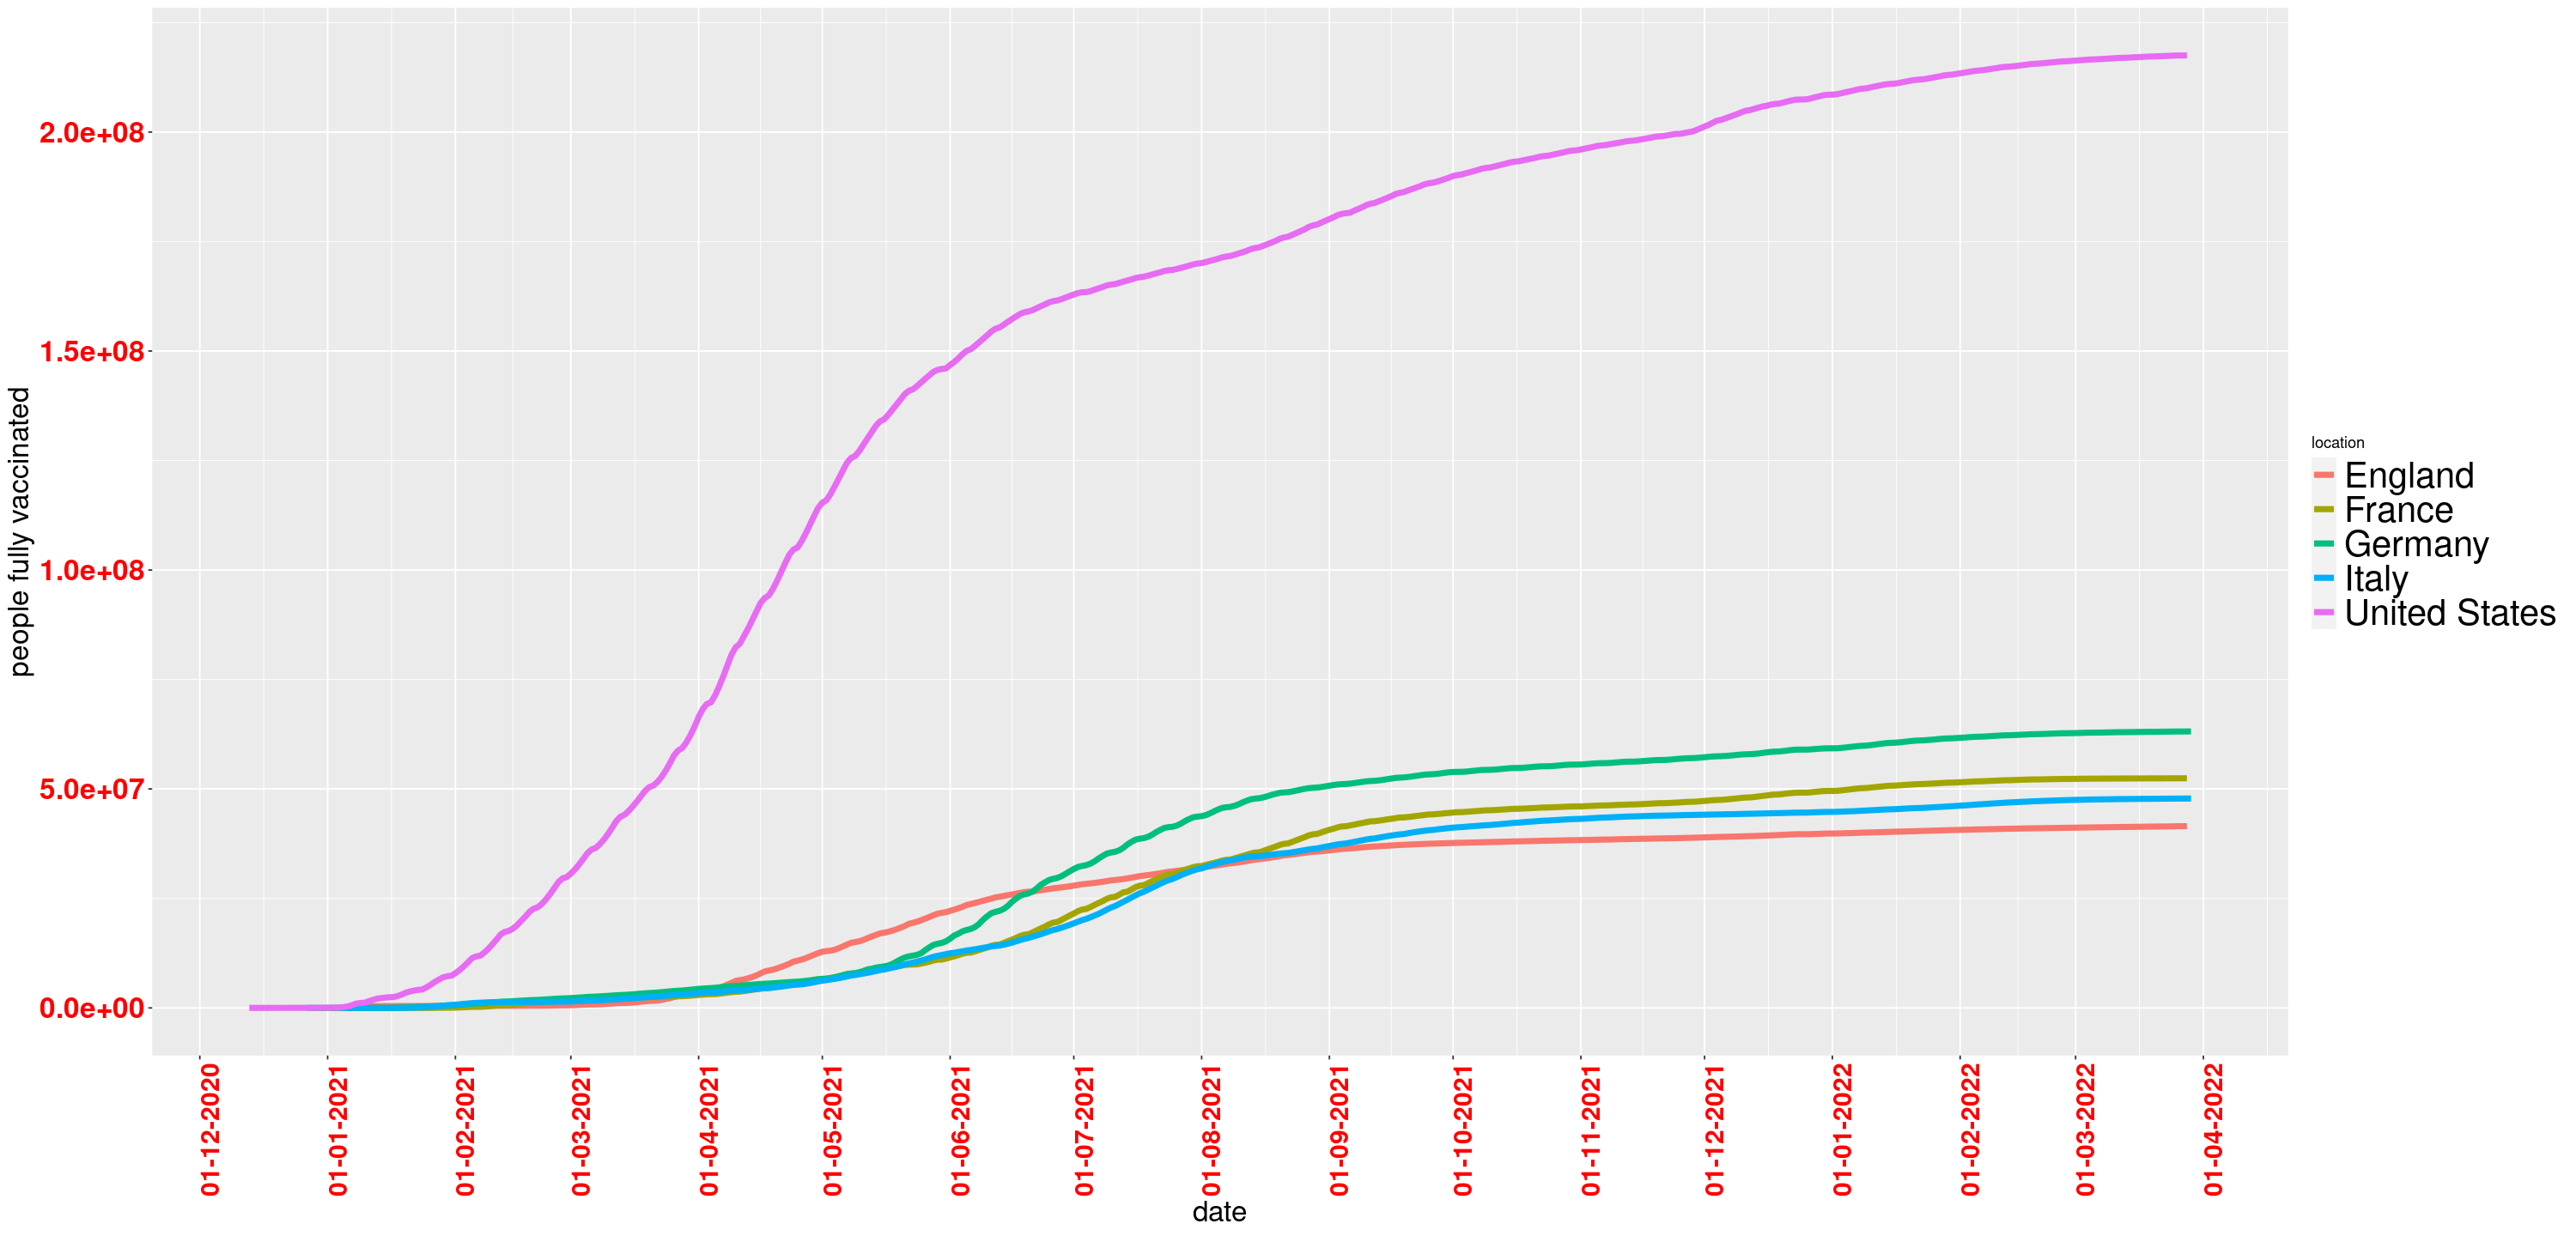

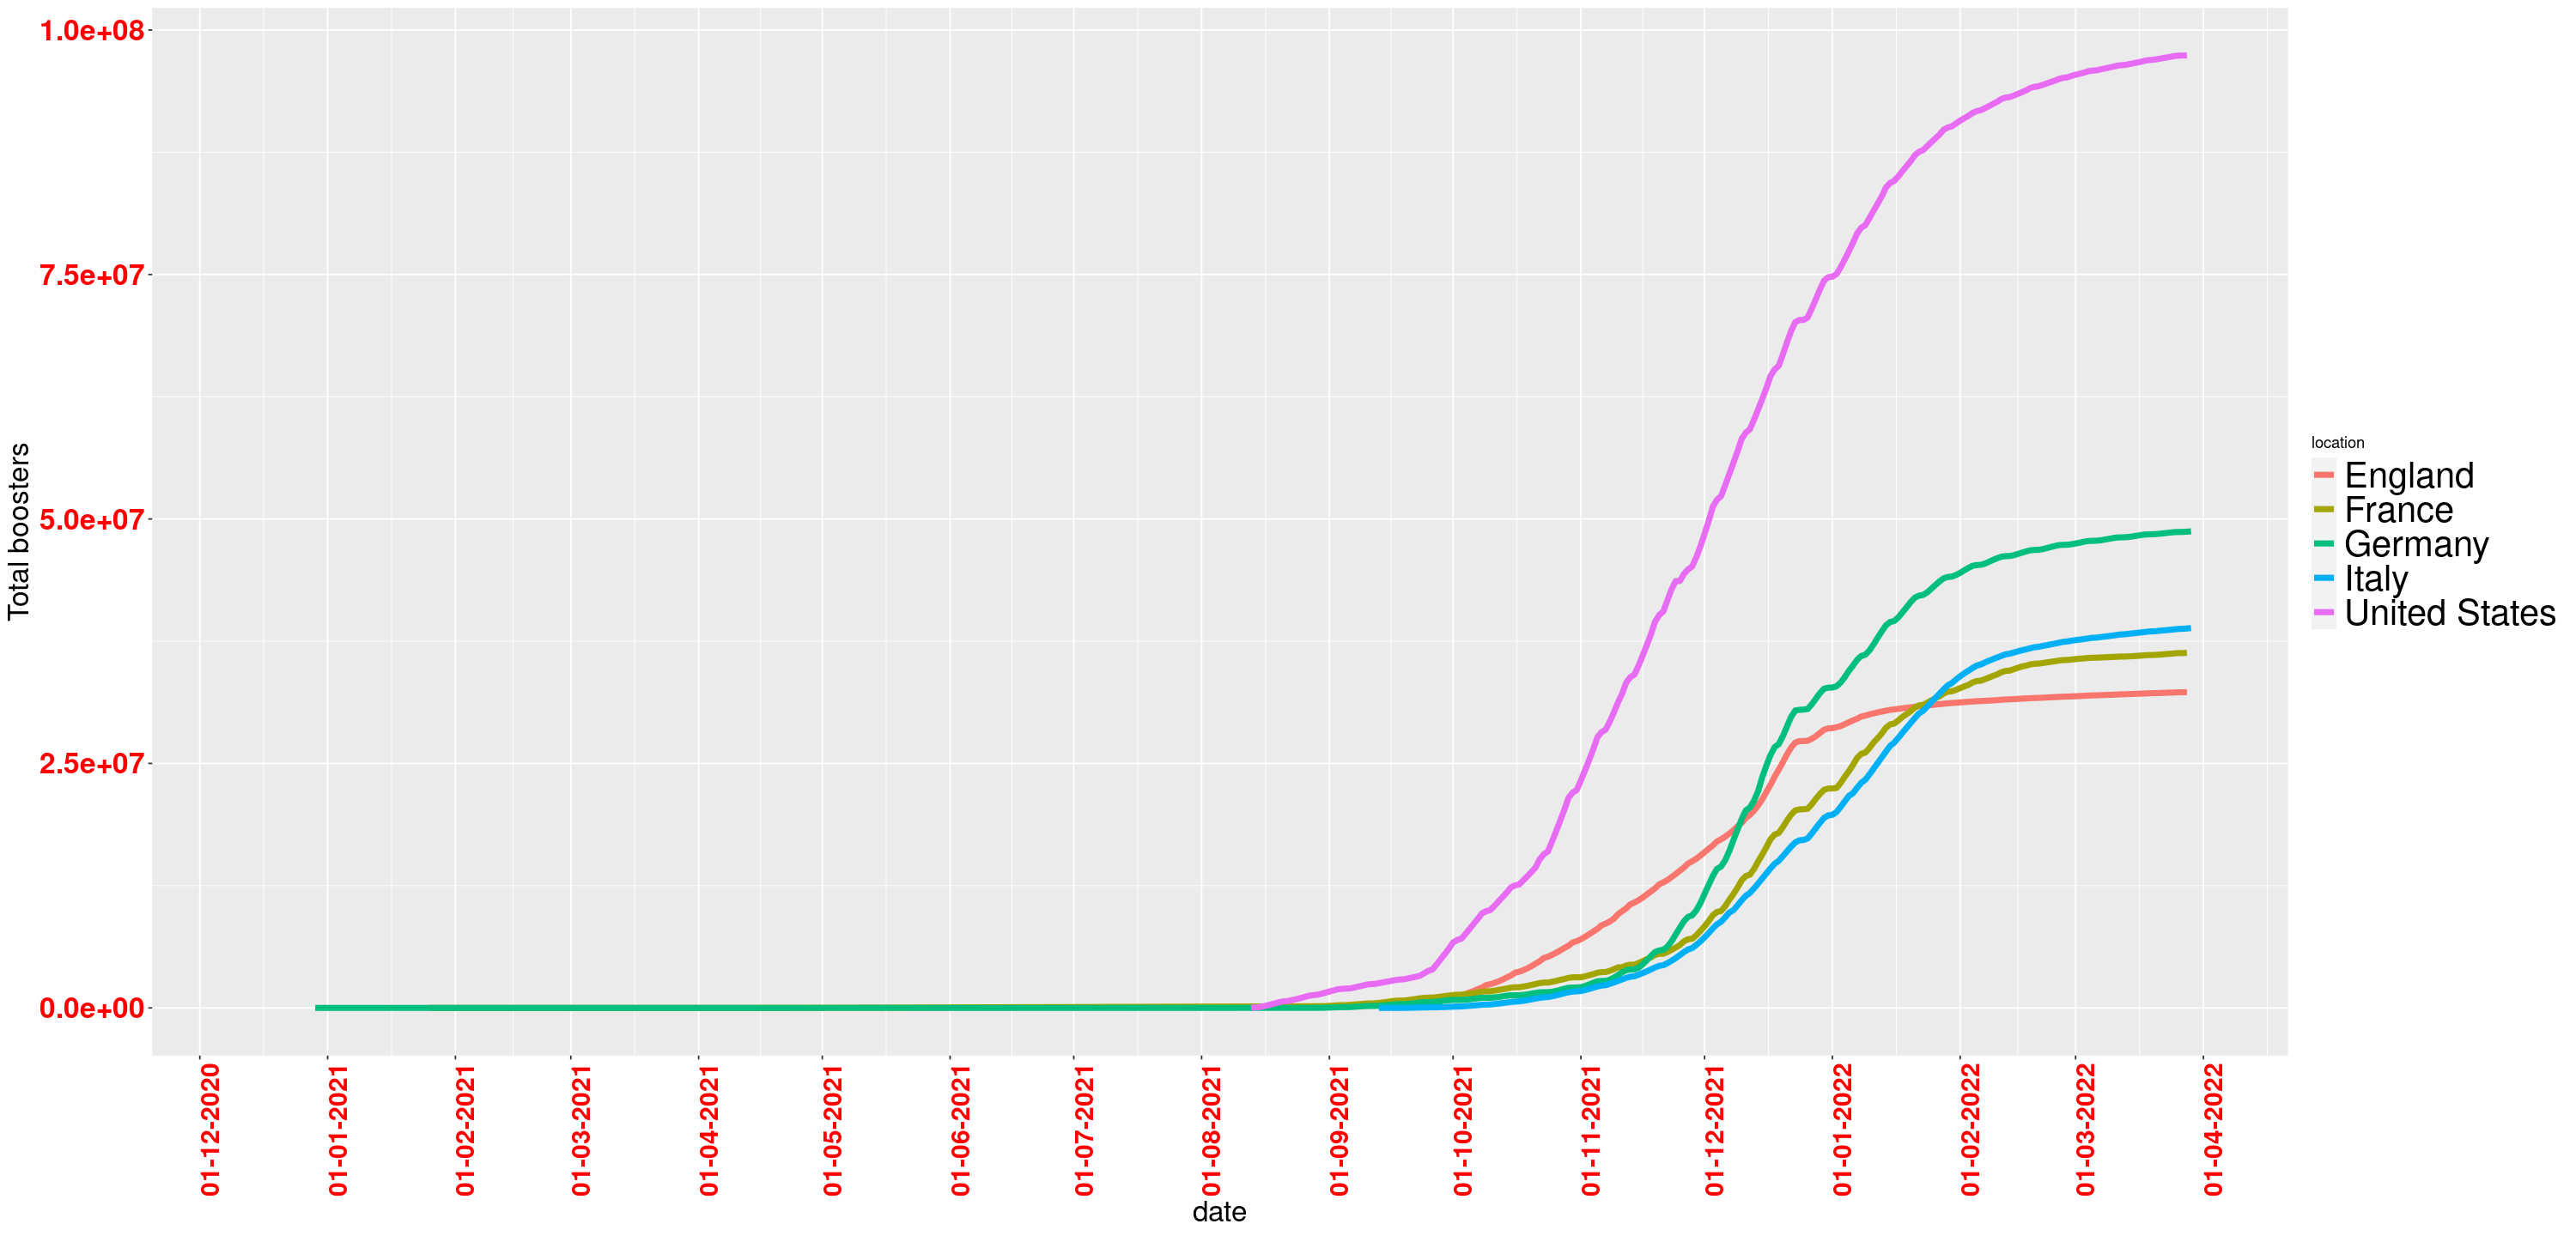

In [46]:
top_countries <- vaccinations %>% filter(location %in% c('United States','Germany','France','England','Italy'))

top_countries$date <- as.Date(top_countries$date) #convert to date to use break for better label_x

## total_vaccinations
ggplot(top_countries, aes(x = date, y = total_vaccinations,group = location, col = location))+ geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
      legend.text = element_text(size = 25))+
labs(x = "date",y = "Total vaccinations")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x

## daily_vaccinations
ggplot(top_countries, aes(x = date, y = daily_vaccinations,group = location, col = location))+ geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
      legend.text = element_text(size = 25))+
labs(x = "date",y = "daily vaccinations")+
scale_x_date(labels=date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x

## people_fully_vaccinated
ggplot(top_countries, aes(x = date, y = people_fully_vaccinated,group = location, col=location))+ geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size = 18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
      legend.text = element_text(size = 25))+
labs(x = "date",y = "people fully vaccinated")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x

## total_boosters
ggplot(top_countries, aes(x = date, y = total_boosters,group = location, col = location))+ geom_line(size = 2)+
theme(axis.text.x = element_text( angle = 90,size=18),axis.title = element_text(size = 20),
      axis.text = element_text(face = "bold", color = "red",size = 20),
      legend.text = element_text(size = 25))+
labs(x = "date",y = "Total boosters")+
scale_x_date(labels = date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x


### Iran - (daily vaccinations) & (total_vaccinations, people_fully_vaccinated, total_boosters, people_vaccinated)

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


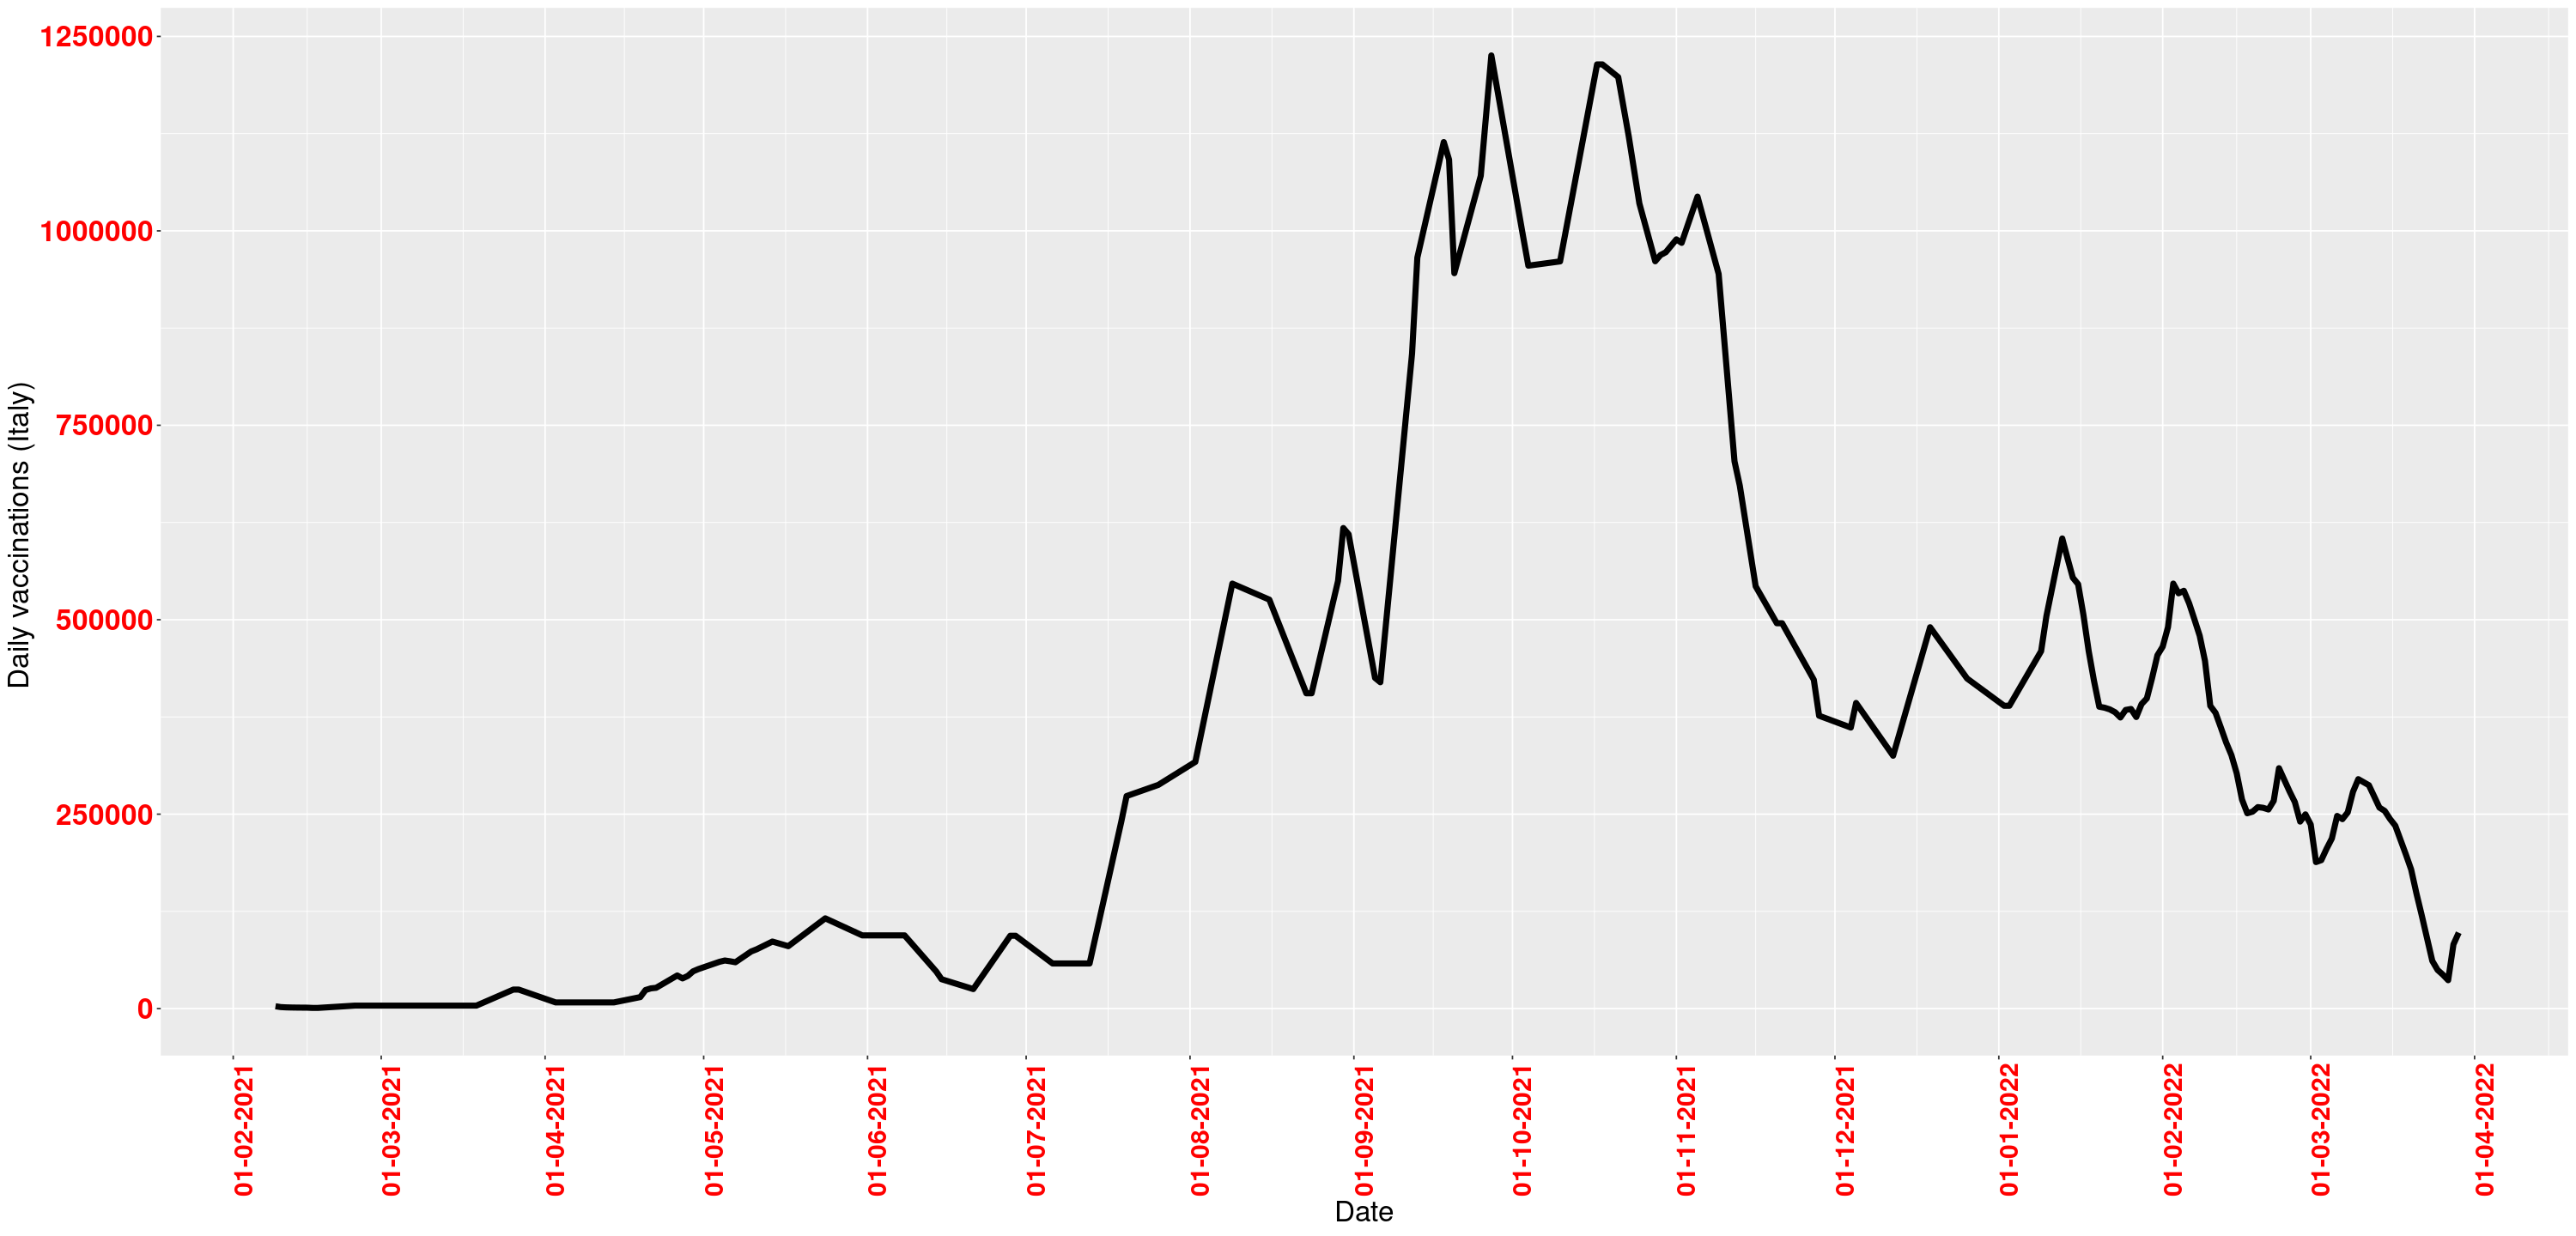

In [15]:
v_Ir<- vaccinations %>% filter(location %in% c('Iran'))

v_Ir$date <- as.Date(v_Ir$date) #convert to date to use break for better label_x

## plotting daily_vaccinations in Iran

ggplot(v_Ir, aes(x = date, y = daily_vaccinations,group = 1))+geom_line(size=2)+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.text=element_text(size=25))+
labs(x = "Date",y = "Daily vaccinations (Italy) ")+
scale_x_date(labels=date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x

Warning message:
“Removed 322 row(s) containing missing values (geom_path).”


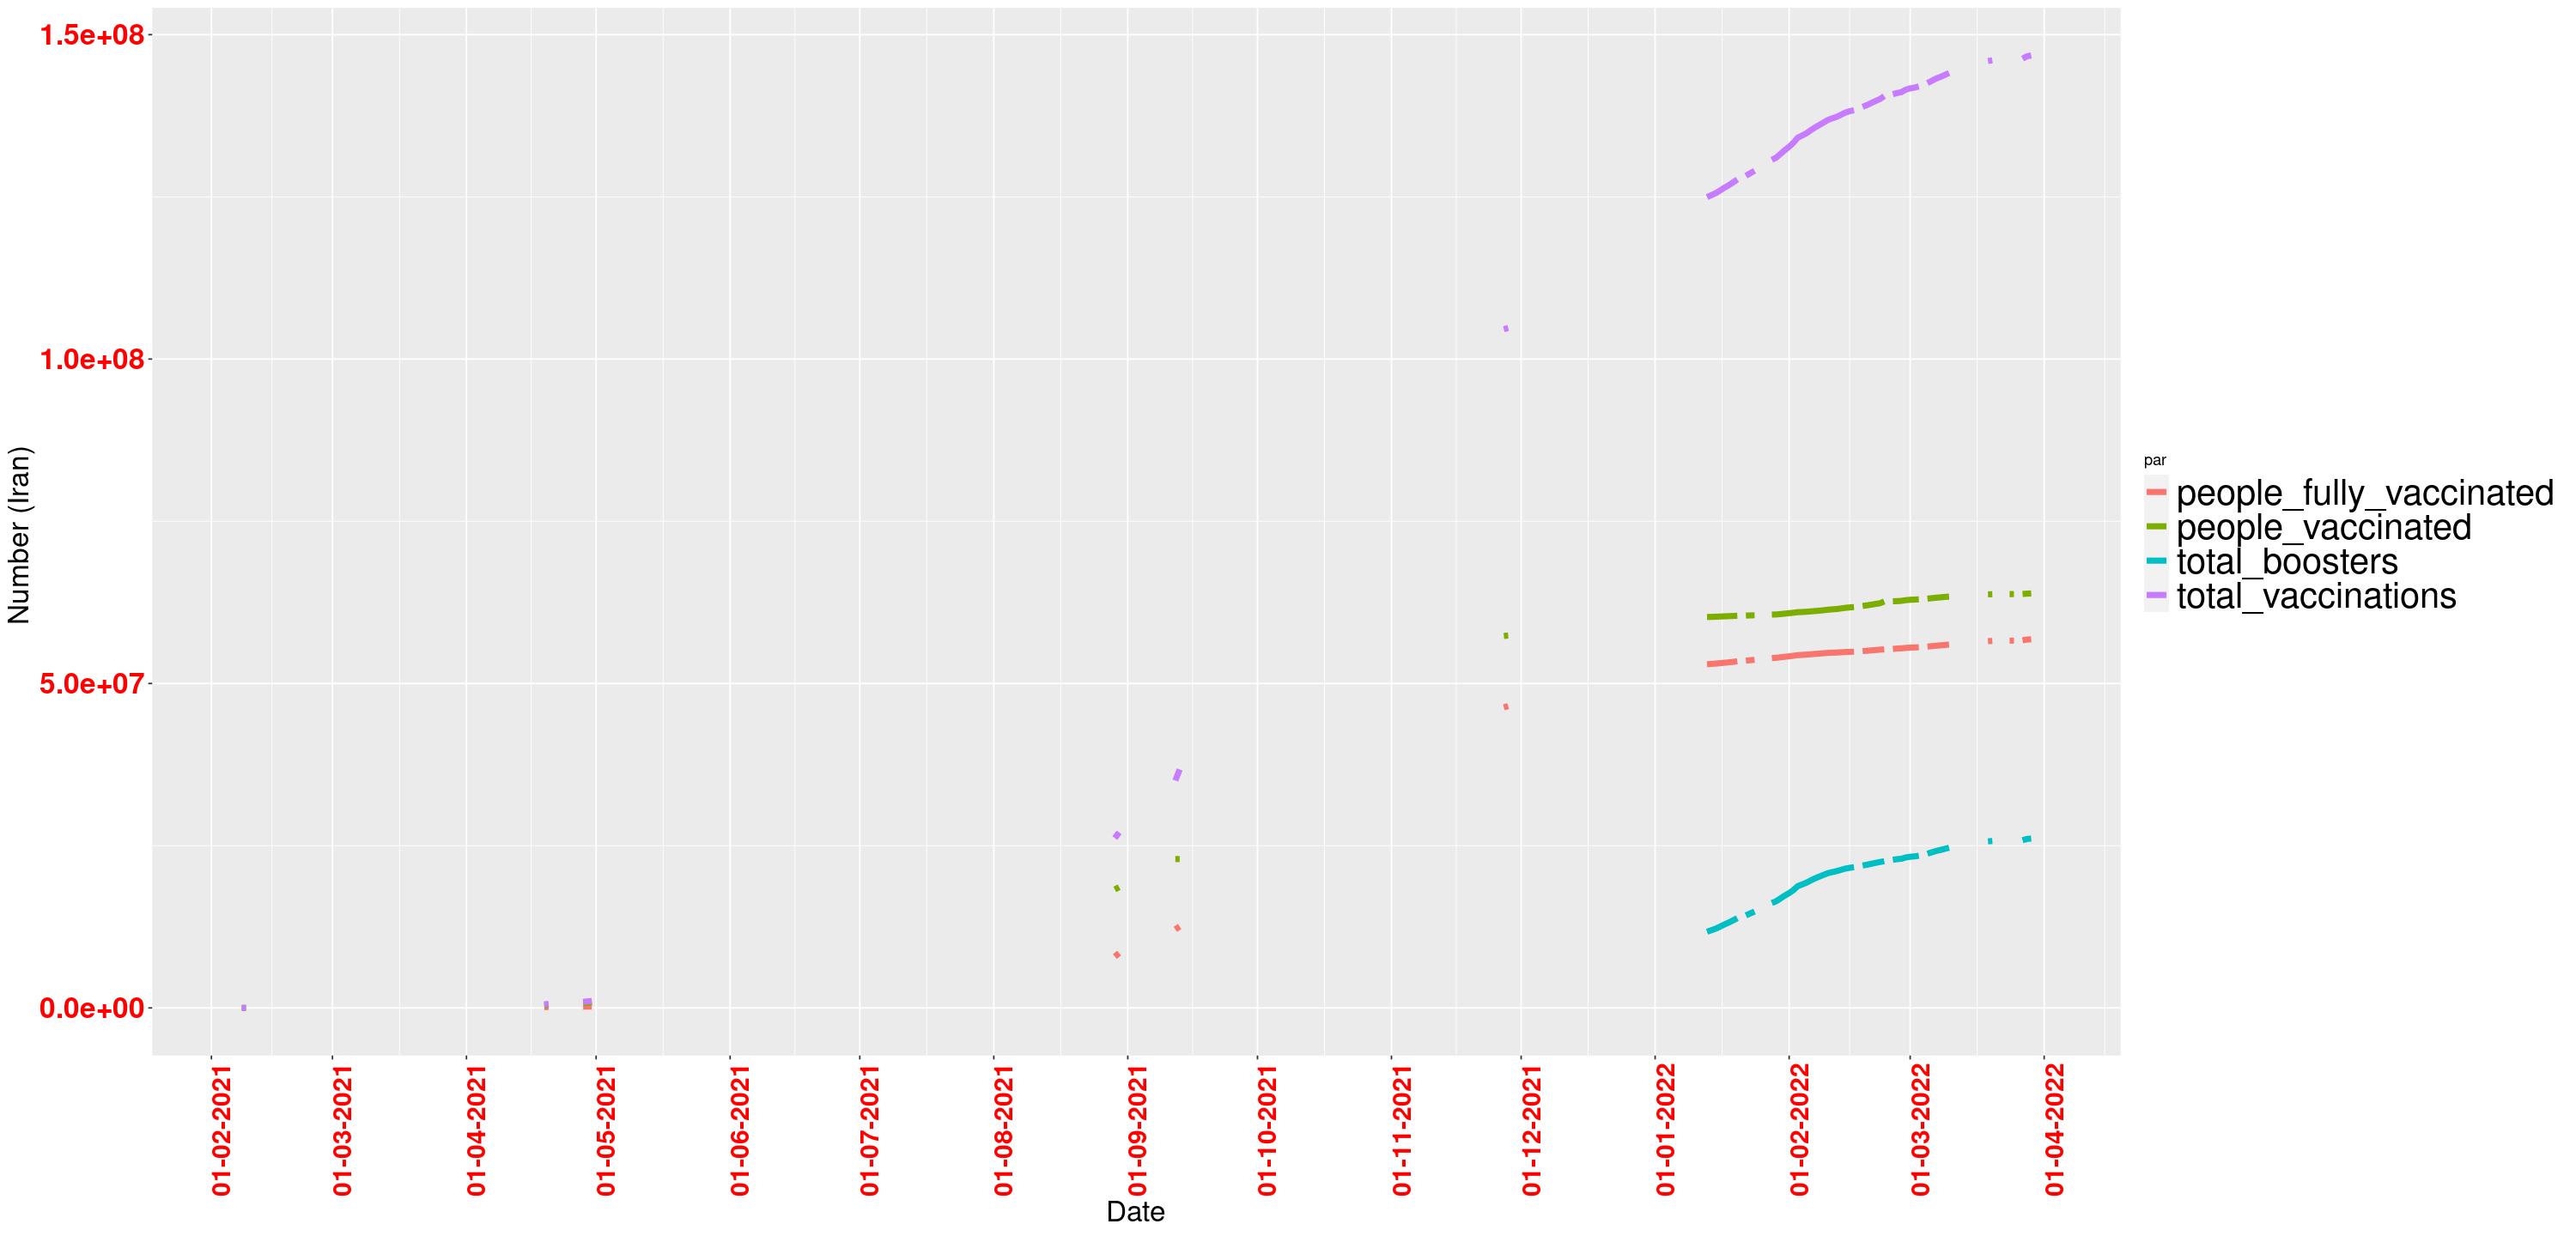

In [16]:
### using pivot_longer to can plot  total_vaccinations, people_fully_vaccinated, total_boosters, people_vaccinated
### with toghether


library(tidyr)
v_Ir_p<-v_Ir %>% select(date, total_vaccinations, people_fully_vaccinated, total_boosters, people_vaccinated) %>%
  pivot_longer(., cols = c(total_vaccinations, people_fully_vaccinated, total_boosters, people_vaccinated),
               names_to = "par", values_to = "number")

ggplot(v_Ir_p, aes(x = date, y = number,group = par, col=par))+geom_line(size=2)+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.text=element_text(size=25))+
labs(x = "Date", y = "Number (Iran) ")+
scale_x_date(labels=date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x


### Italy  - (daily vaccinations) & (total_vaccinations, people_fully_vaccinated, total_boosters, people_vaccinated)

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


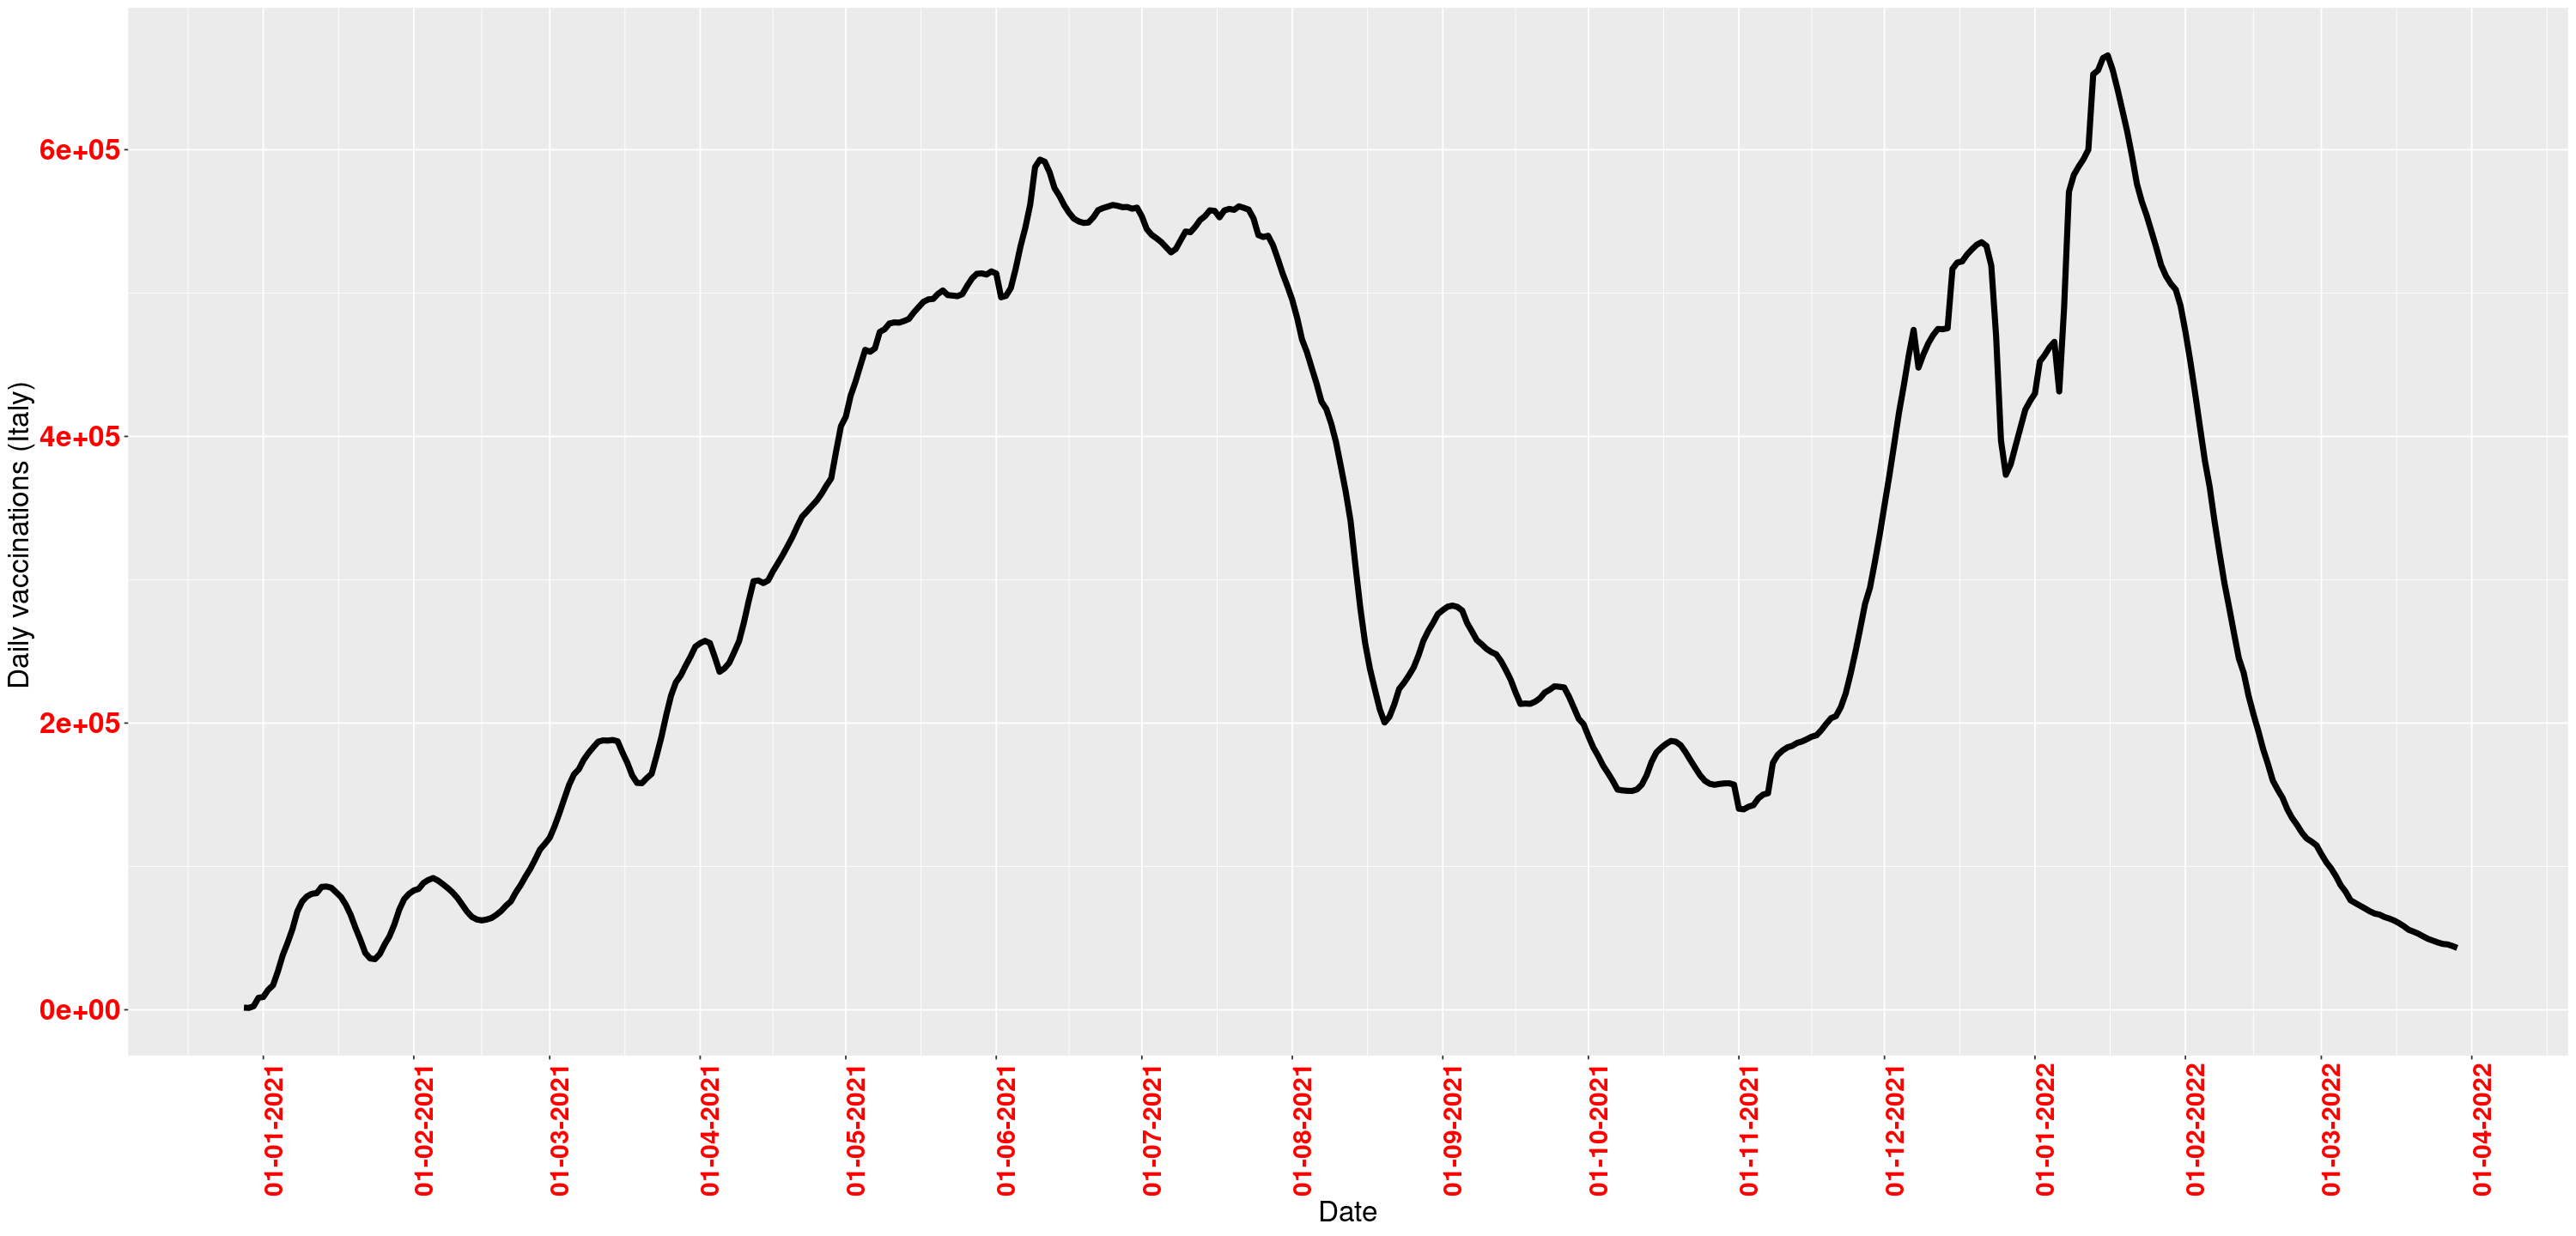

In [17]:
v_It<- vaccinations %>% filter(location %in% c('Italy'))

v_It$date <- as.Date(v_It$date) #convert to date to use break for better label_x

## plotting daily_vaccinations in Italy

ggplot(v_It, aes(x = date, y = daily_vaccinations,group = 1))+geom_line(size=2)+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.text=element_text(size=25))+
labs(x = "Date",y = "Daily vaccinations (Italy) ")+
scale_x_date(labels=date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x

# this data make sense about daily vaccination

Warning message:
“Removed 268 row(s) containing missing values (geom_path).”


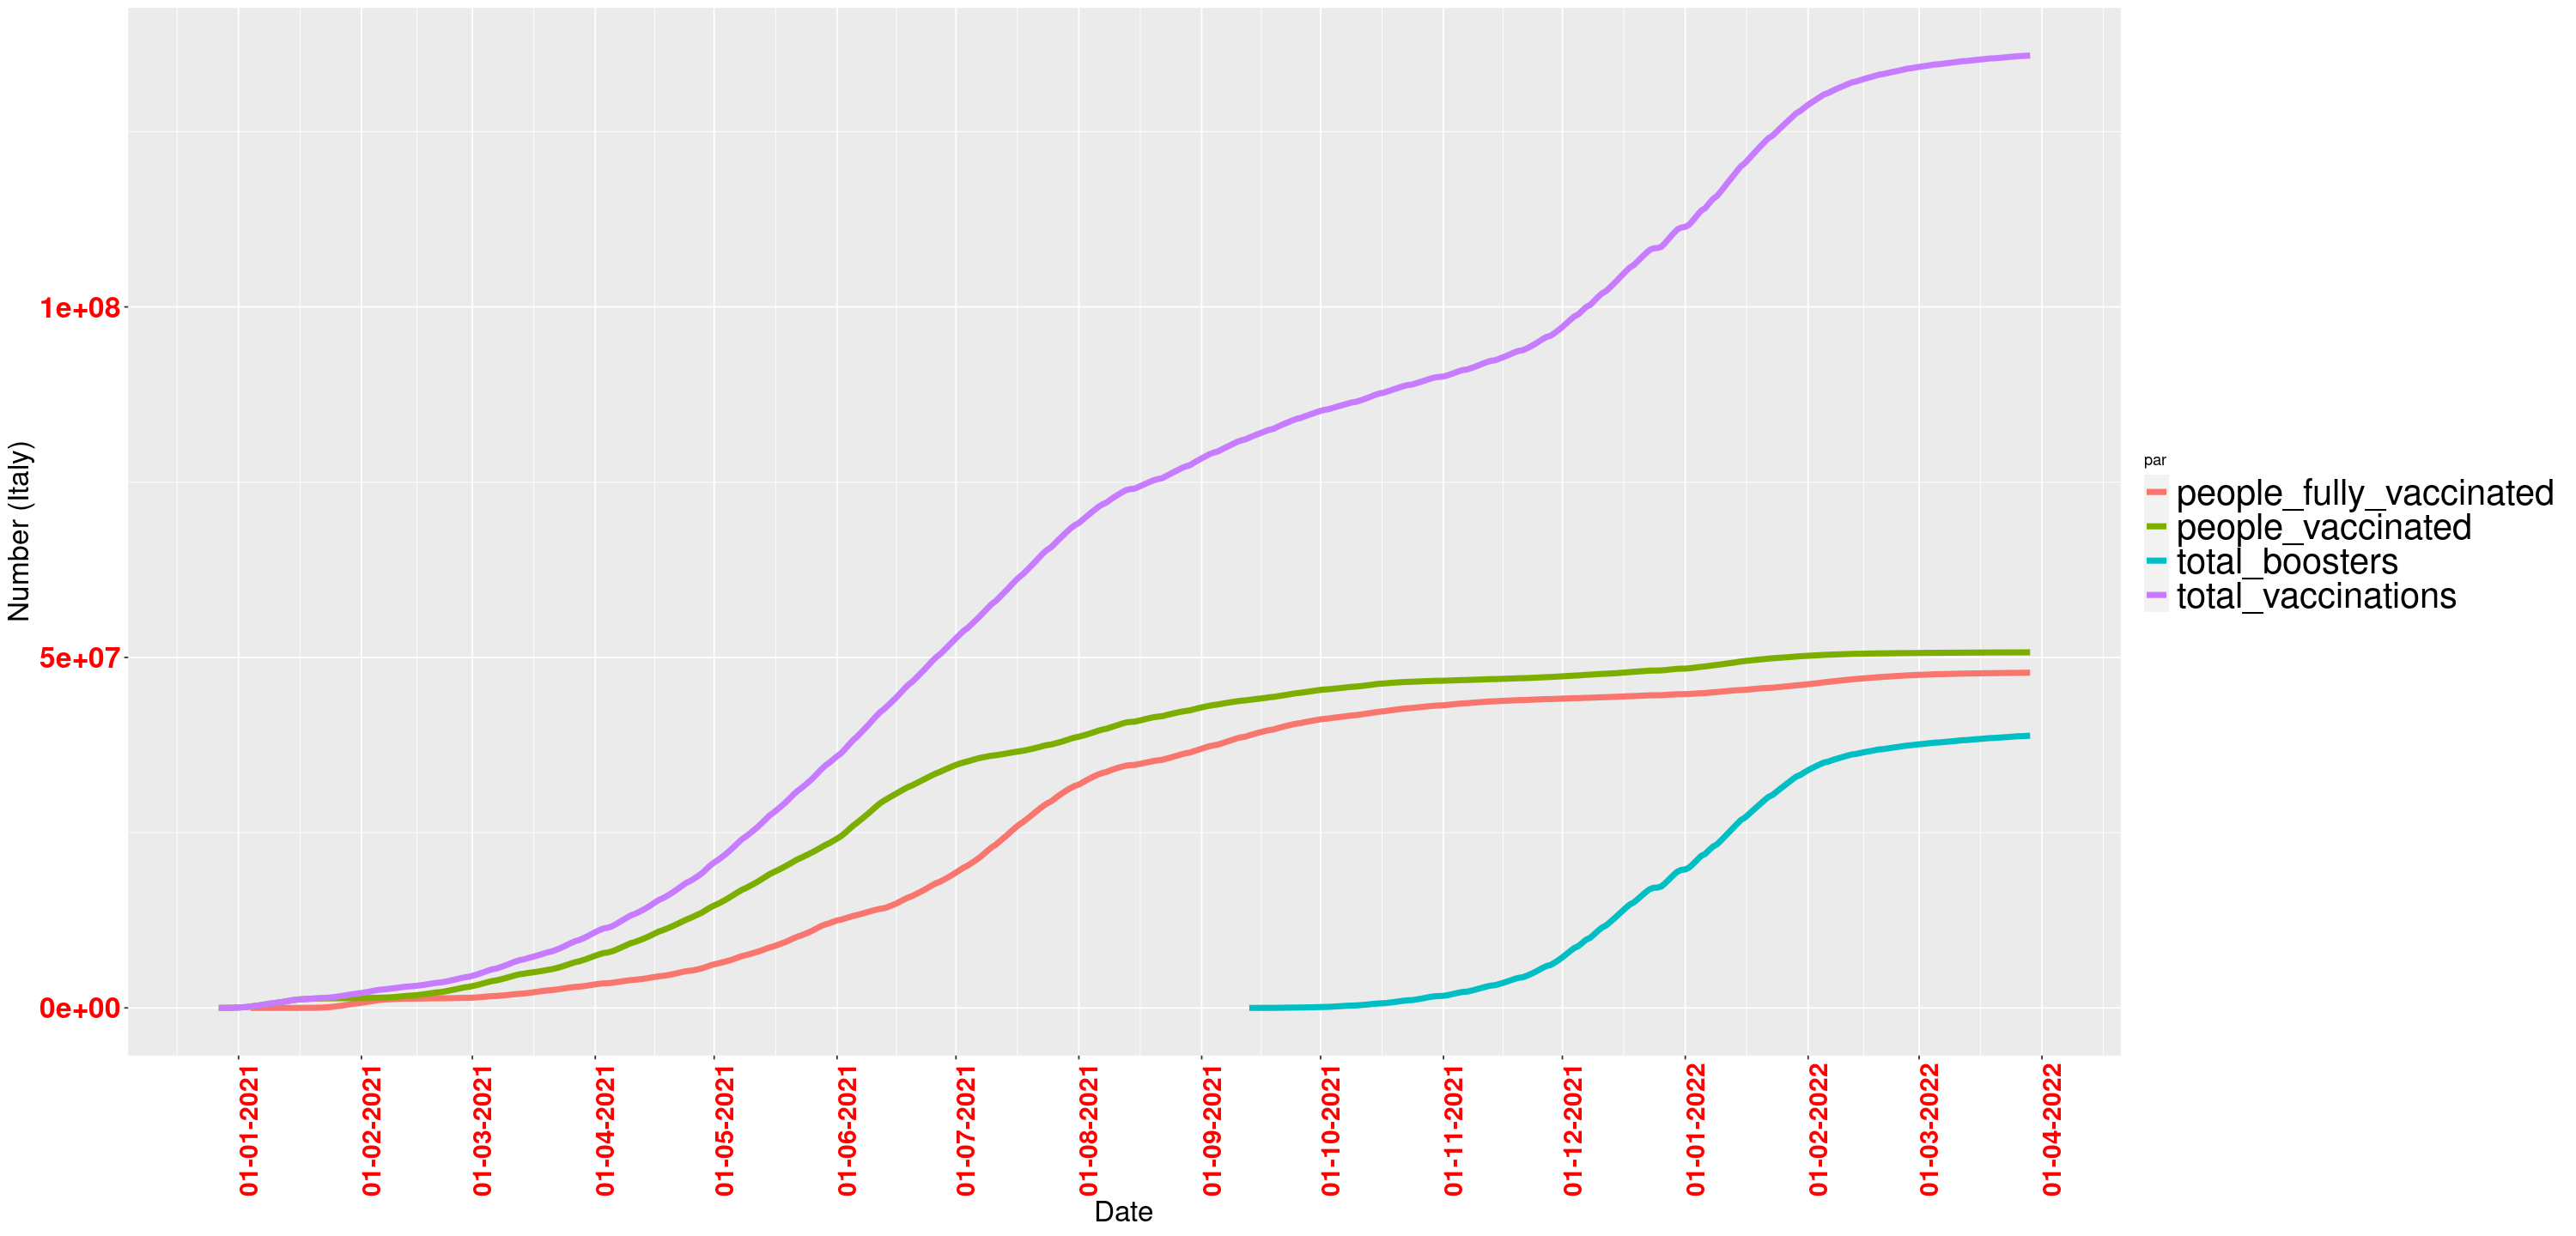

In [18]:
### using pivot_longer to can plot  total_vaccinations, people_fully_vaccinated, total_boosters, people_vaccinated
### with toghether


library(tidyr)
v_It_p<-v_It %>% select(date, total_vaccinations, people_fully_vaccinated, total_boosters, people_vaccinated) %>%
  pivot_longer(., cols = c(total_vaccinations, people_fully_vaccinated, total_boosters, people_vaccinated),
               names_to = "par", values_to = "number")

ggplot(v_It_p, aes(x = date, y = number,group = par, col=par))+geom_line(size=2)+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.text=element_text(size=25))+
labs(x = "Date", y = "Number (Italy)" )+
scale_x_date(labels=date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x

### World  - (daily vaccinations) & (total_vaccinations, people_fully_vaccinated, total_boosters, people_vaccinated)

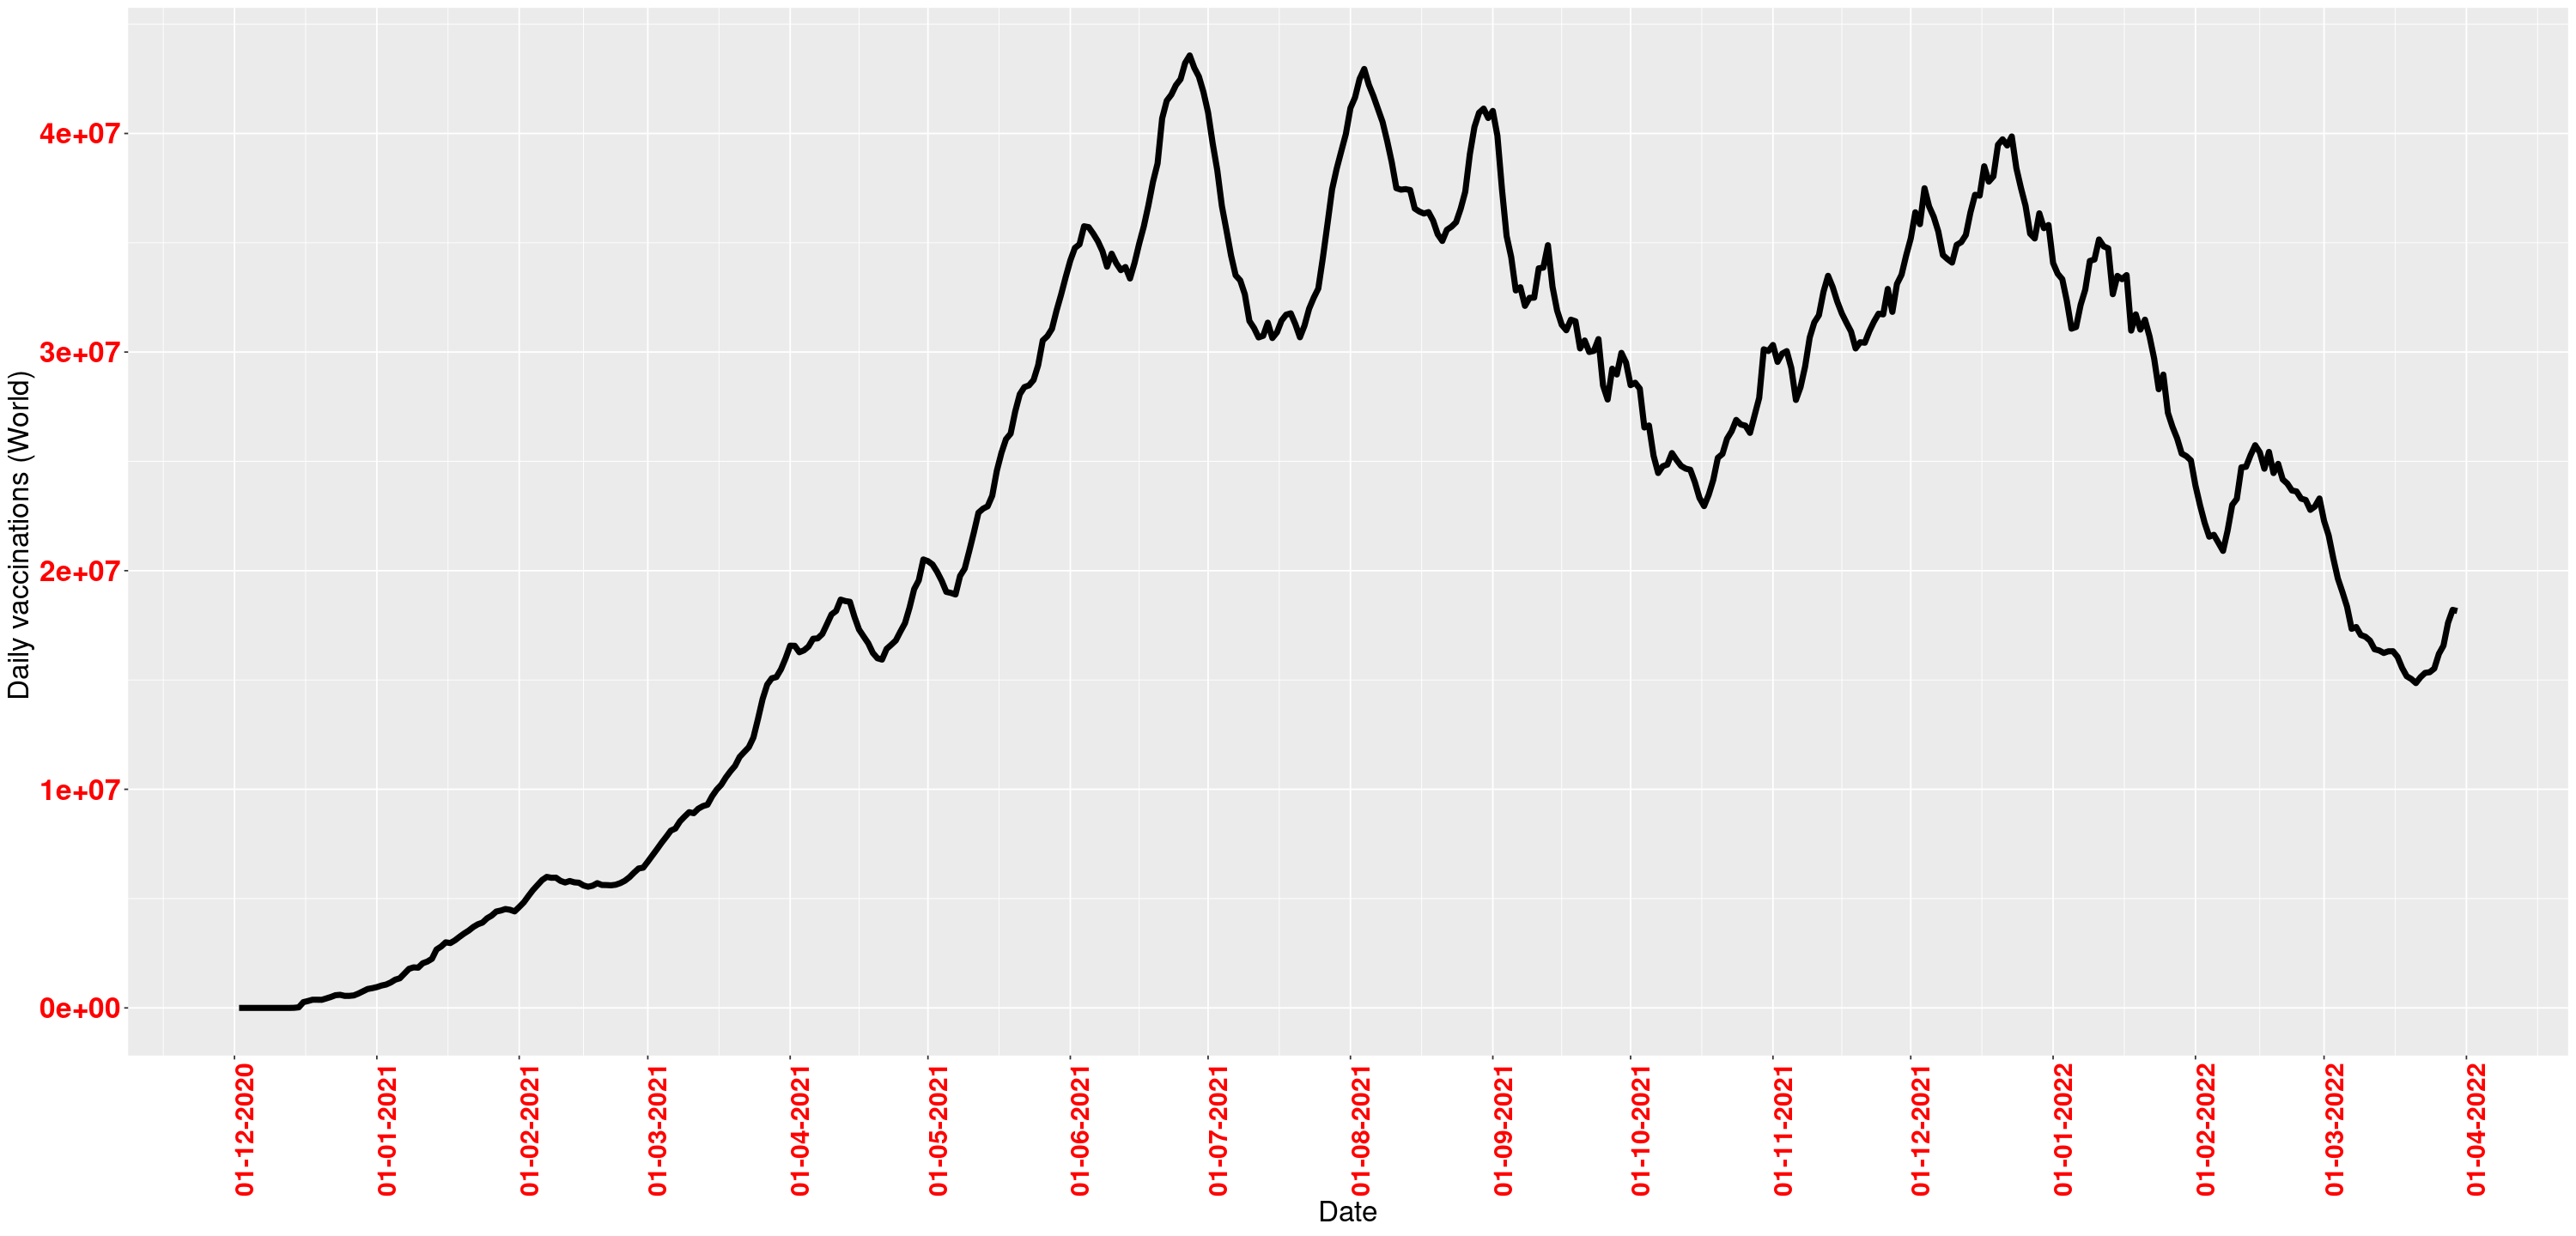

In [21]:
v_W<- vaccinations %>% filter(location %in% c('World'))

v_W$date <- as.Date(v_W$date) #convert to date to use break for better label_x

## plotting daily_vaccinations in Italy

ggplot(v_W, aes(x = date, y = daily_vaccinations,group = 1))+geom_line(size=2)+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.text=element_text(size=25))+
labs(x = "Date",y = "Daily vaccinations (World) ")+
scale_x_date(labels=date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x


Warning message:
“Removed 38 row(s) containing missing values (geom_path).”


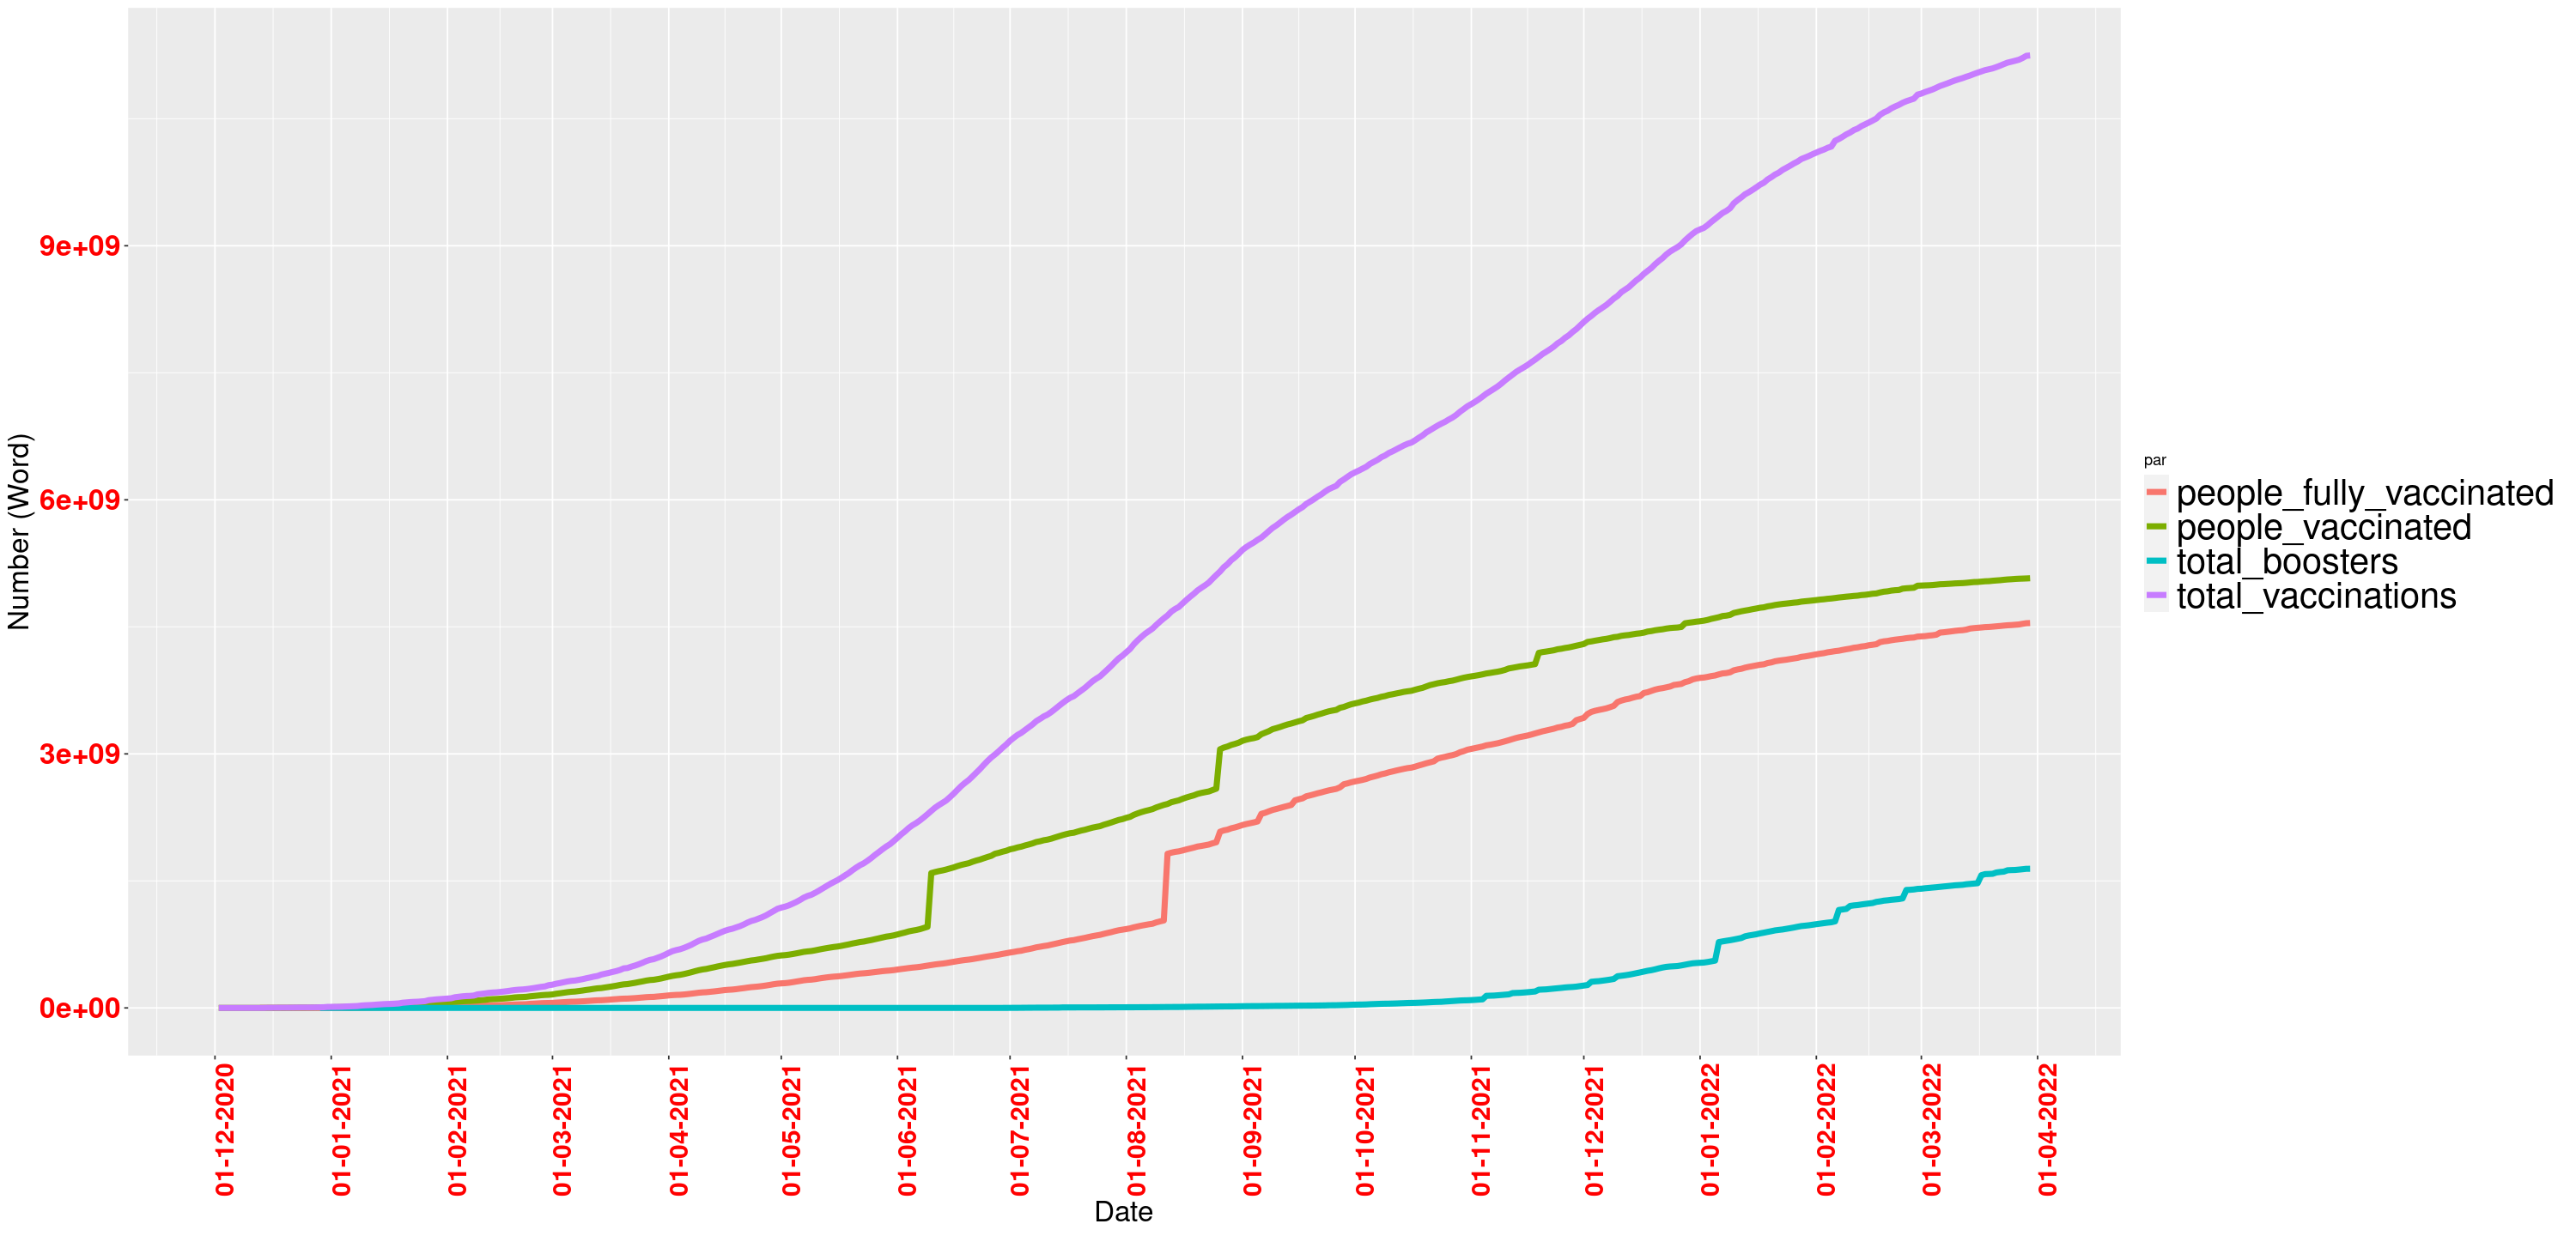

In [23]:
### using pivot_longer to can plot  total_vaccinations, people_fully_vaccinated, total_boosters, people_vaccinated
### with toghether


library(tidyr)
v_W_p<-v_W %>% select(date, total_vaccinations, people_fully_vaccinated, total_boosters, people_vaccinated) %>%
  pivot_longer(., cols = c(total_vaccinations, people_fully_vaccinated, total_boosters, people_vaccinated),
               names_to = "par", values_to = "number")

ggplot(v_W_p, aes(x = date, y = number,group = par, col=par))+geom_line(size=2)+
theme(axis.text.x=element_text( angle = 90,size=18),axis.title=element_text(size=20),
      axis.text = element_text(face="bold", color="red",size=20),
      legend.text=element_text(size=25))+
labs(x = "Date", y = "Number (Word)" )+
scale_x_date(labels=date_format('%d-%m-%Y'),breaks = date_breaks("month")) # break monthly in label_x